In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

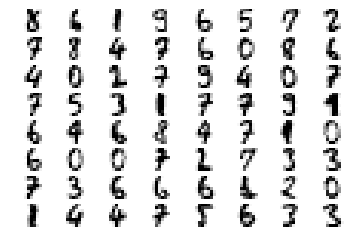

In [2]:
from random import randint

for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.imshow(digits.images[randint(0, digits.images.shape[0])], cmap='Greys')
plt.show()

In [3]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 20)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
number_codes = []
for i in range(2**(10-1), 2**10-1):
    for j in bin(i).split('b')[1]:
        number_codes.append(int(j))
number_codes = np.array(number_codes).reshape(2**9 - 1,10).T.tolist() 

In [7]:
classes = []
for i in range(2**(10-1) - 1):
    code_list = np.array(number_codes).T[i]
    classes.append(np.where(code_list==1)[0].tolist())

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/511".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/511
number of class1:162
number of class2:1455

 ****** Running generation 0 ****** 

Population's average fitness: 0.59699 stdev: 0.27357
Best fitness: 0.97526 - size: (2, 13) - species 5 - id 39
Average adjusted fitness: 0.473
Mean genetic distance 2.887, standard deviation 0.462
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 5.757 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.71897 stdev: 0.24821
Best fitness: 0.97526 - size: (2, 13) - species 1 - id 39
Average adjusted fitness: 0.610
Mean genetic distance 2.989, standard deviation 0.487
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.353 sec (5.555 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.77118 stdev: 0.21472
Best fitness: 0.98330 - size: (2, 13) - species 14 - id 542
Average adjusted fitness: 0.655
Mean genetic distance 3.059, standard deviation 0.473
Population of 205 members in 33 species
T


Population's average fitness: 0.74493 stdev: 0.14645
Best fitness: 0.92146 - size: (3, 16) - species 17 - id 669
Average adjusted fitness: 0.533
Mean genetic distance 3.138, standard deviation 0.481
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.193 sec (5.687 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.75404 stdev: 0.14532
Best fitness: 0.92579 - size: (4, 17) - species 31 - id 974
Average adjusted fitness: 0.549
Mean genetic distance 3.165, standard deviation 0.478
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.143 sec (5.763 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.74488 stdev: 0.15970
Best fitness: 0.92703 - size: (4, 16) - species 31 - id 1111
Average adjusted fitness: 0.547
Mean genetic distance 3.174, standard deviation 0.490
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.302 sec (5.840 average)

 ****** Ru

Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.556 sec (5.955 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.74078 stdev: 0.14344
Best fitness: 0.88621 - size: (6, 23) - species 4 - id 1119
Average adjusted fitness: 0.530
Mean genetic distance 3.091, standard deviation 0.522
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.681 sec (6.027 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.76968 stdev: 0.10619
Best fitness: 0.88621 - size: (6, 23) - species 4 - id 1119
Average adjusted fitness: 0.569
Mean genetic distance 3.081, standard deviation 0.519
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 6.951 sec (6.208 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.75987 stdev: 0.12839
Best fitness: 0.88621 - size: (6, 23) - species 4 - id 1119
Average adjusted fitness: 0.563
Mean genetic distance 3.10

Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.483 sec (6.367 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.68612 stdev: 0.10120
Best fitness: 0.82127 - size: (5, 17) - species 7 - id 1352
Average adjusted fitness: 0.390
Mean genetic distance 3.107, standard deviation 0.497
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.007 sec (6.450 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69774 stdev: 0.08871
Best fitness: 0.82622 - size: (6, 20) - species 7 - id 2133
Average adjusted fitness: 0.401
Mean genetic distance 3.112, standard deviation 0.498
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6.946 sec (6.554 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70231 stdev: 0.08589
Best fitness: 0.82622 - size: (6, 20) - species 7 - id 2133
Average adjusted fitness: 0.391
Mean genetic distance 3.0


 ****** Running generation 17 ****** 

Population's average fitness: 0.75528 stdev: 0.14092
Best fitness: 0.87075 - size: (4, 16) - species 30 - id 2454
Average adjusted fitness: 0.559
Mean genetic distance 3.168, standard deviation 0.516
Population of 194 members in 27 species
Total extinctions: 0
Generation time: 6.735 sec (6.677 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72733 stdev: 0.17083
Best fitness: 0.87879 - size: (7, 21) - species 17 - id 2721
Average adjusted fitness: 0.528
Mean genetic distance 3.132, standard deviation 0.520
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 6.702 sec (6.686 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.75673 stdev: 0.14529
Best fitness: 0.87879 - size: (7, 21) - species 17 - id 2721
Average adjusted fitness: 0.561
Mean genetic distance 3.171, standard deviation 0.516
Population of 196 members in 26 species
Total extinctions: 0
Generation 

Population's average fitness: 0.61464 stdev: 0.13319
Best fitness: 0.78664 - size: (2, 13) - species 2 - id 10
Average adjusted fitness: 0.362
Mean genetic distance 2.941, standard deviation 0.485
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.450 sec (5.256 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65186 stdev: 0.09631
Best fitness: 0.78664 - size: (2, 13) - species 21 - id 10
Average adjusted fitness: 0.397
Mean genetic distance 2.952, standard deviation 0.482
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 5.607 sec (5.373 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64931 stdev: 0.11982
Best fitness: 0.78664 - size: (2, 13) - species 21 - id 10
Average adjusted fitness: 0.391
Mean genetic distance 3.005, standard deviation 0.488
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.980 sec (5.525 average)

 ****** Running 


Population's average fitness: 0.60355 stdev: 0.08889
Best fitness: 0.75015 - size: (3, 13) - species 23 - id 799
Average adjusted fitness: 0.249
Mean genetic distance 3.073, standard deviation 0.469
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.084 sec (5.520 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61133 stdev: 0.08828
Best fitness: 0.76314 - size: (5, 17) - species 8 - id 1051
Average adjusted fitness: 0.247
Mean genetic distance 3.079, standard deviation 0.468
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 6.058 sec (5.597 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61288 stdev: 0.08917
Best fitness: 0.76314 - size: (5, 17) - species 8 - id 1051
Average adjusted fitness: 0.273
Mean genetic distance 3.089, standard deviation 0.472
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.254 sec (5.679 average)

 ****** Run

Population's average fitness: 0.72722 stdev: 0.17077
Best fitness: 0.91466 - size: (4, 17) - species 12 - id 604
Average adjusted fitness: 0.493
Mean genetic distance 3.144, standard deviation 0.527
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 6.389 sec (5.613 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.74932 stdev: 0.14090
Best fitness: 0.91651 - size: (7, 22) - species 16 - id 1717
Average adjusted fitness: 0.527
Mean genetic distance 3.132, standard deviation 0.537
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.212 sec (5.755 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.74277 stdev: 0.16998
Best fitness: 0.92084 - size: (8, 23) - species 16 - id 1862
Average adjusted fitness: 0.519
Mean genetic distance 3.138, standard deviation 0.529
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.082 sec (5.843 average)

 ****** 

Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.484 sec (6.234 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70213 stdev: 0.12894
Best fitness: 0.85467 - size: (4, 16) - species 5 - id 1926
Average adjusted fitness: 0.404
Mean genetic distance 3.137, standard deviation 0.502
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.585 sec (6.324 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71317 stdev: 0.11627
Best fitness: 0.85467 - size: (4, 16) - species 5 - id 1926
Average adjusted fitness: 0.439
Mean genetic distance 3.159, standard deviation 0.502
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.421 sec (6.364 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70399 stdev: 0.13191
Best fitness: 0.85467 - size: (4, 16) - species 5 - id 1926
Average adjusted fitness: 0.444
Mean genetic distance 3.1


 ****** Running generation 18 ****** 

Population's average fitness: 0.69164 stdev: 0.13307
Best fitness: 0.84477 - size: (3, 16) - species 4 - id 1319
Average adjusted fitness: 0.456
Mean genetic distance 3.202, standard deviation 0.506
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 6.418 sec (6.383 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69320 stdev: 0.12781
Best fitness: 0.84477 - size: (3, 16) - species 4 - id 1319
Average adjusted fitness: 0.412
Mean genetic distance 3.209, standard deviation 0.511
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.430 sec (6.408 average)
running:11/511
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.51933 stdev: 0.09160
Best fitness: 0.74644 - size: (2, 13) - species 5 - id 137
Average adjusted fitness: 0.228
Mean genetic distance 2.895, standard deviation 0.485
Population of 201 me

Population's average fitness: 0.63429 stdev: 0.12918
Best fitness: 0.79097 - size: (3, 15) - species 4 - id 497
Average adjusted fitness: 0.404
Mean genetic distance 3.144, standard deviation 0.507
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.482 sec (5.154 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64895 stdev: 0.12070
Best fitness: 0.79097 - size: (3, 17) - species 20 - id 668
Average adjusted fitness: 0.347
Mean genetic distance 3.152, standard deviation 0.483
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 5.792 sec (5.313 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66678 stdev: 0.09714
Best fitness: 0.79097 - size: (3, 17) - species 20 - id 668
Average adjusted fitness: 0.385
Mean genetic distance 3.118, standard deviation 0.494
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 5.693 sec (5.389 average)

 ****** Runni


Population's average fitness: 0.60812 stdev: 0.08917
Best fitness: 0.76933 - size: (3, 15) - species 21 - id 418
Average adjusted fitness: 0.260
Mean genetic distance 3.110, standard deviation 0.493
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.078 sec (5.545 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60881 stdev: 0.09541
Best fitness: 0.76933 - size: (3, 15) - species 21 - id 418
Average adjusted fitness: 0.266
Mean genetic distance 3.106, standard deviation 0.484
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.038 sec (5.606 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62890 stdev: 0.08083
Best fitness: 0.76933 - size: (3, 15) - species 21 - id 418
Average adjusted fitness: 0.243
Mean genetic distance 3.110, standard deviation 0.490
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.206 sec (5.673 average)

 ****** Run

Generation time: 6.272 sec (5.931 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60904 stdev: 0.10512
Best fitness: 0.76871 - size: (5, 19) - species 1 - id 1704
Average adjusted fitness: 0.348
Mean genetic distance 3.130, standard deviation 0.527
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.483 sec (6.101 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62303 stdev: 0.08903
Best fitness: 0.76871 - size: (5, 19) - species 14 - id 1704
Average adjusted fitness: 0.278
Mean genetic distance 3.126, standard deviation 0.542
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.354 sec (6.208 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60859 stdev: 0.10371
Best fitness: 0.76871 - size: (5, 19) - species 35 - id 1704
Average adjusted fitness: 0.279
Mean genetic distance 3.167, standard deviation 0.540
Population of 200 members in 3

Population of 204 members in 38 species
Total extinctions: 0
Generation time: 7.031 sec (6.131 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60338 stdev: 0.07668
Best fitness: 0.73902 - size: (5, 21) - species 22 - id 1940
Average adjusted fitness: 0.219
Mean genetic distance 3.168, standard deviation 0.482
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.712 sec (6.240 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60461 stdev: 0.08253
Best fitness: 0.73902 - size: (5, 21) - species 22 - id 1940
Average adjusted fitness: 0.226
Mean genetic distance 3.197, standard deviation 0.487
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 6.700 sec (6.327 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61051 stdev: 0.08098
Best fitness: 0.73902 - size: (5, 21) - species 22 - id 1940
Average adjusted fitness: 0.225
Mean genetic distance 

Generation time: 6.459 sec (6.385 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.75157 stdev: 0.17723
Best fitness: 0.90229 - size: (4, 18) - species 29 - id 984
Average adjusted fitness: 0.557
Mean genetic distance 3.190, standard deviation 0.523
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.612 sec (6.434 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.77769 stdev: 0.14623
Best fitness: 0.90229 - size: (4, 18) - species 29 - id 984
Average adjusted fitness: 0.585
Mean genetic distance 3.215, standard deviation 0.520
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 6.787 sec (6.513 average)
running:17/511
number of class1:488
number of class2:1129

 ****** Running generation 0 ****** 

Population's average fitness: 0.53288 stdev: 0.15064
Best fitness: 0.78912 - size: (2, 13) - species 1 - id 124
Average adjusted fitness: 0.329
Mean genetic distance 2.911, s


 ****** Running generation 2 ****** 

Population's average fitness: 0.64888 stdev: 0.09127
Best fitness: 0.78108 - size: (3, 15) - species 6 - id 260
Average adjusted fitness: 0.335
Mean genetic distance 2.927, standard deviation 0.450
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.398 sec (5.179 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64860 stdev: 0.10500
Best fitness: 0.78355 - size: (4, 18) - species 15 - id 667
Average adjusted fitness: 0.338
Mean genetic distance 2.976, standard deviation 0.464
Population of 209 members in 36 species
Total extinctions: 0
Generation time: 5.700 sec (5.310 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64298 stdev: 0.11172
Best fitness: 0.78355 - size: (4, 18) - species 15 - id 667
Average adjusted fitness: 0.339
Mean genetic distance 3.033, standard deviation 0.464
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 5

Population's average fitness: 0.62618 stdev: 0.09299
Best fitness: 0.80087 - size: (5, 19) - species 20 - id 912
Average adjusted fitness: 0.279
Mean genetic distance 3.072, standard deviation 0.497
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.175 sec (5.555 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63336 stdev: 0.08998
Best fitness: 0.80087 - size: (5, 19) - species 20 - id 912
Average adjusted fitness: 0.240
Mean genetic distance 3.122, standard deviation 0.497
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.086 sec (5.621 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63273 stdev: 0.09052
Best fitness: 0.80087 - size: (5, 19) - species 20 - id 912
Average adjusted fitness: 0.247
Mean genetic distance 3.169, standard deviation 0.488
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 5.908 sec (5.653 average)

 ****** Runn


 ****** Running generation 10 ****** 

Population's average fitness: 0.67423 stdev: 0.12626
Best fitness: 0.80458 - size: (3, 15) - species 8 - id 1251
Average adjusted fitness: 0.398
Mean genetic distance 3.146, standard deviation 0.481
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 6.288 sec (5.952 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.69559 stdev: 0.10184
Best fitness: 0.80829 - size: (6, 23) - species 28 - id 1750
Average adjusted fitness: 0.391
Mean genetic distance 3.172, standard deviation 0.473
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.321 sec (6.062 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.68466 stdev: 0.12320
Best fitness: 0.80829 - size: (6, 23) - species 28 - id 1750
Average adjusted fitness: 0.436
Mean genetic distance 3.177, standard deviation 0.475
Population of 201 members in 37 species
Total extinctions: 0
Generation t

Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.424 sec (6.116 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65134 stdev: 0.09673
Best fitness: 0.81076 - size: (8, 24) - species 3 - id 1595
Average adjusted fitness: 0.270
Mean genetic distance 3.198, standard deviation 0.494
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.470 sec (6.176 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64761 stdev: 0.10321
Best fitness: 0.81076 - size: (8, 24) - species 3 - id 1595
Average adjusted fitness: 0.316
Mean genetic distance 3.236, standard deviation 0.485
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 6.339 sec (6.221 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65368 stdev: 0.09889
Best fitness: 0.81076 - size: (8, 24) - species 3 - id 1595
Average adjusted fitness: 0.309
Mean genetic distance 3.2

Population of 194 members in 38 species
Total extinctions: 0
Generation time: 6.465 sec (6.314 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64500 stdev: 0.08706
Best fitness: 0.76067 - size: (8, 25) - species 34 - id 2417
Average adjusted fitness: 0.278
Mean genetic distance 3.127, standard deviation 0.489
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.509 sec (6.347 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63869 stdev: 0.09337
Best fitness: 0.76252 - size: (9, 27) - species 34 - id 2690
Average adjusted fitness: 0.289
Mean genetic distance 3.128, standard deviation 0.495
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 7.109 sec (6.426 average)
running:23/511
number of class1:805
number of class2:812

 ****** Running generation 0 ****** 

Population's average fitness: 0.50152 stdev: 0.06138
Best fitness: 0.67471 - size: (2, 13) - species 5 - id 76
A

Population's average fitness: 0.62373 stdev: 0.14748
Best fitness: 0.85529 - size: (3, 15) - species 1 - id 528
Average adjusted fitness: 0.371
Mean genetic distance 3.098, standard deviation 0.478
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 5.496 sec (5.171 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65210 stdev: 0.13955
Best fitness: 0.87260 - size: (4, 16) - species 20 - id 657
Average adjusted fitness: 0.361
Mean genetic distance 3.115, standard deviation 0.491
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 5.674 sec (5.297 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65866 stdev: 0.14815
Best fitness: 0.87260 - size: (4, 16) - species 20 - id 657
Average adjusted fitness: 0.462
Mean genetic distance 3.118, standard deviation 0.482
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 5.658 sec (5.369 average)

 ****** Runni


 ****** Running generation 6 ****** 

Population's average fitness: 0.61997 stdev: 0.10000
Best fitness: 0.78726 - size: (4, 16) - species 32 - id 674
Average adjusted fitness: 0.270
Mean genetic distance 3.134, standard deviation 0.481
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 5.944 sec (5.519 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61824 stdev: 0.10525
Best fitness: 0.78726 - size: (4, 16) - species 32 - id 674
Average adjusted fitness: 0.326
Mean genetic distance 3.122, standard deviation 0.488
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.033 sec (5.583 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62201 stdev: 0.11158
Best fitness: 0.78726 - size: (4, 16) - species 32 - id 674
Average adjusted fitness: 0.352
Mean genetic distance 3.127, standard deviation 0.487
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.63277 stdev: 0.10090
Best fitness: 0.79468 - size: (4, 18) - species 32 - id 623
Average adjusted fitness: 0.314
Mean genetic distance 3.173, standard deviation 0.519
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.010 sec (5.845 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65041 stdev: 0.09027
Best fitness: 0.79468 - size: (4, 18) - species 32 - id 623
Average adjusted fitness: 0.281
Mean genetic distance 3.166, standard deviation 0.518
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.354 sec (5.964 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63857 stdev: 0.10260
Best fitness: 0.79468 - size: (4, 18) - species 32 - id 623
Average adjusted fitness: 0.290
Mean genetic distance 3.188, standard deviation 0.515
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.200 sec (6.034 average)

 ****** Ru

Mean genetic distance 3.200, standard deviation 0.479
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.316 sec (6.252 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63089 stdev: 0.09855
Best fitness: 0.83488 - size: (6, 22) - species 1 - id 1103
Average adjusted fitness: 0.245
Mean genetic distance 3.172, standard deviation 0.475
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 6.562 sec (6.327 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63334 stdev: 0.09898
Best fitness: 0.83488 - size: (6, 22) - species 1 - id 1103
Average adjusted fitness: 0.217
Mean genetic distance 3.167, standard deviation 0.480
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.980 sec (6.421 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64065 stdev: 0.09498
Best fitness: 0.83488 - size: (6, 22) - species 1 - id 1103
Ave

Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.352 sec (6.386 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65116 stdev: 0.10488
Best fitness: 0.79221 - size: (3, 17) - species 39 - id 1861
Average adjusted fitness: 0.295
Mean genetic distance 3.137, standard deviation 0.522
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.706 sec (6.444 average)
running:29/511
number of class1:811
number of class2:806

 ****** Running generation 0 ****** 

Population's average fitness: 0.50759 stdev: 0.05966
Best fitness: 0.72047 - size: (2, 13) - species 5 - id 106
Average adjusted fitness: 0.179
Mean genetic distance 2.913, standard deviation 0.464
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 4.920 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53413 stdev: 0.07251
Best fitness: 0.72047 - size: (2, 14) - species 20 - id 352
Average adjusted f

Mean genetic distance 3.004, standard deviation 0.510
Population of 196 members in 30 species
Total extinctions: 0
Generation time: 5.579 sec (5.184 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57039 stdev: 0.07688
Best fitness: 0.76685 - size: (2, 15) - species 1 - id 653
Average adjusted fitness: 0.166
Mean genetic distance 3.052, standard deviation 0.529
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 5.412 sec (5.241 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57685 stdev: 0.08139
Best fitness: 0.76685 - size: (2, 15) - species 1 - id 653
Average adjusted fitness: 0.237
Mean genetic distance 3.071, standard deviation 0.540
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.653 sec (5.323 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58166 stdev: 0.08478
Best fitness: 0.76685 - size: (2, 15) - species 1 - id 653
Average a

Mean genetic distance 3.159, standard deviation 0.474
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 6.205 sec (5.615 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57866 stdev: 0.09158
Best fitness: 0.76562 - size: (6, 22) - species 17 - id 1204
Average adjusted fitness: 0.222
Mean genetic distance 3.171, standard deviation 0.477
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 6.337 sec (5.706 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58957 stdev: 0.09719
Best fitness: 0.76562 - size: (6, 22) - species 17 - id 1204
Average adjusted fitness: 0.230
Mean genetic distance 3.214, standard deviation 0.471
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 6.291 sec (5.771 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59426 stdev: 0.08889
Best fitness: 0.76562 - size: (6, 22) - species 17 - id 1204
Ave


 ****** Running generation 11 ****** 

Population's average fitness: 0.75586 stdev: 0.14151
Best fitness: 0.90167 - size: (2, 14) - species 4 - id 259
Average adjusted fitness: 0.553
Mean genetic distance 3.079, standard deviation 0.475
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.199 sec (5.895 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.76365 stdev: 0.12326
Best fitness: 0.90414 - size: (4, 18) - species 4 - id 1826
Average adjusted fitness: 0.562
Mean genetic distance 3.103, standard deviation 0.480
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 6.266 sec (5.959 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.74166 stdev: 0.16534
Best fitness: 0.90414 - size: (4, 18) - species 4 - id 1826
Average adjusted fitness: 0.549
Mean genetic distance 3.108, standard deviation 0.479
Population of 202 members in 38 species
Total extinctions: 0
Generation time

Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.393 sec (6.359 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69478 stdev: 0.12735
Best fitness: 0.86085 - size: (4, 18) - species 24 - id 1715
Average adjusted fitness: 0.405
Mean genetic distance 3.254, standard deviation 0.475
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.742 sec (6.440 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70509 stdev: 0.10998
Best fitness: 0.86085 - size: (4, 18) - species 24 - id 1715
Average adjusted fitness: 0.405
Mean genetic distance 3.256, standard deviation 0.465
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 6.816 sec (6.510 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69905 stdev: 0.12062
Best fitness: 0.86085 - size: (4, 18) - species 24 - id 1715
Average adjusted fitness: 0.398
Mean genetic distance 

Mean genetic distance 3.218, standard deviation 0.456
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 6.838 sec (6.441 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68682 stdev: 0.11588
Best fitness: 0.82622 - size: (6, 18) - species 13 - id 2476
Average adjusted fitness: 0.404
Mean genetic distance 3.244, standard deviation 0.463
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 6.666 sec (6.504 average)
running:35/511
number of class1:642
number of class2:975

 ****** Running generation 0 ****** 

Population's average fitness: 0.51670 stdev: 0.08857
Best fitness: 0.68769 - size: (2, 13) - species 4 - id 29
Average adjusted fitness: 0.253
Mean genetic distance 2.912, standard deviation 0.478
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 4.881 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56519 stdev: 0.07772
Best fitness: 0.76809 - s


 ****** Running generation 3 ****** 

Population's average fitness: 0.65495 stdev: 0.12713
Best fitness: 0.83241 - size: (4, 16) - species 25 - id 550
Average adjusted fitness: 0.376
Mean genetic distance 3.102, standard deviation 0.458
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 5.739 sec (5.336 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.66513 stdev: 0.12957
Best fitness: 0.83241 - size: (4, 16) - species 25 - id 550
Average adjusted fitness: 0.387
Mean genetic distance 3.123, standard deviation 0.468
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 5.719 sec (5.413 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67559 stdev: 0.12507
Best fitness: 0.83673 - size: (4, 15) - species 7 - id 915
Average adjusted fitness: 0.430
Mean genetic distance 3.140, standard deviation 0.462
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 5

Mean genetic distance 3.236, standard deviation 0.501
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 6.484 sec (5.740 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64526 stdev: 0.10062
Best fitness: 0.85405 - size: (5, 17) - species 5 - id 806
Average adjusted fitness: 0.254
Mean genetic distance 3.229, standard deviation 0.515
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 6.506 sec (5.825 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65402 stdev: 0.09888
Best fitness: 0.85405 - size: (5, 17) - species 5 - id 806
Average adjusted fitness: 0.331
Mean genetic distance 3.234, standard deviation 0.511
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 6.567 sec (5.899 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64318 stdev: 0.10422
Best fitness: 0.85405 - size: (5, 17) - species 5 - id 806
Average 

Total extinctions: 0
Generation time: 6.141 sec (5.879 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64481 stdev: 0.09541
Best fitness: 0.80210 - size: (4, 18) - species 38 - id 1832
Average adjusted fitness: 0.289
Mean genetic distance 3.151, standard deviation 0.490
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.050 sec (5.941 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64305 stdev: 0.09785
Best fitness: 0.80210 - size: (4, 18) - species 38 - id 1832
Average adjusted fitness: 0.304
Mean genetic distance 3.155, standard deviation 0.482
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 6.417 sec (6.010 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64320 stdev: 0.10029
Best fitness: 0.80458 - size: (5, 19) - species 38 - id 2083
Average adjusted fitness: 0.302
Mean genetic distance 3.155, standard deviation 0.483
Populati

Generation time: 6.782 sec (6.580 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61956 stdev: 0.10061
Best fitness: 0.81447 - size: (4, 20) - species 20 - id 1675
Average adjusted fitness: 0.339
Mean genetic distance 3.170, standard deviation 0.471
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.815 sec (6.652 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62255 stdev: 0.09336
Best fitness: 0.81447 - size: (4, 20) - species 20 - id 1675
Average adjusted fitness: 0.157
Mean genetic distance 3.199, standard deviation 0.489
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.838 sec (6.717 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62965 stdev: 0.09975
Best fitness: 0.82498 - size: (10, 31) - species 4 - id 2716
Average adjusted fitness: 0.278
Mean genetic distance 3.163, standard deviation 0.493
Population of 196 members in 


 ****** Running generation 0 ****** 

Population's average fitness: 0.52723 stdev: 0.10523
Best fitness: 0.73902 - size: (2, 13) - species 3 - id 186
Average adjusted fitness: 0.283
Mean genetic distance 2.916, standard deviation 0.472
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.881 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56756 stdev: 0.10516
Best fitness: 0.80025 - size: (3, 15) - species 2 - id 289
Average adjusted fitness: 0.252
Mean genetic distance 2.978, standard deviation 0.502
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 5.179 sec (5.030 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59194 stdev: 0.10417
Best fitness: 0.80025 - size: (3, 15) - species 4 - id 289
Average adjusted fitness: 0.289
Mean genetic distance 3.025, standard deviation 0.514
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.345 sec (5.135 av

Population's average fitness: 0.63076 stdev: 0.10363
Best fitness: 0.87137 - size: (3, 15) - species 24 - id 527
Average adjusted fitness: 0.297
Mean genetic distance 3.009, standard deviation 0.515
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.838 sec (5.349 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63793 stdev: 0.10795
Best fitness: 0.87137 - size: (3, 15) - species 24 - id 527
Average adjusted fitness: 0.301
Mean genetic distance 3.066, standard deviation 0.501
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.006 sec (5.458 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62899 stdev: 0.12168
Best fitness: 0.87137 - size: (3, 15) - species 24 - id 527
Average adjusted fitness: 0.320
Mean genetic distance 3.121, standard deviation 0.540
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.088 sec (5.548 average)

 ****** Runn

Total extinctions: 0
Generation time: 6.288 sec (5.798 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61851 stdev: 0.09554
Best fitness: 0.80891 - size: (6, 20) - species 29 - id 1267
Average adjusted fitness: 0.346
Mean genetic distance 3.153, standard deviation 0.519
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.450 sec (5.863 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62231 stdev: 0.09259
Best fitness: 0.80891 - size: (6, 20) - species 33 - id 1267
Average adjusted fitness: 0.212
Mean genetic distance 3.187, standard deviation 0.516
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.532 sec (6.037 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64250 stdev: 0.08876
Best fitness: 0.80891 - size: (6, 20) - species 33 - id 1267
Average adjusted fitness: 0.309
Mean genetic distance 3.187, standard deviation 0.522
Populatio

Total extinctions: 0
Generation time: 6.370 sec (6.340 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66733 stdev: 0.10432
Best fitness: 0.85158 - size: (7, 17) - species 17 - id 1969
Average adjusted fitness: 0.277
Mean genetic distance 3.197, standard deviation 0.481
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.648 sec (6.411 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67758 stdev: 0.10600
Best fitness: 0.85838 - size: (7, 23) - species 26 - id 2094
Average adjusted fitness: 0.385
Mean genetic distance 3.200, standard deviation 0.481
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.519 sec (6.466 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66516 stdev: 0.11349
Best fitness: 0.87199 - size: (8, 26) - species 33 - id 2141
Average adjusted fitness: 0.375
Mean genetic distance 3.181, standard deviation 0.479
Populati

Population's average fitness: 0.64334 stdev: 0.10009
Best fitness: 0.86085 - size: (5, 20) - species 32 - id 1811
Average adjusted fitness: 0.320
Mean genetic distance 3.204, standard deviation 0.467
Population of 199 members in 49 species
Total extinctions: 0
Generation time: 6.743 sec (6.599 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64880 stdev: 0.09956
Best fitness: 0.86085 - size: (5, 20) - species 32 - id 1811
Average adjusted fitness: 0.324
Mean genetic distance 3.233, standard deviation 0.465
Population of 198 members in 48 species
Total extinctions: 0
Generation time: 6.782 sec (6.626 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64981 stdev: 0.10392
Best fitness: 0.86085 - size: (5, 20) - species 32 - id 1811
Average adjusted fitness: 0.330
Mean genetic distance 3.251, standard deviation 0.460
Population of 199 members in 49 species
Total extinctions: 0
Generation time: 6.820 sec (6.657 average)
running:

Population's average fitness: 0.56731 stdev: 0.08484
Best fitness: 0.72356 - size: (2, 13) - species 18 - id 380
Average adjusted fitness: 0.248
Mean genetic distance 2.980, standard deviation 0.505
Population of 203 members in 23 species
Total extinctions: 0
Generation time: 5.181 sec (4.987 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58699 stdev: 0.09480
Best fitness: 0.77242 - size: (4, 17) - species 3 - id 503
Average adjusted fitness: 0.270
Mean genetic distance 3.038, standard deviation 0.497
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 5.491 sec (5.155 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59241 stdev: 0.09594
Best fitness: 0.77242 - size: (4, 17) - species 3 - id 503
Average adjusted fitness: 0.285
Mean genetic distance 3.069, standard deviation 0.518
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.507 sec (5.243 average)

 ****** Runnin

Total extinctions: 0
Generation time: 6.230 sec (5.565 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67803 stdev: 0.11797
Best fitness: 0.82870 - size: (3, 16) - species 33 - id 824
Average adjusted fitness: 0.412
Mean genetic distance 3.157, standard deviation 0.493
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 6.299 sec (5.670 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.68055 stdev: 0.11726
Best fitness: 0.82870 - size: (3, 16) - species 33 - id 824
Average adjusted fitness: 0.393
Mean genetic distance 3.157, standard deviation 0.492
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.490 sec (5.772 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68917 stdev: 0.11685
Best fitness: 0.82870 - size: (3, 16) - species 33 - id 824
Average adjusted fitness: 0.414
Mean genetic distance 3.173, standard deviation 0.491
Population of 

Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.390 sec (5.878 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61950 stdev: 0.10376
Best fitness: 0.80272 - size: (5, 19) - species 32 - id 953
Average adjusted fitness: 0.254
Mean genetic distance 3.202, standard deviation 0.503
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.479 sec (6.031 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62498 stdev: 0.09956
Best fitness: 0.80952 - size: (7, 25) - species 7 - id 1768
Average adjusted fitness: 0.240
Mean genetic distance 3.206, standard deviation 0.502
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.427 sec (6.155 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62037 stdev: 0.10678
Best fitness: 0.80952 - size: (7, 25) - species 7 - id 1768
Average adjusted fitness: 0.276
Mean genetic distance 3.2

Mean genetic distance 3.252, standard deviation 0.504
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 6.630 sec (6.228 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63329 stdev: 0.09805
Best fitness: 0.79159 - size: (5, 19) - species 19 - id 1307
Average adjusted fitness: 0.318
Mean genetic distance 3.247, standard deviation 0.495
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 6.727 sec (6.305 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63448 stdev: 0.09868
Best fitness: 0.79159 - size: (5, 19) - species 19 - id 1307
Average adjusted fitness: 0.322
Mean genetic distance 3.242, standard deviation 0.500
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 6.509 sec (6.370 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63371 stdev: 0.09409
Best fitness: 0.79159 - size: (5, 19) - species 19 - id 1307


Total extinctions: 0
Generation time: 6.743 sec (6.388 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62340 stdev: 0.08537
Best fitness: 0.78912 - size: (6, 21) - species 30 - id 2606
Average adjusted fitness: 0.219
Mean genetic distance 3.187, standard deviation 0.505
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.697 sec (6.438 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62449 stdev: 0.09349
Best fitness: 0.78912 - size: (6, 21) - species 30 - id 2606
Average adjusted fitness: 0.282
Mean genetic distance 3.191, standard deviation 0.500
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.653 sec (6.478 average)
running:52/511
number of class1:647
number of class2:970

 ****** Running generation 0 ****** 

Population's average fitness: 0.51407 stdev: 0.09870
Best fitness: 0.74830 - size: (2, 13) - species 3 - id 168
Average adjusted fitness: 0.256
Mean gen

Population's average fitness: 0.55600 stdev: 0.08249
Best fitness: 0.80148 - size: (4, 17) - species 1 - id 508
Average adjusted fitness: 0.215
Mean genetic distance 2.960, standard deviation 0.463
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 5.585 sec (5.223 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55597 stdev: 0.08402
Best fitness: 0.80148 - size: (4, 17) - species 29 - id 508
Average adjusted fitness: 0.244
Mean genetic distance 3.006, standard deviation 0.475
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 5.670 sec (5.335 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56725 stdev: 0.08580
Best fitness: 0.80148 - size: (4, 17) - species 1 - id 508
Average adjusted fitness: 0.191
Mean genetic distance 3.019, standard deviation 0.457
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.918 sec (5.451 average)

 ****** Runnin

Total extinctions: 0
Generation time: 5.914 sec (5.589 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61696 stdev: 0.10130
Best fitness: 0.81880 - size: (5, 18) - species 35 - id 1148
Average adjusted fitness: 0.230
Mean genetic distance 3.188, standard deviation 0.494
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.243 sec (5.671 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61948 stdev: 0.09811
Best fitness: 0.81880 - size: (5, 18) - species 35 - id 1148
Average adjusted fitness: 0.239
Mean genetic distance 3.175, standard deviation 0.486
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 6.418 sec (5.754 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62632 stdev: 0.10484
Best fitness: 0.82251 - size: (5, 18) - species 38 - id 1391
Average adjusted fitness: 0.213
Mean genetic distance 3.202, standard deviation 0.487
Population 

Mean genetic distance 3.157, standard deviation 0.489
Population of 199 members in 48 species
Total extinctions: 0
Generation time: 5.940 sec (5.786 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62444 stdev: 0.10095
Best fitness: 0.79221 - size: (3, 15) - species 29 - id 1247
Average adjusted fitness: 0.361
Mean genetic distance 3.181, standard deviation 0.503
Population of 200 members in 48 species
Total extinctions: 0
Generation time: 6.064 sec (5.862 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61642 stdev: 0.10338
Best fitness: 0.79221 - size: (3, 15) - species 29 - id 1247
Average adjusted fitness: 0.337
Mean genetic distance 3.179, standard deviation 0.500
Population of 196 members in 48 species
Total extinctions: 0
Generation time: 6.205 sec (5.927 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63011 stdev: 0.08970
Best fitness: 0.79221 - size: (3, 15) - species 29 - id 1247


Mean genetic distance 3.273, standard deviation 0.478
Population of 195 members in 48 species
Total extinctions: 0
Generation time: 6.126 sec (6.130 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69065 stdev: 0.11479
Best fitness: 0.87075 - size: (6, 21) - species 5 - id 1255
Average adjusted fitness: 0.292
Mean genetic distance 3.255, standard deviation 0.469
Population of 203 members in 48 species
Total extinctions: 0
Generation time: 6.158 sec (6.149 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67710 stdev: 0.12149
Best fitness: 0.87075 - size: (6, 21) - species 5 - id 1255
Average adjusted fitness: 0.336
Mean genetic distance 3.250, standard deviation 0.476
Population of 195 members in 47 species
Total extinctions: 0
Generation time: 6.522 sec (6.201 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69456 stdev: 0.11052
Best fitness: 0.87075 - size: (6, 21) - species 5 - id 1255
Ave

Mean genetic distance 3.179, standard deviation 0.486
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 6.518 sec (6.275 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66652 stdev: 0.10891
Best fitness: 0.83488 - size: (4, 16) - species 6 - id 2666
Average adjusted fitness: 0.301
Mean genetic distance 3.185, standard deviation 0.486
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.256 sec (6.294 average)
running:58/511
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.49405 stdev: 0.07462
Best fitness: 0.72542 - size: (2, 13) - species 1 - id 164
Average adjusted fitness: 0.248
Mean genetic distance 2.880, standard deviation 0.449
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 4.842 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53905 stdev: 0.07880
Best fitness: 0.80891 - s

Population's average fitness: 0.57239 stdev: 0.10850
Best fitness: 0.80458 - size: (2, 13) - species 23 - id 688
Average adjusted fitness: 0.307
Mean genetic distance 3.080, standard deviation 0.490
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 5.846 sec (5.375 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59063 stdev: 0.10641
Best fitness: 0.82498 - size: (3, 16) - species 23 - id 829
Average adjusted fitness: 0.282
Mean genetic distance 3.095, standard deviation 0.512
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 6.033 sec (5.507 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59519 stdev: 0.09994
Best fitness: 0.82498 - size: (3, 16) - species 23 - id 829
Average adjusted fitness: 0.208
Mean genetic distance 3.095, standard deviation 0.522
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.273 sec (5.634 average)

 ****** Runn


Population's average fitness: 0.61064 stdev: 0.11596
Best fitness: 0.84354 - size: (2, 15) - species 20 - id 1074
Average adjusted fitness: 0.395
Mean genetic distance 3.139, standard deviation 0.489
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 6.013 sec (5.661 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62232 stdev: 0.10655
Best fitness: 0.85343 - size: (3, 17) - species 20 - id 1353
Average adjusted fitness: 0.209
Mean genetic distance 3.155, standard deviation 0.495
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.126 sec (5.713 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64207 stdev: 0.11171
Best fitness: 0.88188 - size: (3, 16) - species 20 - id 1475
Average adjusted fitness: 0.327
Mean genetic distance 3.168, standard deviation 0.490
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.016 sec (5.743 average)

 ****** 

Total extinctions: 0
Generation time: 6.539 sec (6.028 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62739 stdev: 0.10763
Best fitness: 0.82127 - size: (5, 17) - species 33 - id 1357
Average adjusted fitness: 0.263
Mean genetic distance 3.166, standard deviation 0.512
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.341 sec (6.113 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63821 stdev: 0.09921
Best fitness: 0.82127 - size: (5, 17) - species 33 - id 1357
Average adjusted fitness: 0.295
Mean genetic distance 3.202, standard deviation 0.519
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.435 sec (6.182 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62820 stdev: 0.11334
Best fitness: 0.82127 - size: (5, 17) - species 33 - id 1357
Average adjusted fitness: 0.308
Mean genetic distance 3.195, standard deviation 0.518
Populati

Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.345 sec (6.356 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65150 stdev: 0.11244
Best fitness: 0.81323 - size: (5, 20) - species 28 - id 1260
Average adjusted fitness: 0.385
Mean genetic distance 3.249, standard deviation 0.491
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 6.575 sec (6.403 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64663 stdev: 0.11332
Best fitness: 0.81323 - size: (5, 20) - species 28 - id 1260
Average adjusted fitness: 0.418
Mean genetic distance 3.228, standard deviation 0.477
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.402 sec (6.410 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63639 stdev: 0.12089
Best fitness: 0.81323 - size: (5, 20) - species 28 - id 1260
Average adjusted fitness: 0.325
Mean genetic distance 

Mean genetic distance 3.217, standard deviation 0.491
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.733 sec (6.499 average)
running:64/511
number of class1:327
number of class2:1290

 ****** Running generation 0 ****** 

Population's average fitness: 0.57146 stdev: 0.21391
Best fitness: 0.84045 - size: (2, 13) - species 3 - id 79
Average adjusted fitness: 0.341
Mean genetic distance 2.883, standard deviation 0.470
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 4.886 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.68052 stdev: 0.17565
Best fitness: 0.84477 - size: (3, 15) - species 3 - id 359
Average adjusted fitness: 0.448
Mean genetic distance 2.924, standard deviation 0.481
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 5.190 sec (5.038 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71419 stdev: 0.14816
Best fitness: 0.84477 - siz

Population's average fitness: 0.66567 stdev: 0.11863
Best fitness: 0.85962 - size: (2, 13) - species 18 - id 136
Average adjusted fitness: 0.395
Mean genetic distance 3.023, standard deviation 0.516
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.687 sec (5.434 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68059 stdev: 0.11127
Best fitness: 0.86024 - size: (5, 19) - species 25 - id 938
Average adjusted fitness: 0.381
Mean genetic distance 3.020, standard deviation 0.502
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.859 sec (5.505 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.67567 stdev: 0.12291
Best fitness: 0.86024 - size: (5, 19) - species 25 - id 938
Average adjusted fitness: 0.379
Mean genetic distance 3.014, standard deviation 0.510
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 5.999 sec (5.575 average)

 ****** Runn

Population's average fitness: 0.66827 stdev: 0.10635
Best fitness: 0.78788 - size: (4, 17) - species 10 - id 676
Average adjusted fitness: 0.358
Mean genetic distance 3.155, standard deviation 0.496
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 6.260 sec (5.738 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66316 stdev: 0.11288
Best fitness: 0.78788 - size: (4, 17) - species 10 - id 676
Average adjusted fitness: 0.383
Mean genetic distance 3.168, standard deviation 0.505
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 6.299 sec (5.794 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66922 stdev: 0.10663
Best fitness: 0.78788 - size: (4, 17) - species 10 - id 676
Average adjusted fitness: 0.359
Mean genetic distance 3.157, standard deviation 0.506
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 6.328 sec (5.932 average)

 ****** Run

Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.824 sec (6.436 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65675 stdev: 0.10703
Best fitness: 0.82808 - size: (5, 17) - species 21 - id 817
Average adjusted fitness: 0.300
Mean genetic distance 3.246, standard deviation 0.495
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.992 sec (6.539 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65698 stdev: 0.11322
Best fitness: 0.82808 - size: (5, 17) - species 21 - id 817
Average adjusted fitness: 0.253
Mean genetic distance 3.236, standard deviation 0.496
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6.917 sec (6.626 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66103 stdev: 0.10638
Best fitness: 0.82808 - size: (5, 17) - species 21 - id 817
Average adjusted fitness: 0.360
Mean genetic distance 3.2

Mean genetic distance 3.141, standard deviation 0.547
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 6.633 sec (6.371 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67071 stdev: 0.12768
Best fitness: 0.78355 - size: (6, 22) - species 9 - id 2318
Average adjusted fitness: 0.389
Mean genetic distance 3.140, standard deviation 0.550
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.590 sec (6.401 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67767 stdev: 0.11630
Best fitness: 0.78355 - size: (6, 22) - species 9 - id 2318
Average adjusted fitness: 0.373
Mean genetic distance 3.167, standard deviation 0.539
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 6.876 sec (6.466 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67677 stdev: 0.12130
Best fitness: 0.78355 - size: (6, 22) - species 9 - id 2318
Ave

Population's average fitness: 0.57216 stdev: 0.07497
Best fitness: 0.75943 - size: (3, 14) - species 3 - id 292
Average adjusted fitness: 0.182
Mean genetic distance 2.953, standard deviation 0.497
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 5.285 sec (5.113 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58042 stdev: 0.08392
Best fitness: 0.75943 - size: (3, 14) - species 3 - id 292
Average adjusted fitness: 0.211
Mean genetic distance 2.946, standard deviation 0.500
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.543 sec (5.257 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57848 stdev: 0.08457
Best fitness: 0.75943 - size: (3, 14) - species 3 - id 292
Average adjusted fitness: 0.190
Mean genetic distance 2.933, standard deviation 0.483
Population of 204 members in 28 species
Total extinctions: 0
Generation time: 5.621 sec (5.348 average)

 ****** Running


Population's average fitness: 0.59348 stdev: 0.10112
Best fitness: 0.78912 - size: (4, 15) - species 8 - id 837
Average adjusted fitness: 0.271
Mean genetic distance 3.084, standard deviation 0.493
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.851 sec (5.466 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60421 stdev: 0.08932
Best fitness: 0.78912 - size: (4, 15) - species 8 - id 837
Average adjusted fitness: 0.190
Mean genetic distance 3.106, standard deviation 0.483
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 5.955 sec (5.536 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60662 stdev: 0.10290
Best fitness: 0.78912 - size: (4, 15) - species 8 - id 837
Average adjusted fitness: 0.377
Mean genetic distance 3.130, standard deviation 0.485
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 5.957 sec (5.589 average)

 ****** Runnin

Generation time: 6.143 sec (5.748 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66964 stdev: 0.11000
Best fitness: 0.81571 - size: (3, 15) - species 16 - id 645
Average adjusted fitness: 0.362
Mean genetic distance 3.199, standard deviation 0.504
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.234 sec (5.796 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66244 stdev: 0.11784
Best fitness: 0.81571 - size: (3, 15) - species 16 - id 645
Average adjusted fitness: 0.356
Mean genetic distance 3.182, standard deviation 0.504
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.528 sec (5.959 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.67523 stdev: 0.10493
Best fitness: 0.81571 - size: (3, 15) - species 16 - id 645
Average adjusted fitness: 0.367
Mean genetic distance 3.181, standard deviation 0.508
Population of 202 members in 34 s

Population's average fitness: 0.65741 stdev: 0.10542
Best fitness: 0.86271 - size: (7, 21) - species 45 - id 1775
Average adjusted fitness: 0.388
Mean genetic distance 3.254, standard deviation 0.455
Population of 201 members in 47 species
Total extinctions: 0
Generation time: 6.662 sec (6.343 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64330 stdev: 0.11674
Best fitness: 0.86271 - size: (7, 21) - species 45 - id 1775
Average adjusted fitness: 0.378
Mean genetic distance 3.244, standard deviation 0.455
Population of 202 members in 47 species
Total extinctions: 0
Generation time: 6.631 sec (6.404 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65576 stdev: 0.10663
Best fitness: 0.86271 - size: (7, 21) - species 45 - id 1775
Average adjusted fitness: 0.388
Mean genetic distance 3.268, standard deviation 0.458
Population of 204 members in 47 species
Total extinctions: 0
Generation time: 6.723 sec (6.477 average)

 ******

Mean genetic distance 3.215, standard deviation 0.458
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 6.728 sec (6.247 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62513 stdev: 0.07736
Best fitness: 0.75881 - size: (5, 15) - species 14 - id 1669
Average adjusted fitness: 0.293
Mean genetic distance 3.223, standard deviation 0.458
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 6.741 sec (6.343 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62712 stdev: 0.07852
Best fitness: 0.75881 - size: (5, 15) - species 14 - id 1669
Average adjusted fitness: 0.248
Mean genetic distance 3.213, standard deviation 0.468
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 6.877 sec (6.422 average)
running:75/511
number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49715 stdev: 0.06807
Best 

Population's average fitness: 0.57611 stdev: 0.07615
Best fitness: 0.70872 - size: (3, 14) - species 4 - id 329
Average adjusted fitness: 0.178
Mean genetic distance 3.019, standard deviation 0.517
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.506 sec (5.213 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58274 stdev: 0.07968
Best fitness: 0.73779 - size: (4, 17) - species 26 - id 644
Average adjusted fitness: 0.229
Mean genetic distance 3.023, standard deviation 0.550
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.631 sec (5.318 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59759 stdev: 0.07347
Best fitness: 0.73779 - size: (4, 17) - species 26 - id 644
Average adjusted fitness: 0.240
Mean genetic distance 3.049, standard deviation 0.545
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.722 sec (5.399 average)

 ****** Runni


 ****** Running generation 6 ****** 

Population's average fitness: 0.57949 stdev: 0.07786
Best fitness: 0.76747 - size: (5, 17) - species 28 - id 1074
Average adjusted fitness: 0.168
Mean genetic distance 3.042, standard deviation 0.489
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.937 sec (5.551 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58232 stdev: 0.08094
Best fitness: 0.76747 - size: (5, 17) - species 28 - id 1074
Average adjusted fitness: 0.217
Mean genetic distance 3.061, standard deviation 0.489
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 6.065 sec (5.615 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58989 stdev: 0.08133
Best fitness: 0.76747 - size: (5, 17) - species 28 - id 1074
Average adjusted fitness: 0.279
Mean genetic distance 3.064, standard deviation 0.487
Population of 195 members in 30 species
Total extinctions: 0
Generation tim


 ****** Running generation 10 ****** 

Population's average fitness: 0.57501 stdev: 0.06074
Best fitness: 0.70996 - size: (5, 17) - species 15 - id 1639
Average adjusted fitness: 0.148
Mean genetic distance 3.107, standard deviation 0.502
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.075 sec (5.779 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57598 stdev: 0.06497
Best fitness: 0.70996 - size: (5, 17) - species 15 - id 1639
Average adjusted fitness: 0.187
Mean genetic distance 3.116, standard deviation 0.513
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 6.341 sec (5.882 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58068 stdev: 0.06586
Best fitness: 0.71800 - size: (3, 13) - species 18 - id 1874
Average adjusted fitness: 0.214
Mean genetic distance 3.132, standard deviation 0.506
Population of 197 members in 38 species
Total extinctions: 0
Generation 

Total extinctions: 0
Generation time: 6.612 sec (6.436 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62508 stdev: 0.09831
Best fitness: 0.82808 - size: (4, 18) - species 16 - id 1853
Average adjusted fitness: 0.275
Mean genetic distance 3.185, standard deviation 0.497
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.791 sec (6.521 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61976 stdev: 0.10826
Best fitness: 0.82808 - size: (4, 18) - species 16 - id 1853
Average adjusted fitness: 0.308
Mean genetic distance 3.198, standard deviation 0.490
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.848 sec (6.597 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62254 stdev: 0.11094
Best fitness: 0.82808 - size: (4, 18) - species 16 - id 1853
Average adjusted fitness: 0.269
Mean genetic distance 3.264, standard deviation 0.482
Populati

Population's average fitness: 0.68765 stdev: 0.12104
Best fitness: 0.85405 - size: (2, 13) - species 36 - id 1504
Average adjusted fitness: 0.386
Mean genetic distance 3.143, standard deviation 0.483
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.119 sec (6.603 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.69882 stdev: 0.10140
Best fitness: 0.85405 - size: (2, 13) - species 36 - id 1504
Average adjusted fitness: 0.394
Mean genetic distance 3.142, standard deviation 0.480
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.811 sec (6.647 average)
running:81/511
number of class1:653
number of class2:964

 ****** Running generation 0 ****** 

Population's average fitness: 0.51612 stdev: 0.09620
Best fitness: 0.84663 - size: (2, 13) - species 2 - id 107
Average adjusted fitness: 0.221
Mean genetic distance 2.904, standard deviation 0.480
Population of 199 members in 21 species
Total extinctions:

Population's average fitness: 0.57143 stdev: 0.09035
Best fitness: 0.73222 - size: (3, 13) - species 17 - id 487
Average adjusted fitness: 0.246
Mean genetic distance 3.050, standard deviation 0.493
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 5.573 sec (5.275 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58727 stdev: 0.07392
Best fitness: 0.73655 - size: (4, 16) - species 22 - id 638
Average adjusted fitness: 0.191
Mean genetic distance 3.143, standard deviation 0.509
Population of 208 members in 38 species
Total extinctions: 0
Generation time: 5.899 sec (5.431 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59137 stdev: 0.07579
Best fitness: 0.73655 - size: (4, 16) - species 22 - id 638
Average adjusted fitness: 0.195
Mean genetic distance 3.170, standard deviation 0.501
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 6.144 sec (5.573 average)

 ****** Runn

Total extinctions: 0
Generation time: 6.120 sec (5.540 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62700 stdev: 0.10888
Best fitness: 0.82622 - size: (2, 12) - species 23 - id 683
Average adjusted fitness: 0.229
Mean genetic distance 3.173, standard deviation 0.504
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 6.176 sec (5.619 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63096 stdev: 0.12037
Best fitness: 0.83179 - size: (3, 14) - species 23 - id 1365
Average adjusted fitness: 0.311
Mean genetic distance 3.184, standard deviation 0.497
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.090 sec (5.672 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63844 stdev: 0.11219
Best fitness: 0.83179 - size: (3, 14) - species 23 - id 1365
Average adjusted fitness: 0.325
Mean genetic distance 3.193, standard deviation 0.490
Population o

Total extinctions: 0
Generation time: 6.715 sec (6.076 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61626 stdev: 0.08965
Best fitness: 0.78726 - size: (3, 15) - species 4 - id 1091
Average adjusted fitness: 0.221
Mean genetic distance 3.139, standard deviation 0.474
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.544 sec (6.210 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62872 stdev: 0.08068
Best fitness: 0.78726 - size: (3, 15) - species 4 - id 1091
Average adjusted fitness: 0.242
Mean genetic distance 3.141, standard deviation 0.470
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.670 sec (6.317 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62848 stdev: 0.08642
Best fitness: 0.78726 - size: (3, 15) - species 4 - id 1091
Average adjusted fitness: 0.252
Mean genetic distance 3.188, standard deviation 0.478
Population 

Population's average fitness: 0.65329 stdev: 0.10246
Best fitness: 0.84230 - size: (5, 19) - species 38 - id 1616
Average adjusted fitness: 0.270
Mean genetic distance 3.198, standard deviation 0.454
Population of 194 members in 39 species
Total extinctions: 0
Generation time: 7.170 sec (6.594 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64201 stdev: 0.10538
Best fitness: 0.84230 - size: (5, 19) - species 38 - id 1616
Average adjusted fitness: 0.339
Mean genetic distance 3.216, standard deviation 0.463
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 6.802 sec (6.649 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64753 stdev: 0.10736
Best fitness: 0.84230 - size: (5, 19) - species 38 - id 1616
Average adjusted fitness: 0.268
Mean genetic distance 3.234, standard deviation 0.467
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.830 sec (6.707 average)

 ******

number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.48138 stdev: 0.10979
Best fitness: 0.72975 - size: (2, 13) - species 1 - id 16
Average adjusted fitness: 0.280
Mean genetic distance 2.897, standard deviation 0.472
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.964 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53867 stdev: 0.10789
Best fitness: 0.77798 - size: (2, 12) - species 5 - id 300
Average adjusted fitness: 0.210
Mean genetic distance 2.967, standard deviation 0.502
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.319 sec (5.141 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56286 stdev: 0.11531
Best fitness: 0.79963 - size: (2, 14) - species 6 - id 507
Average adjusted fitness: 0.275
Mean genetic distance 2.973, standard deviation 0.513
Population of 205 members in 30 species
Total extinction

Population's average fitness: 0.60004 stdev: 0.09114
Best fitness: 0.78788 - size: (4, 18) - species 3 - id 797
Average adjusted fitness: 0.259
Mean genetic distance 3.103, standard deviation 0.482
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 5.646 sec (5.416 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59705 stdev: 0.10039
Best fitness: 0.78788 - size: (4, 18) - species 3 - id 797
Average adjusted fitness: 0.272
Mean genetic distance 3.110, standard deviation 0.483
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 5.983 sec (5.510 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60911 stdev: 0.08941
Best fitness: 0.78788 - size: (4, 18) - species 3 - id 797
Average adjusted fitness: 0.248
Mean genetic distance 3.138, standard deviation 0.485
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 5.753 sec (5.545 average)

 ****** Running

Population's average fitness: 0.61397 stdev: 0.09845
Best fitness: 0.81942 - size: (4, 18) - species 3 - id 791
Average adjusted fitness: 0.325
Mean genetic distance 3.154, standard deviation 0.476
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 6.656 sec (5.853 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61992 stdev: 0.10171
Best fitness: 0.81942 - size: (4, 18) - species 3 - id 791
Average adjusted fitness: 0.282
Mean genetic distance 3.181, standard deviation 0.476
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 6.574 sec (5.925 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62141 stdev: 0.10600
Best fitness: 0.81942 - size: (4, 18) - species 3 - id 791
Average adjusted fitness: 0.278
Mean genetic distance 3.166, standard deviation 0.473
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 6.636 sec (6.098 average)

 ****** Runnin


Population's average fitness: 0.61074 stdev: 0.07654
Best fitness: 0.74830 - size: (3, 15) - species 18 - id 1149
Average adjusted fitness: 0.158
Mean genetic distance 3.208, standard deviation 0.507
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.465 sec (6.272 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61625 stdev: 0.07767
Best fitness: 0.74830 - size: (3, 15) - species 18 - id 1149
Average adjusted fitness: 0.259
Mean genetic distance 3.237, standard deviation 0.483
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.446 sec (6.335 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61192 stdev: 0.07709
Best fitness: 0.74830 - size: (3, 15) - species 18 - id 1149
Average adjusted fitness: 0.171
Mean genetic distance 3.235, standard deviation 0.506
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.743 sec (6.414 average)

 *****

Mean genetic distance 3.183, standard deviation 0.492
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 6.958 sec (6.655 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64441 stdev: 0.10720
Best fitness: 0.81694 - size: (3, 15) - species 28 - id 1968
Average adjusted fitness: 0.276
Mean genetic distance 3.190, standard deviation 0.496
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.926 sec (6.704 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65002 stdev: 0.10511
Best fitness: 0.81694 - size: (3, 15) - species 28 - id 1968
Average adjusted fitness: 0.274
Mean genetic distance 3.205, standard deviation 0.491
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.176 sec (6.784 average)
running:92/511
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.50861 stdev: 0.05918
Best 

Population's average fitness: 0.54085 stdev: 0.10112
Best fitness: 0.77922 - size: (3, 15) - species 18 - id 478
Average adjusted fitness: 0.251
Mean genetic distance 3.040, standard deviation 0.486
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.408 sec (5.209 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56664 stdev: 0.09956
Best fitness: 0.77922 - size: (3, 15) - species 18 - id 478
Average adjusted fitness: 0.231
Mean genetic distance 3.022, standard deviation 0.469
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 5.587 sec (5.303 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58601 stdev: 0.09081
Best fitness: 0.77922 - size: (3, 15) - species 18 - id 478
Average adjusted fitness: 0.210
Mean genetic distance 3.090, standard deviation 0.463
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 5.848 sec (5.412 average)

 ****** Runn


 ****** Running generation 7 ****** 

Population's average fitness: 0.59157 stdev: 0.08711
Best fitness: 0.75015 - size: (6, 21) - species 21 - id 1203
Average adjusted fitness: 0.271
Mean genetic distance 3.168, standard deviation 0.491
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.162 sec (5.724 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59283 stdev: 0.08618
Best fitness: 0.75015 - size: (6, 21) - species 21 - id 1203
Average adjusted fitness: 0.208
Mean genetic distance 3.158, standard deviation 0.481
Population of 210 members in 38 species
Total extinctions: 0
Generation time: 6.249 sec (5.783 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59519 stdev: 0.08765
Best fitness: 0.75015 - size: (6, 21) - species 21 - id 1203
Average adjusted fitness: 0.237
Mean genetic distance 3.154, standard deviation 0.489
Population of 201 members in 38 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.64817 stdev: 0.14593
Best fitness: 0.83426 - size: (5, 20) - species 2 - id 1807
Average adjusted fitness: 0.373
Mean genetic distance 3.133, standard deviation 0.482
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 6.506 sec (6.130 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64233 stdev: 0.15580
Best fitness: 0.83426 - size: (5, 20) - species 2 - id 1807
Average adjusted fitness: 0.367
Mean genetic distance 3.136, standard deviation 0.492
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.732 sec (6.250 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65644 stdev: 0.15006
Best fitness: 0.83426 - size: (5, 20) - species 2 - id 1807
Average adjusted fitness: 0.374
Mean genetic distance 3.133, standard deviation 0.496
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.625 sec (6.332 average)

 ****** Ru

Total extinctions: 0
Generation time: 6.579 sec (6.304 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67756 stdev: 0.11524
Best fitness: 0.81138 - size: (4, 16) - species 12 - id 2167
Average adjusted fitness: 0.422
Mean genetic distance 3.240, standard deviation 0.488
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.763 sec (6.371 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68445 stdev: 0.12350
Best fitness: 0.81138 - size: (4, 16) - species 12 - id 2167
Average adjusted fitness: 0.388
Mean genetic distance 3.268, standard deviation 0.488
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.775 sec (6.436 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.69069 stdev: 0.11024
Best fitness: 0.81138 - size: (4, 16) - species 35 - id 2167
Average adjusted fitness: 0.388
Mean genetic distance 3.257, standard deviation 0.483
Populati

Mean genetic distance 3.209, standard deviation 0.488
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.892 sec (6.616 average)
running:98/511
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.51446 stdev: 0.07941
Best fitness: 0.66110 - size: (2, 13) - species 1 - id 75
Average adjusted fitness: 0.201
Mean genetic distance 2.873, standard deviation 0.449
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 4.933 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55194 stdev: 0.07806
Best fitness: 0.67656 - size: (3, 14) - species 24 - id 377
Average adjusted fitness: 0.182
Mean genetic distance 2.962, standard deviation 0.469
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.180 sec (5.057 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56643 stdev: 0.07589
Best fitness: 0.69697 - siz

Population's average fitness: 0.55480 stdev: 0.07199
Best fitness: 0.71552 - size: (4, 15) - species 8 - id 470
Average adjusted fitness: 0.212
Mean genetic distance 3.108, standard deviation 0.554
Population of 206 members in 26 species
Total extinctions: 0
Generation time: 6.132 sec (5.513 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56720 stdev: 0.07095
Best fitness: 0.71552 - size: (4, 15) - species 8 - id 470
Average adjusted fitness: 0.139
Mean genetic distance 3.116, standard deviation 0.556
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.175 sec (5.624 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58365 stdev: 0.07195
Best fitness: 0.72356 - size: (5, 19) - species 16 - id 1122
Average adjusted fitness: 0.130
Mean genetic distance 3.129, standard deviation 0.534
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.093 sec (5.691 average)

 ****** Runni

Population's average fitness: 0.61037 stdev: 0.09033
Best fitness: 0.76314 - size: (3, 17) - species 7 - id 1205
Average adjusted fitness: 0.235
Mean genetic distance 3.182, standard deviation 0.481
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 6.282 sec (5.754 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61197 stdev: 0.09146
Best fitness: 0.78293 - size: (5, 17) - species 13 - id 1470
Average adjusted fitness: 0.240
Mean genetic distance 3.163, standard deviation 0.469
Population of 208 members in 40 species
Total extinctions: 0
Generation time: 6.508 sec (5.829 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61703 stdev: 0.09707
Best fitness: 0.78293 - size: (5, 17) - species 13 - id 1470
Average adjusted fitness: 0.267
Mean genetic distance 3.152, standard deviation 0.476
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 6.643 sec (5.997 average)

 ****** R

Mean genetic distance 3.170, standard deviation 0.457
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.169 sec (6.088 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61715 stdev: 0.09315
Best fitness: 0.80210 - size: (3, 14) - species 14 - id 839
Average adjusted fitness: 0.316
Mean genetic distance 3.164, standard deviation 0.468
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 6.333 sec (6.141 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62601 stdev: 0.08343
Best fitness: 0.80210 - size: (3, 14) - species 14 - id 839
Average adjusted fitness: 0.186
Mean genetic distance 3.162, standard deviation 0.470
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 6.641 sec (6.206 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61865 stdev: 0.09197
Best fitness: 0.80210 - size: (3, 14) - species 14 - id 839
Ave

Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.519 sec (6.343 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60159 stdev: 0.07268
Best fitness: 0.74644 - size: (6, 20) - species 24 - id 1702
Average adjusted fitness: 0.158
Mean genetic distance 3.118, standard deviation 0.503
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.465 sec (6.387 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60228 stdev: 0.07218
Best fitness: 0.74644 - size: (6, 20) - species 24 - id 1702
Average adjusted fitness: 0.177
Mean genetic distance 3.129, standard deviation 0.508
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 6.604 sec (6.437 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60003 stdev: 0.07538
Best fitness: 0.74644 - size: (4, 16) - species 26 - id 2677
Average adjusted fitness: 0.151
Mean genetic distance 

Population's average fitness: 0.54139 stdev: 0.10653
Best fitness: 0.74892 - size: (2, 13) - species 12 - id 325
Average adjusted fitness: 0.292
Mean genetic distance 2.990, standard deviation 0.498
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.270 sec (5.104 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58129 stdev: 0.09786
Best fitness: 0.78046 - size: (4, 17) - species 4 - id 496
Average adjusted fitness: 0.300
Mean genetic distance 3.024, standard deviation 0.499
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 5.501 sec (5.237 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59570 stdev: 0.09309
Best fitness: 0.78726 - size: (4, 16) - species 4 - id 694
Average adjusted fitness: 0.240
Mean genetic distance 3.067, standard deviation 0.490
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.683 sec (5.348 average)

 ****** Runnin

Population's average fitness: 0.60580 stdev: 0.10044
Best fitness: 0.79654 - size: (5, 15) - species 28 - id 841
Average adjusted fitness: 0.278
Mean genetic distance 3.126, standard deviation 0.483
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.006 sec (5.517 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61786 stdev: 0.09587
Best fitness: 0.82189 - size: (6, 16) - species 28 - id 1125
Average adjusted fitness: 0.273
Mean genetic distance 3.157, standard deviation 0.497
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.052 sec (5.594 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62491 stdev: 0.10317
Best fitness: 0.82189 - size: (6, 16) - species 28 - id 1125
Average adjusted fitness: 0.317
Mean genetic distance 3.168, standard deviation 0.514
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.248 sec (5.675 average)

 ****** Ru

Total extinctions: 0
Generation time: 6.348 sec (5.829 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59924 stdev: 0.08972
Best fitness: 0.79159 - size: (5, 19) - species 34 - id 1209
Average adjusted fitness: 0.202
Mean genetic distance 3.164, standard deviation 0.480
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 6.107 sec (5.944 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60773 stdev: 0.08835
Best fitness: 0.79159 - size: (5, 19) - species 34 - id 1209
Average adjusted fitness: 0.217
Mean genetic distance 3.174, standard deviation 0.474
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 6.195 sec (6.048 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61104 stdev: 0.08597
Best fitness: 0.79159 - size: (5, 19) - species 34 - id 1209
Average adjusted fitness: 0.221
Mean genetic distance 3.201, standard deviation 0.469
Populati

Total extinctions: 0
Generation time: 6.168 sec (6.201 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61665 stdev: 0.11533
Best fitness: 0.77737 - size: (2, 13) - species 19 - id 80
Average adjusted fitness: 0.339
Mean genetic distance 3.119, standard deviation 0.539
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.226 sec (6.225 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61472 stdev: 0.11735
Best fitness: 0.77737 - size: (2, 13) - species 1 - id 80
Average adjusted fitness: 0.295
Mean genetic distance 3.151, standard deviation 0.549
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.267 sec (6.242 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61909 stdev: 0.11397
Best fitness: 0.78726 - size: (4, 14) - species 35 - id 2501
Average adjusted fitness: 0.311
Mean genetic distance 3.147, standard deviation 0.538
Population of

Population of 195 members in 37 species
Total extinctions: 0
Generation time: 6.658 sec (6.423 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63341 stdev: 0.08950
Best fitness: 0.80705 - size: (5, 19) - species 3 - id 2575
Average adjusted fitness: 0.257
Mean genetic distance 3.172, standard deviation 0.479
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 6.657 sec (6.450 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62361 stdev: 0.09560
Best fitness: 0.80705 - size: (5, 19) - species 3 - id 2575
Average adjusted fitness: 0.240
Mean genetic distance 3.212, standard deviation 0.481
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.969 sec (6.515 average)
running:109/511
number of class1:973
number of class2:644

 ****** Running generation 0 ****** 

Population's average fitness: 0.47189 stdev: 0.08503
Best fitness: 0.68089 - size: (2, 13) - species 6 - id 154
A

Population's average fitness: 0.56479 stdev: 0.09005
Best fitness: 0.72109 - size: (2, 13) - species 17 - id 468
Average adjusted fitness: 0.216
Mean genetic distance 2.968, standard deviation 0.494
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 5.613 sec (5.285 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56636 stdev: 0.09033
Best fitness: 0.73036 - size: (4, 18) - species 11 - id 679
Average adjusted fitness: 0.231
Mean genetic distance 3.027, standard deviation 0.484
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.806 sec (5.415 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58333 stdev: 0.08663
Best fitness: 0.73036 - size: (4, 18) - species 11 - id 679
Average adjusted fitness: 0.223
Mean genetic distance 3.091, standard deviation 0.481
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 6.077 sec (5.548 average)

 ****** Runn

Population's average fitness: 0.62758 stdev: 0.14274
Best fitness: 0.79654 - size: (3, 13) - species 32 - id 841
Average adjusted fitness: 0.396
Mean genetic distance 3.123, standard deviation 0.469
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 5.936 sec (5.609 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63963 stdev: 0.14123
Best fitness: 0.79654 - size: (3, 13) - species 32 - id 841
Average adjusted fitness: 0.409
Mean genetic distance 3.161, standard deviation 0.473
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 6.099 sec (5.670 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64330 stdev: 0.13905
Best fitness: 0.79654 - size: (3, 13) - species 32 - id 841
Average adjusted fitness: 0.413
Mean genetic distance 3.157, standard deviation 0.476
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.199 sec (5.729 average)

 ****** Runn

Total extinctions: 0
Generation time: 6.173 sec (5.860 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62209 stdev: 0.08238
Best fitness: 0.75758 - size: (4, 18) - species 12 - id 1401
Average adjusted fitness: 0.247
Mean genetic distance 3.214, standard deviation 0.493
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6.513 sec (5.999 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62319 stdev: 0.08017
Best fitness: 0.75758 - size: (4, 18) - species 12 - id 1401
Average adjusted fitness: 0.256
Mean genetic distance 3.214, standard deviation 0.485
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.292 sec (6.077 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62785 stdev: 0.07944
Best fitness: 0.75758 - size: (4, 18) - species 12 - id 1401
Average adjusted fitness: 0.234
Mean genetic distance 3.200, standard deviation 0.481
Populati

Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.398 sec (6.298 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63848 stdev: 0.08898
Best fitness: 0.79777 - size: (6, 20) - species 32 - id 2185
Average adjusted fitness: 0.218
Mean genetic distance 3.247, standard deviation 0.475
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.486 sec (6.347 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63860 stdev: 0.08996
Best fitness: 0.79777 - size: (6, 20) - species 32 - id 2185
Average adjusted fitness: 0.192
Mean genetic distance 3.282, standard deviation 0.487
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.721 sec (6.404 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64359 stdev: 0.09184
Best fitness: 0.79777 - size: (6, 20) - species 32 - id 2185
Average adjusted fitness: 0.297
Mean genetic distance 

Mean genetic distance 3.285, standard deviation 0.479
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.790 sec (6.501 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59718 stdev: 0.07403
Best fitness: 0.73408 - size: (6, 19) - species 38 - id 2196
Average adjusted fitness: 0.163
Mean genetic distance 3.275, standard deviation 0.480
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 6.905 sec (6.582 average)
running:115/511
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.47914 stdev: 0.09502
Best fitness: 0.66914 - size: (2, 13) - species 1 - id 46
Average adjusted fitness: 0.206
Mean genetic distance 2.973, standard deviation 0.507
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 4.853 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53983 stdev: 0.09973
Best fitness: 0.73779 - 

Population's average fitness: 0.54799 stdev: 0.07592
Best fitness: 0.76623 - size: (3, 16) - species 5 - id 538
Average adjusted fitness: 0.210
Mean genetic distance 3.103, standard deviation 0.495
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 5.776 sec (5.377 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56062 stdev: 0.07153
Best fitness: 0.76623 - size: (3, 16) - species 5 - id 538
Average adjusted fitness: 0.157
Mean genetic distance 3.118, standard deviation 0.478
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 5.861 sec (5.474 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56391 stdev: 0.07486
Best fitness: 0.76623 - size: (3, 16) - species 5 - id 538
Average adjusted fitness: 0.169
Mean genetic distance 3.119, standard deviation 0.481
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 5.847 sec (5.536 average)

 ****** Running

Total extinctions: 0
Generation time: 6.157 sec (5.747 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61269 stdev: 0.10332
Best fitness: 0.77922 - size: (3, 12) - species 23 - id 801
Average adjusted fitness: 0.250
Mean genetic distance 3.126, standard deviation 0.501
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.168 sec (5.793 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61766 stdev: 0.10015
Best fitness: 0.77922 - size: (3, 12) - species 23 - id 801
Average adjusted fitness: 0.234
Mean genetic distance 3.148, standard deviation 0.494
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.177 sec (5.832 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60798 stdev: 0.10499
Best fitness: 0.77922 - size: (3, 12) - species 23 - id 801
Average adjusted fitness: 0.249
Mean genetic distance 3.134, standard deviation 0.484
Population of

Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.403 sec (6.022 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61920 stdev: 0.11097
Best fitness: 0.80087 - size: (5, 18) - species 17 - id 1224
Average adjusted fitness: 0.245
Mean genetic distance 3.138, standard deviation 0.459
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.545 sec (6.126 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63743 stdev: 0.10396
Best fitness: 0.80087 - size: (5, 18) - species 17 - id 1224
Average adjusted fitness: 0.254
Mean genetic distance 3.148, standard deviation 0.456
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.528 sec (6.205 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63618 stdev: 0.10150
Best fitness: 0.80087 - size: (5, 18) - species 17 - id 1224
Average adjusted fitness: 0.262
Mean genetic distance 

Mean genetic distance 3.203, standard deviation 0.467
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.911 sec (6.441 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66333 stdev: 0.14628
Best fitness: 0.86580 - size: (5, 19) - species 9 - id 1296
Average adjusted fitness: 0.355
Mean genetic distance 3.190, standard deviation 0.472
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.801 sec (6.507 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68382 stdev: 0.13321
Best fitness: 0.86580 - size: (5, 19) - species 9 - id 1296
Average adjusted fitness: 0.374
Mean genetic distance 3.207, standard deviation 0.475
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.877 sec (6.591 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66728 stdev: 0.15268
Best fitness: 0.86580 - size: (5, 19) - species 9 - id 1296
Ave

number of class1:977
number of class2:640

 ****** Running generation 0 ****** 

Population's average fitness: 0.47744 stdev: 0.09888
Best fitness: 0.67656 - size: (2, 13) - species 5 - id 24
Average adjusted fitness: 0.224
Mean genetic distance 2.934, standard deviation 0.478
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 4.960 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53319 stdev: 0.09533
Best fitness: 0.75943 - size: (3, 15) - species 14 - id 285
Average adjusted fitness: 0.216
Mean genetic distance 3.042, standard deviation 0.467
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 5.210 sec (5.085 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56140 stdev: 0.09785
Best fitness: 0.77365 - size: (4, 16) - species 21 - id 409
Average adjusted fitness: 0.246
Mean genetic distance 3.029, standard deviation 0.458
Population of 201 members in 39 species
Total extincti

Generation time: 5.915 sec (5.402 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58488 stdev: 0.10105
Best fitness: 0.74397 - size: (5, 18) - species 34 - id 809
Average adjusted fitness: 0.209
Mean genetic distance 3.058, standard deviation 0.446
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 5.783 sec (5.478 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59216 stdev: 0.09772
Best fitness: 0.74397 - size: (5, 18) - species 34 - id 809
Average adjusted fitness: 0.224
Mean genetic distance 3.086, standard deviation 0.462
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 6.050 sec (5.574 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57828 stdev: 0.10188
Best fitness: 0.74397 - size: (5, 18) - species 34 - id 809
Average adjusted fitness: 0.235
Mean genetic distance 3.088, standard deviation 0.467
Population of 199 members in 41 spe

Generation time: 6.002 sec (5.636 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62124 stdev: 0.14881
Best fitness: 0.85281 - size: (5, 19) - species 13 - id 785
Average adjusted fitness: 0.372
Mean genetic distance 3.158, standard deviation 0.510
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.400 sec (5.721 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64253 stdev: 0.13915
Best fitness: 0.85281 - size: (5, 19) - species 13 - id 785
Average adjusted fitness: 0.376
Mean genetic distance 3.141, standard deviation 0.514
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 6.148 sec (5.764 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65527 stdev: 0.13719
Best fitness: 0.85281 - size: (5, 19) - species 13 - id 785
Average adjusted fitness: 0.352
Mean genetic distance 3.154, standard deviation 0.501
Population of 198 members in 41 sp

Population's average fitness: 0.60867 stdev: 0.09896
Best fitness: 0.76005 - size: (4, 19) - species 25 - id 1407
Average adjusted fitness: 0.252
Mean genetic distance 3.078, standard deviation 0.521
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.416 sec (6.153 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60282 stdev: 0.09527
Best fitness: 0.77118 - size: (5, 22) - species 17 - id 2158
Average adjusted fitness: 0.228
Mean genetic distance 3.050, standard deviation 0.530
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 6.618 sec (6.250 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60260 stdev: 0.09631
Best fitness: 0.77118 - size: (5, 22) - species 17 - id 2158
Average adjusted fitness: 0.242
Mean genetic distance 3.068, standard deviation 0.528
Population of 194 members in 28 species
Total extinctions: 0
Generation time: 6.644 sec (6.311 average)

 ******

Total extinctions: 0
Generation time: 6.586 sec (6.274 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69051 stdev: 0.12271
Best fitness: 0.83241 - size: (3, 15) - species 20 - id 1117
Average adjusted fitness: 0.389
Mean genetic distance 3.196, standard deviation 0.482
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 6.516 sec (6.324 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67291 stdev: 0.14684
Best fitness: 0.83241 - size: (3, 15) - species 20 - id 1117
Average adjusted fitness: 0.423
Mean genetic distance 3.187, standard deviation 0.494
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 6.576 sec (6.364 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68078 stdev: 0.13464
Best fitness: 0.83241 - size: (3, 15) - species 20 - id 1117
Average adjusted fitness: 0.390
Mean genetic distance 3.184, standard deviation 0.492
Populati

Population's average fitness: 0.60376 stdev: 0.21346
Best fitness: 0.84354 - size: (2, 13) - species 4 - id 200
Average adjusted fitness: 0.418
Mean genetic distance 3.018, standard deviation 0.491
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.214 sec (5.078 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64886 stdev: 0.19634
Best fitness: 0.85714 - size: (3, 15) - species 4 - id 528
Average adjusted fitness: 0.460
Mean genetic distance 3.088, standard deviation 0.503
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 5.469 sec (5.208 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.68107 stdev: 0.17945
Best fitness: 0.86642 - size: (4, 17) - species 14 - id 649
Average adjusted fitness: 0.501
Mean genetic distance 3.098, standard deviation 0.475
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 5.686 sec (5.328 average)

 ****** Runnin

Population's average fitness: 0.71907 stdev: 0.17230
Best fitness: 0.88312 - size: (4, 17) - species 3 - id 834
Average adjusted fitness: 0.524
Mean genetic distance 3.132, standard deviation 0.517
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 5.987 sec (5.629 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.73637 stdev: 0.15290
Best fitness: 0.88312 - size: (4, 17) - species 3 - id 834
Average adjusted fitness: 0.526
Mean genetic distance 3.130, standard deviation 0.527
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.267 sec (5.709 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.74749 stdev: 0.14868
Best fitness: 0.88312 - size: (4, 17) - species 3 - id 834
Average adjusted fitness: 0.591
Mean genetic distance 3.136, standard deviation 0.516
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.045 sec (5.746 average)

 ****** Running


 ****** Running generation 10 ****** 

Population's average fitness: 0.66687 stdev: 0.13098
Best fitness: 0.82931 - size: (4, 19) - species 3 - id 1120
Average adjusted fitness: 0.353
Mean genetic distance 3.148, standard deviation 0.478
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.181 sec (5.837 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68861 stdev: 0.11338
Best fitness: 0.83055 - size: (5, 20) - species 3 - id 1767
Average adjusted fitness: 0.384
Mean genetic distance 3.153, standard deviation 0.469
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.231 sec (5.942 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67376 stdev: 0.13197
Best fitness: 0.83055 - size: (5, 20) - species 3 - id 1767
Average adjusted fitness: 0.371
Mean genetic distance 3.172, standard deviation 0.457
Population of 190 members in 37 species
Total extinctions: 0
Generation tim

Population's average fitness: 0.66988 stdev: 0.12110
Best fitness: 0.81694 - size: (3, 17) - species 11 - id 1342
Average adjusted fitness: 0.378
Mean genetic distance 3.234, standard deviation 0.469
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 6.470 sec (6.298 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69014 stdev: 0.10658
Best fitness: 0.81694 - size: (3, 17) - species 11 - id 1342
Average adjusted fitness: 0.404
Mean genetic distance 3.248, standard deviation 0.475
Population of 190 members in 42 species
Total extinctions: 0
Generation time: 6.631 sec (6.379 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68665 stdev: 0.10468
Best fitness: 0.81694 - size: (3, 17) - species 11 - id 1342
Average adjusted fitness: 0.423
Mean genetic distance 3.246, standard deviation 0.485
Population of 192 members in 40 species
Total extinctions: 0
Generation time: 6.202 sec (6.409 average)

 ******

Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.840 sec (6.592 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63742 stdev: 0.08471
Best fitness: 0.77798 - size: (6, 17) - species 23 - id 1973
Average adjusted fitness: 0.279
Mean genetic distance 3.259, standard deviation 0.487
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.937 sec (6.649 average)
running:132/511
number of class1:482
number of class2:1135

 ****** Running generation 0 ****** 

Population's average fitness: 0.54199 stdev: 0.14380
Best fitness: 0.76809 - size: (2, 13) - species 5 - id 67
Average adjusted fitness: 0.258
Mean genetic distance 2.917, standard deviation 0.458
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.945 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60190 stdev: 0.13659
Best fitness: 0.77675 - size: (3, 14) - species 6 - id 378
Average adjusted f

Generation time: 5.448 sec (5.242 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59732 stdev: 0.09057
Best fitness: 0.73840 - size: (2, 13) - species 26 - id 619
Average adjusted fitness: 0.307
Mean genetic distance 3.025, standard deviation 0.482
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 5.806 sec (5.383 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60146 stdev: 0.08957
Best fitness: 0.73840 - size: (2, 13) - species 26 - id 619
Average adjusted fitness: 0.264
Mean genetic distance 3.078, standard deviation 0.491
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 6.035 sec (5.513 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61413 stdev: 0.09036
Best fitness: 0.73840 - size: (2, 13) - species 26 - id 619
Average adjusted fitness: 0.314
Mean genetic distance 3.075, standard deviation 0.486
Population of 198 members in 37 spe

Total extinctions: 0
Generation time: 6.218 sec (5.749 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60996 stdev: 0.07641
Best fitness: 0.73408 - size: (5, 18) - species 21 - id 1177
Average adjusted fitness: 0.214
Mean genetic distance 3.185, standard deviation 0.447
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.308 sec (5.819 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60947 stdev: 0.08297
Best fitness: 0.76005 - size: (4, 19) - species 4 - id 1320
Average adjusted fitness: 0.275
Mean genetic distance 3.201, standard deviation 0.459
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.218 sec (5.863 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61829 stdev: 0.07137
Best fitness: 0.76005 - size: (4, 19) - species 4 - id 1320
Average adjusted fitness: 0.256
Mean genetic distance 3.209, standard deviation 0.460
Population of

Mean genetic distance 3.140, standard deviation 0.476
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.318 sec (5.863 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59612 stdev: 0.08098
Best fitness: 0.77056 - size: (4, 17) - species 9 - id 1485
Average adjusted fitness: 0.292
Mean genetic distance 3.138, standard deviation 0.470
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 6.305 sec (5.968 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59915 stdev: 0.08213
Best fitness: 0.77056 - size: (4, 17) - species 9 - id 1485
Average adjusted fitness: 0.162
Mean genetic distance 3.146, standard deviation 0.466
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.594 sec (6.068 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60162 stdev: 0.08275
Best fitness: 0.77922 - size: (6, 18) - species 14 - id 1970
Av

Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.744 sec (6.567 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70718 stdev: 0.11654
Best fitness: 0.85281 - size: (4, 17) - species 31 - id 2311
Average adjusted fitness: 0.405
Mean genetic distance 3.230, standard deviation 0.483
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.914 sec (6.643 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71232 stdev: 0.12438
Best fitness: 0.85281 - size: (4, 17) - species 31 - id 2311
Average adjusted fitness: 0.411
Mean genetic distance 3.217, standard deviation 0.482
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.872 sec (6.696 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70976 stdev: 0.12237
Best fitness: 0.85281 - size: (4, 17) - species 31 - id 2311
Average adjusted fitness: 0.415
Mean genetic distance 


 ****** Running generation 19 ****** 

Population's average fitness: 0.64875 stdev: 0.10145
Best fitness: 0.82437 - size: (6, 21) - species 18 - id 2580
Average adjusted fitness: 0.248
Mean genetic distance 3.167, standard deviation 0.510
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 6.695 sec (6.613 average)
running:138/511
number of class1:642
number of class2:975

 ****** Running generation 0 ****** 

Population's average fitness: 0.51246 stdev: 0.09453
Best fitness: 0.72665 - size: (2, 13) - species 2 - id 156
Average adjusted fitness: 0.272
Mean genetic distance 2.878, standard deviation 0.482
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.943 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57057 stdev: 0.07305
Best fitness: 0.72665 - size: (2, 13) - species 2 - id 156
Average adjusted fitness: 0.234
Mean genetic distance 3.013, standard deviation 0.466
Population of 200 members in 31 spec

Population's average fitness: 0.56318 stdev: 0.06848
Best fitness: 0.76562 - size: (3, 15) - species 1 - id 372
Average adjusted fitness: 0.210
Mean genetic distance 3.029, standard deviation 0.500
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 5.596 sec (5.321 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56201 stdev: 0.07321
Best fitness: 0.76562 - size: (3, 15) - species 1 - id 372
Average adjusted fitness: 0.199
Mean genetic distance 3.042, standard deviation 0.496
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 5.831 sec (5.423 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57417 stdev: 0.07558
Best fitness: 0.76562 - size: (3, 15) - species 1 - id 372
Average adjusted fitness: 0.239
Mean genetic distance 3.054, standard deviation 0.491
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 5.863 sec (5.496 average)

 ****** Running

Generation time: 6.422 sec (5.720 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62056 stdev: 0.09127
Best fitness: 0.80334 - size: (6, 22) - species 26 - id 852
Average adjusted fitness: 0.229
Mean genetic distance 3.203, standard deviation 0.491
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.328 sec (5.787 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62681 stdev: 0.09389
Best fitness: 0.80334 - size: (6, 22) - species 26 - id 852
Average adjusted fitness: 0.267
Mean genetic distance 3.200, standard deviation 0.499
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 6.453 sec (5.854 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63153 stdev: 0.09529
Best fitness: 0.81200 - size: (5, 19) - species 2 - id 1666
Average adjusted fitness: 0.340
Mean genetic distance 3.197, standard deviation 0.487
Population of 198 members in 35 sp

Population's average fitness: 0.57963 stdev: 0.06401
Best fitness: 0.70315 - size: (2, 14) - species 2 - id 786
Average adjusted fitness: 0.185
Mean genetic distance 3.164, standard deviation 0.467
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.624 sec (6.163 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58454 stdev: 0.06144
Best fitness: 0.70315 - size: (2, 14) - species 2 - id 786
Average adjusted fitness: 0.193
Mean genetic distance 3.159, standard deviation 0.469
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 6.652 sec (6.263 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.57943 stdev: 0.06662
Best fitness: 0.70315 - size: (2, 14) - species 2 - id 786
Average adjusted fitness: 0.168
Mean genetic distance 3.178, standard deviation 0.477
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.765 sec (6.354 average)

 ****** Runni

Mean genetic distance 3.227, standard deviation 0.454
Population of 192 members in 42 species
Total extinctions: 0
Generation time: 6.443 sec (6.427 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61045 stdev: 0.08170
Best fitness: 0.77551 - size: (5, 19) - species 24 - id 1308
Average adjusted fitness: 0.187
Mean genetic distance 3.252, standard deviation 0.448
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 6.595 sec (6.470 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60597 stdev: 0.08269
Best fitness: 0.77551 - size: (5, 19) - species 24 - id 1308
Average adjusted fitness: 0.219
Mean genetic distance 3.255, standard deviation 0.459
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 6.545 sec (6.489 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60667 stdev: 0.08836
Best fitness: 0.77551 - size: (5, 19) - species 24 - id 1308


Population's average fitness: 0.60640 stdev: 0.12804
Best fitness: 0.78231 - size: (2, 14) - species 13 - id 284
Average adjusted fitness: 0.356
Mean genetic distance 2.981, standard deviation 0.501
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 5.189 sec (5.060 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64480 stdev: 0.10670
Best fitness: 0.78231 - size: (2, 14) - species 13 - id 284
Average adjusted fitness: 0.342
Mean genetic distance 2.986, standard deviation 0.470
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.566 sec (5.228 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64757 stdev: 0.11239
Best fitness: 0.78541 - size: (2, 14) - species 13 - id 687
Average adjusted fitness: 0.345
Mean genetic distance 2.988, standard deviation 0.490
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 5.744 sec (5.357 average)

 ****** Runn

Population of 209 members in 40 species
Total extinctions: 0
Generation time: 6.009 sec (5.612 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60761 stdev: 0.08501
Best fitness: 0.77427 - size: (5, 19) - species 21 - id 913
Average adjusted fitness: 0.275
Mean genetic distance 3.102, standard deviation 0.478
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.323 sec (5.714 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61793 stdev: 0.07964
Best fitness: 0.77427 - size: (5, 19) - species 21 - id 913
Average adjusted fitness: 0.225
Mean genetic distance 3.090, standard deviation 0.470
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 6.342 sec (5.792 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61826 stdev: 0.08511
Best fitness: 0.77427 - size: (5, 19) - species 21 - id 913
Average adjusted fitness: 0.273
Mean genetic distance 3.093,

Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.369 sec (5.837 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62378 stdev: 0.08655
Best fitness: 0.77860 - size: (5, 18) - species 19 - id 1203
Average adjusted fitness: 0.283
Mean genetic distance 3.162, standard deviation 0.450
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 6.369 sec (5.974 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62863 stdev: 0.08738
Best fitness: 0.77860 - size: (5, 18) - species 40 - id 1203
Average adjusted fitness: 0.254
Mean genetic distance 3.167, standard deviation 0.446
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 6.422 sec (6.090 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62983 stdev: 0.08495
Best fitness: 0.77860 - size: (5, 18) - species 40 - id 1203
Average adjusted fitness: 0.265
Mean genetic distance 

Total extinctions: 0
Generation time: 6.497 sec (6.075 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60579 stdev: 0.08572
Best fitness: 0.77984 - size: (4, 19) - species 22 - id 1974
Average adjusted fitness: 0.189
Mean genetic distance 3.204, standard deviation 0.483
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.471 sec (6.134 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60872 stdev: 0.08405
Best fitness: 0.77984 - size: (4, 19) - species 22 - id 1974
Average adjusted fitness: 0.188
Mean genetic distance 3.191, standard deviation 0.488
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.622 sec (6.225 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61825 stdev: 0.08036
Best fitness: 0.77984 - size: (4, 19) - species 22 - id 1974
Average adjusted fitness: 0.227
Mean genetic distance 3.234, standard deviation 0.480
Populati

Population's average fitness: 0.63102 stdev: 0.08526
Best fitness: 0.74830 - size: (7, 22) - species 18 - id 2446
Average adjusted fitness: 0.255
Mean genetic distance 3.109, standard deviation 0.485
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.565 sec (6.414 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62053 stdev: 0.09593
Best fitness: 0.74830 - size: (7, 22) - species 18 - id 2446
Average adjusted fitness: 0.298
Mean genetic distance 3.133, standard deviation 0.490
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 6.753 sec (6.467 average)
running:149/511
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49095 stdev: 0.05807
Best fitness: 0.68769 - size: (2, 13) - species 1 - id 184
Average adjusted fitness: 0.185
Mean genetic distance 2.926, standard deviation 0.473
Population of 199 members in 22 species
Total extinctions

Population's average fitness: 0.54310 stdev: 0.05883
Best fitness: 0.70130 - size: (2, 14) - species 1 - id 529
Average adjusted fitness: 0.183
Mean genetic distance 3.003, standard deviation 0.514
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.503 sec (5.225 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55138 stdev: 0.06112
Best fitness: 0.70130 - size: (2, 14) - species 1 - id 529
Average adjusted fitness: 0.185
Mean genetic distance 3.017, standard deviation 0.505
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.660 sec (5.334 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55454 stdev: 0.06506
Best fitness: 0.73346 - size: (4, 17) - species 29 - id 793
Average adjusted fitness: 0.135
Mean genetic distance 2.999, standard deviation 0.514
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.946 sec (5.456 average)

 ****** Runnin

Generation time: 5.842 sec (5.621 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61378 stdev: 0.10145
Best fitness: 0.79777 - size: (5, 19) - species 32 - id 1161
Average adjusted fitness: 0.256
Mean genetic distance 3.132, standard deviation 0.482
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 5.985 sec (5.666 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61038 stdev: 0.09695
Best fitness: 0.79777 - size: (5, 19) - species 32 - id 1161
Average adjusted fitness: 0.255
Mean genetic distance 3.134, standard deviation 0.487
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 5.961 sec (5.699 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61558 stdev: 0.10130
Best fitness: 0.79777 - size: (5, 19) - species 32 - id 1161
Average adjusted fitness: 0.221
Mean genetic distance 3.139, standard deviation 0.488
Population of 204 members in 38 

Generation time: 6.137 sec (5.916 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65294 stdev: 0.09243
Best fitness: 0.80519 - size: (4, 17) - species 1 - id 1610
Average adjusted fitness: 0.283
Mean genetic distance 3.122, standard deviation 0.504
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 6.123 sec (5.994 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65535 stdev: 0.08997
Best fitness: 0.80519 - size: (4, 17) - species 19 - id 1610
Average adjusted fitness: 0.262
Mean genetic distance 3.133, standard deviation 0.495
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 6.193 sec (6.061 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64508 stdev: 0.10457
Best fitness: 0.80519 - size: (4, 17) - species 38 - id 1610
Average adjusted fitness: 0.349
Mean genetic distance 3.130, standard deviation 0.487
Population of 198 members in 4

Population of 206 members in 36 species
Total extinctions: 0
Generation time: 6.508 sec (6.178 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61812 stdev: 0.08457
Best fitness: 0.77984 - size: (2, 13) - species 29 - id 351
Average adjusted fitness: 0.244
Mean genetic distance 3.185, standard deviation 0.475
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.754 sec (6.271 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62432 stdev: 0.08896
Best fitness: 0.77984 - size: (2, 13) - species 29 - id 351
Average adjusted fitness: 0.214
Mean genetic distance 3.212, standard deviation 0.475
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 6.499 sec (6.320 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61908 stdev: 0.08697
Best fitness: 0.77984 - size: (2, 13) - species 29 - id 351
Average adjusted fitness: 0.199
Mean genetic distance 3.2

Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.600 sec (6.555 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62119 stdev: 0.08627
Best fitness: 0.80334 - size: (7, 23) - species 18 - id 2442
Average adjusted fitness: 0.208
Mean genetic distance 3.149, standard deviation 0.509
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.913 sec (6.603 average)
running:155/511
number of class1:968
number of class2:649

 ****** Running generation 0 ****** 

Population's average fitness: 0.48560 stdev: 0.09638
Best fitness: 0.69202 - size: (2, 13) - species 2 - id 106
Average adjusted fitness: 0.194
Mean genetic distance 2.902, standard deviation 0.458
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 4.936 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53209 stdev: 0.10385
Best fitness: 0.74583 - size: (2, 14) - species 6 - id 218
Average adjusted f

Population's average fitness: 0.56178 stdev: 0.07135
Best fitness: 0.70130 - size: (4, 17) - species 7 - id 687
Average adjusted fitness: 0.196
Mean genetic distance 3.075, standard deviation 0.548
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.610 sec (5.310 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57231 stdev: 0.07446
Best fitness: 0.75758 - size: (3, 13) - species 3 - id 828
Average adjusted fitness: 0.151
Mean genetic distance 3.117, standard deviation 0.542
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 5.771 sec (5.402 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57470 stdev: 0.07159
Best fitness: 0.75758 - size: (3, 13) - species 3 - id 828
Average adjusted fitness: 0.208
Mean genetic distance 3.114, standard deviation 0.523
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 5.906 sec (5.486 average)

 ****** Running

Mean genetic distance 3.162, standard deviation 0.464
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 6.306 sec (5.756 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57526 stdev: 0.09112
Best fitness: 0.71243 - size: (4, 17) - species 20 - id 982
Average adjusted fitness: 0.196
Mean genetic distance 3.156, standard deviation 0.464
Population of 206 members in 42 species
Total extinctions: 0
Generation time: 6.369 sec (5.824 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58141 stdev: 0.08745
Best fitness: 0.71243 - size: (4, 17) - species 20 - id 982
Average adjusted fitness: 0.196
Mean genetic distance 3.173, standard deviation 0.469
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 6.474 sec (5.889 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58784 stdev: 0.08465
Best fitness: 0.72542 - size: (3, 18) - species 29 - id 1584
Aver

Mean genetic distance 3.110, standard deviation 0.474
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 6.117 sec (5.918 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60043 stdev: 0.09036
Best fitness: 0.72727 - size: (4, 17) - species 37 - id 1794
Average adjusted fitness: 0.228
Mean genetic distance 3.085, standard deviation 0.478
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.580 sec (6.022 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60718 stdev: 0.08932
Best fitness: 0.72727 - size: (4, 17) - species 37 - id 1794
Average adjusted fitness: 0.224
Mean genetic distance 3.094, standard deviation 0.479
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 6.660 sec (6.120 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60610 stdev: 0.09075
Best fitness: 0.72727 - size: (4, 17) - species 37 - id 1794


Mean genetic distance 3.191, standard deviation 0.489
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 6.610 sec (6.364 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65597 stdev: 0.11969
Best fitness: 0.78912 - size: (6, 17) - species 9 - id 2173
Average adjusted fitness: 0.359
Mean genetic distance 3.170, standard deviation 0.487
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 6.688 sec (6.419 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66937 stdev: 0.11475
Best fitness: 0.79777 - size: (8, 26) - species 32 - id 2402
Average adjusted fitness: 0.362
Mean genetic distance 3.164, standard deviation 0.482
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.501 sec (6.461 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65034 stdev: 0.13568
Best fitness: 0.79777 - size: (8, 26) - species 32 - id 2402
A

Mean genetic distance 3.202, standard deviation 0.491
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 6.788 sec (6.597 average)
running:161/511
number of class1:645
number of class2:972

 ****** Running generation 0 ****** 

Population's average fitness: 0.52274 stdev: 0.09010
Best fitness: 0.73531 - size: (2, 13) - species 3 - id 79
Average adjusted fitness: 0.238
Mean genetic distance 2.872, standard deviation 0.481
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.850 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55869 stdev: 0.08974
Best fitness: 0.73531 - size: (2, 13) - species 5 - id 79
Average adjusted fitness: 0.234
Mean genetic distance 2.945, standard deviation 0.512
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.249 sec (5.049 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57873 stdev: 0.08723
Best fitness: 0.73531 - size

Total extinctions: 0
Generation time: 5.824 sec (5.437 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59273 stdev: 0.07739
Best fitness: 0.72975 - size: (3, 15) - species 32 - id 317
Average adjusted fitness: 0.207
Mean genetic distance 3.073, standard deviation 0.467
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.066 sec (5.563 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59886 stdev: 0.07494
Best fitness: 0.72975 - size: (3, 15) - species 32 - id 317
Average adjusted fitness: 0.228
Mean genetic distance 3.105, standard deviation 0.480
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 6.227 sec (5.674 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60783 stdev: 0.06996
Best fitness: 0.73098 - size: (4, 17) - species 32 - id 1046
Average adjusted fitness: 0.224
Mean genetic distance 3.114, standard deviation 0.493
Population of


Population's average fitness: 0.57674 stdev: 0.06562
Best fitness: 0.69264 - size: (2, 15) - species 4 - id 1062
Average adjusted fitness: 0.151
Mean genetic distance 3.158, standard deviation 0.492
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 6.036 sec (5.641 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57836 stdev: 0.06707
Best fitness: 0.69264 - size: (2, 15) - species 4 - id 1062
Average adjusted fitness: 0.162
Mean genetic distance 3.163, standard deviation 0.485
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 5.902 sec (5.667 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56770 stdev: 0.07324
Best fitness: 0.70810 - size: (5, 20) - species 12 - id 1578
Average adjusted fitness: 0.164
Mean genetic distance 3.201, standard deviation 0.490
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.485 sec (5.817 average)

 ****** R

Population's average fitness: 0.62678 stdev: 0.10396
Best fitness: 0.81447 - size: (5, 20) - species 12 - id 1400
Average adjusted fitness: 0.289
Mean genetic distance 3.219, standard deviation 0.474
Population of 202 members in 48 species
Total extinctions: 0
Generation time: 6.511 sec (6.209 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63515 stdev: 0.10277
Best fitness: 0.81756 - size: (5, 21) - species 34 - id 1876
Average adjusted fitness: 0.269
Mean genetic distance 3.228, standard deviation 0.478
Population of 199 members in 48 species
Total extinctions: 0
Generation time: 6.537 sec (6.268 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64461 stdev: 0.09717
Best fitness: 0.81756 - size: (5, 21) - species 34 - id 1876
Average adjusted fitness: 0.309
Mean genetic distance 3.244, standard deviation 0.476
Population of 204 members in 48 species
Total extinctions: 0
Generation time: 6.582 sec (6.336 average)

 ******

Population's average fitness: 0.61527 stdev: 0.09063
Best fitness: 0.79406 - size: (4, 16) - species 36 - id 976
Average adjusted fitness: 0.389
Mean genetic distance 3.164, standard deviation 0.468
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 6.667 sec (6.336 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61843 stdev: 0.08954
Best fitness: 0.79406 - size: (4, 16) - species 36 - id 976
Average adjusted fitness: 0.235
Mean genetic distance 3.170, standard deviation 0.470
Population of 208 members in 43 species
Total extinctions: 0
Generation time: 6.463 sec (6.375 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61110 stdev: 0.09074
Best fitness: 0.79406 - size: (4, 16) - species 36 - id 976
Average adjusted fitness: 0.321
Mean genetic distance 3.169, standard deviation 0.477
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.840 sec (6.450 average)

 ****** Ru

Population's average fitness: 0.48202 stdev: 0.08174
Best fitness: 0.66234 - size: (2, 13) - species 4 - id 96
Average adjusted fitness: 0.182
Mean genetic distance 2.955, standard deviation 0.479
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.963 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53953 stdev: 0.07856
Best fitness: 0.69264 - size: (2, 14) - species 23 - id 336
Average adjusted fitness: 0.194
Mean genetic distance 3.023, standard deviation 0.454
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.268 sec (5.115 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55661 stdev: 0.08347
Best fitness: 0.75510 - size: (3, 15) - species 1 - id 471
Average adjusted fitness: 0.246
Mean genetic distance 3.065, standard deviation 0.464
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 5.629 sec (5.287 average)

 ****** Running generation 3 **

Population of 206 members in 39 species
Total extinctions: 0
Generation time: 5.821 sec (5.461 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64207 stdev: 0.10469
Best fitness: 0.85096 - size: (3, 15) - species 32 - id 502
Average adjusted fitness: 0.280
Mean genetic distance 3.161, standard deviation 0.506
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 6.222 sec (5.588 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63408 stdev: 0.11800
Best fitness: 0.85096 - size: (3, 15) - species 32 - id 502
Average adjusted fitness: 0.408
Mean genetic distance 3.183, standard deviation 0.509
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.267 sec (5.685 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64158 stdev: 0.11229
Best fitness: 0.85096 - size: (3, 15) - species 32 - id 502
Average adjusted fitness: 0.352
Mean genetic distance 3.185,

Mean genetic distance 3.144, standard deviation 0.450
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 6.409 sec (5.781 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59602 stdev: 0.09369
Best fitness: 0.76067 - size: (4, 17) - species 7 - id 1400
Average adjusted fitness: 0.239
Mean genetic distance 3.145, standard deviation 0.457
Population of 204 members in 46 species
Total extinctions: 0
Generation time: 6.459 sec (5.849 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60061 stdev: 0.09615
Best fitness: 0.76067 - size: (4, 17) - species 7 - id 1400
Average adjusted fitness: 0.292
Mean genetic distance 3.116, standard deviation 0.447
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 6.474 sec (5.998 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60323 stdev: 0.09277
Best fitness: 0.76067 - size: (4, 17) - species 7 - id 1400
Aver

Population of 191 members in 38 species
Total extinctions: 0
Generation time: 6.436 sec (6.299 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64161 stdev: 0.10434
Best fitness: 0.83179 - size: (8, 27) - species 17 - id 1775
Average adjusted fitness: 0.327
Mean genetic distance 3.207, standard deviation 0.480
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.270 sec (6.340 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64602 stdev: 0.10467
Best fitness: 0.83179 - size: (8, 27) - species 17 - id 1775
Average adjusted fitness: 0.293
Mean genetic distance 3.189, standard deviation 0.474
Population of 191 members in 38 species
Total extinctions: 0
Generation time: 6.396 sec (6.390 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65849 stdev: 0.09637
Best fitness: 0.83179 - size: (8, 27) - species 17 - id 1775
Average adjusted fitness: 0.267
Mean genetic distance 

Mean genetic distance 3.214, standard deviation 0.479
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 6.692 sec (6.411 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64061 stdev: 0.08853
Best fitness: 0.79097 - size: (7, 24) - species 41 - id 2244
Average adjusted fitness: 0.238
Mean genetic distance 3.220, standard deviation 0.487
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 6.962 sec (6.503 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63791 stdev: 0.09178
Best fitness: 0.79097 - size: (7, 24) - species 41 - id 2244
Average adjusted fitness: 0.325
Mean genetic distance 3.219, standard deviation 0.483
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 7.043 sec (6.580 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64512 stdev: 0.09036
Best fitness: 0.79097 - size: (7, 24) - species 41 - id 2244


Population's average fitness: 0.53280 stdev: 0.08909
Best fitness: 0.70130 - size: (2, 13) - species 3 - id 161
Average adjusted fitness: 0.185
Mean genetic distance 3.018, standard deviation 0.531
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 5.282 sec (5.106 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55140 stdev: 0.08359
Best fitness: 0.70254 - size: (4, 16) - species 25 - id 519
Average adjusted fitness: 0.181
Mean genetic distance 3.040, standard deviation 0.548
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.510 sec (5.240 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56631 stdev: 0.07921
Best fitness: 0.70439 - size: (3, 16) - species 3 - id 675
Average adjusted fitness: 0.204
Mean genetic distance 3.060, standard deviation 0.529
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.676 sec (5.349 average)

 ****** Runnin

Generation time: 5.981 sec (5.469 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59344 stdev: 0.10295
Best fitness: 0.83426 - size: (4, 19) - species 5 - id 938
Average adjusted fitness: 0.232
Mean genetic distance 3.103, standard deviation 0.473
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.306 sec (5.609 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59972 stdev: 0.11093
Best fitness: 0.83426 - size: (4, 19) - species 21 - id 938
Average adjusted fitness: 0.350
Mean genetic distance 3.127, standard deviation 0.466
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.266 sec (5.703 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60356 stdev: 0.11405
Best fitness: 0.84045 - size: (4, 18) - species 4 - id 1214
Average adjusted fitness: 0.247
Mean genetic distance 3.146, standard deviation 0.464
Population of 198 members in 38 spec

Population's average fitness: 0.64010 stdev: 0.11562
Best fitness: 0.78108 - size: (4, 18) - species 24 - id 1485
Average adjusted fitness: 0.324
Mean genetic distance 3.132, standard deviation 0.495
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.348 sec (5.827 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63118 stdev: 0.12388
Best fitness: 0.78108 - size: (4, 18) - species 24 - id 1485
Average adjusted fitness: 0.330
Mean genetic distance 3.168, standard deviation 0.489
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.387 sec (5.973 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64377 stdev: 0.11594
Best fitness: 0.78108 - size: (4, 18) - species 24 - id 1485
Average adjusted fitness: 0.326
Mean genetic distance 3.152, standard deviation 0.483
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.614 sec (6.110 average)

 ******

Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.285 sec (6.218 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62674 stdev: 0.09019
Best fitness: 0.80334 - size: (5, 20) - species 21 - id 1825
Average adjusted fitness: 0.238
Mean genetic distance 3.130, standard deviation 0.478
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.613 sec (6.273 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62884 stdev: 0.09183
Best fitness: 0.80334 - size: (5, 20) - species 21 - id 1825
Average adjusted fitness: 0.259
Mean genetic distance 3.119, standard deviation 0.469
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 6.433 sec (6.319 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63395 stdev: 0.09168
Best fitness: 0.80334 - size: (5, 20) - species 21 - id 1825
Average adjusted fitness: 0.288
Mean genetic distance 

Population of 192 members in 35 species
Total extinctions: 0
Generation time: 6.698 sec (6.537 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60118 stdev: 0.07383
Best fitness: 0.75263 - size: (7, 23) - species 26 - id 1522
Average adjusted fitness: 0.179
Mean genetic distance 3.141, standard deviation 0.477
Population of 191 members in 33 species
Total extinctions: 0
Generation time: 6.487 sec (6.554 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59690 stdev: 0.07548
Best fitness: 0.75263 - size: (7, 23) - species 26 - id 1522
Average adjusted fitness: 0.193
Mean genetic distance 3.144, standard deviation 0.482
Population of 197 members in 32 species
Total extinctions: 0
Generation time: 6.398 sec (6.546 average)
running:178/511
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.49923 stdev: 0.05287
Best fitness: 0.70625 - size: (2, 13) - species 5 - id 198

Population's average fitness: 0.54757 stdev: 0.08226
Best fitness: 0.71243 - size: (3, 15) - species 7 - id 368
Average adjusted fitness: 0.192
Mean genetic distance 3.021, standard deviation 0.462
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 5.509 sec (5.360 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55384 stdev: 0.08417
Best fitness: 0.71243 - size: (3, 15) - species 7 - id 368
Average adjusted fitness: 0.184
Mean genetic distance 3.071, standard deviation 0.481
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.788 sec (5.467 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57537 stdev: 0.08009
Best fitness: 0.73036 - size: (4, 17) - species 4 - id 786
Average adjusted fitness: 0.210
Mean genetic distance 3.055, standard deviation 0.467
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 5.912 sec (5.556 average)

 ****** Running

Population of 206 members in 37 species
Total extinctions: 0
Generation time: 6.295 sec (5.687 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58162 stdev: 0.07323
Best fitness: 0.72789 - size: (6, 20) - species 35 - id 1114
Average adjusted fitness: 0.263
Mean genetic distance 3.158, standard deviation 0.476
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 6.437 sec (5.781 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58804 stdev: 0.07118
Best fitness: 0.72789 - size: (6, 20) - species 35 - id 1114
Average adjusted fitness: 0.201
Mean genetic distance 3.195, standard deviation 0.469
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.322 sec (5.841 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59222 stdev: 0.07389
Best fitness: 0.72851 - size: (6, 22) - species 34 - id 1494
Average adjusted fitness: 0.225
Mean genetic distance 3.1

Mean genetic distance 3.133, standard deviation 0.471
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.301 sec (5.913 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60384 stdev: 0.08414
Best fitness: 0.74583 - size: (6, 23) - species 22 - id 1454
Average adjusted fitness: 0.271
Mean genetic distance 3.135, standard deviation 0.485
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.405 sec (6.017 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60628 stdev: 0.07978
Best fitness: 0.74583 - size: (6, 23) - species 22 - id 1454
Average adjusted fitness: 0.235
Mean genetic distance 3.107, standard deviation 0.481
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.389 sec (6.107 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60756 stdev: 0.08359
Best fitness: 0.74583 - size: (6, 23) - species 22 - id 1454


Total extinctions: 0
Generation time: 6.753 sec (6.354 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61044 stdev: 0.08764
Best fitness: 0.77427 - size: (3, 16) - species 23 - id 1136
Average adjusted fitness: 0.247
Mean genetic distance 3.214, standard deviation 0.492
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 6.531 sec (6.392 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60963 stdev: 0.09527
Best fitness: 0.77427 - size: (3, 16) - species 23 - id 1136
Average adjusted fitness: 0.311
Mean genetic distance 3.216, standard deviation 0.490
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.544 sec (6.434 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61528 stdev: 0.09477
Best fitness: 0.77427 - size: (3, 16) - species 23 - id 1136
Average adjusted fitness: 0.278
Mean genetic distance 3.213, standard deviation 0.502
Populati


Population's average fitness: 0.64249 stdev: 0.13626
Best fitness: 0.80025 - size: (3, 17) - species 35 - id 826
Average adjusted fitness: 0.351
Mean genetic distance 3.261, standard deviation 0.541
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.684 sec (6.651 average)
running:184/511
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.49743 stdev: 0.07366
Best fitness: 0.78355 - size: (2, 13) - species 3 - id 67
Average adjusted fitness: 0.191
Mean genetic distance 2.877, standard deviation 0.492
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.967 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53325 stdev: 0.08204
Best fitness: 0.78355 - size: (2, 13) - species 2 - id 67
Average adjusted fitness: 0.251
Mean genetic distance 2.925, standard deviation 0.465
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.57382 stdev: 0.09225
Best fitness: 0.76623 - size: (3, 14) - species 27 - id 488
Average adjusted fitness: 0.241
Mean genetic distance 3.088, standard deviation 0.503
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.578 sec (5.284 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58198 stdev: 0.09711
Best fitness: 0.76623 - size: (3, 14) - species 27 - id 488
Average adjusted fitness: 0.247
Mean genetic distance 3.128, standard deviation 0.508
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 5.711 sec (5.369 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59443 stdev: 0.09910
Best fitness: 0.76623 - size: (3, 14) - species 27 - id 488
Average adjusted fitness: 0.307
Mean genetic distance 3.120, standard deviation 0.490
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 5.953 sec (5.467 average)

 ****** Runn

Population's average fitness: 0.61860 stdev: 0.09899
Best fitness: 0.78788 - size: (3, 16) - species 32 - id 691
Average adjusted fitness: 0.313
Mean genetic distance 3.178, standard deviation 0.503
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 6.140 sec (5.735 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60727 stdev: 0.10563
Best fitness: 0.78788 - size: (3, 16) - species 32 - id 691
Average adjusted fitness: 0.253
Mean genetic distance 3.158, standard deviation 0.509
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.608 sec (5.823 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61330 stdev: 0.10700
Best fitness: 0.78788 - size: (3, 16) - species 32 - id 691
Average adjusted fitness: 0.275
Mean genetic distance 3.160, standard deviation 0.515
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.462 sec (5.977 average)

 ****** Run

Population's average fitness: 0.66133 stdev: 0.13068
Best fitness: 0.81880 - size: (5, 19) - species 13 - id 1313
Average adjusted fitness: 0.418
Mean genetic distance 3.142, standard deviation 0.477
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 6.462 sec (6.055 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64733 stdev: 0.13621
Best fitness: 0.81880 - size: (5, 19) - species 13 - id 1313
Average adjusted fitness: 0.394
Mean genetic distance 3.133, standard deviation 0.471
Population of 202 members in 46 species
Total extinctions: 0
Generation time: 6.448 sec (6.140 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66726 stdev: 0.12031
Best fitness: 0.81880 - size: (5, 19) - species 13 - id 1313
Average adjusted fitness: 0.409
Mean genetic distance 3.156, standard deviation 0.473
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 6.617 sec (6.230 average)

 ******

Population's average fitness: 0.62249 stdev: 0.09492
Best fitness: 0.79654 - size: (5, 19) - species 16 - id 2207
Average adjusted fitness: 0.223
Mean genetic distance 3.143, standard deviation 0.501
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.433 sec (6.350 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62629 stdev: 0.09693
Best fitness: 0.81571 - size: (6, 21) - species 11 - id 2449
Average adjusted fitness: 0.300
Mean genetic distance 3.161, standard deviation 0.499
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 6.751 sec (6.421 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63374 stdev: 0.08890
Best fitness: 0.81571 - size: (6, 21) - species 11 - id 2449
Average adjusted fitness: 0.267
Mean genetic distance 3.164, standard deviation 0.483
Population of 189 members in 37 species
Total extinctions: 0
Generation time: 6.682 sec (6.452 average)

 ******

running:190/511
number of class1:1127
number of class2:490

 ****** Running generation 0 ****** 

Population's average fitness: 0.46660 stdev: 0.14500
Best fitness: 0.78231 - size: (2, 13) - species 4 - id 62
Average adjusted fitness: 0.253
Mean genetic distance 2.926, standard deviation 0.448
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 4.940 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56814 stdev: 0.14776
Best fitness: 0.78231 - size: (2, 13) - species 4 - id 62
Average adjusted fitness: 0.323
Mean genetic distance 3.032, standard deviation 0.448
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 5.348 sec (5.144 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60273 stdev: 0.12829
Best fitness: 0.78231 - size: (2, 13) - species 1 - id 62
Average adjusted fitness: 0.353
Mean genetic distance 3.060, standard deviation 0.478
Population of 206 members in 37 species
T

Population's average fitness: 0.68232 stdev: 0.16978
Best fitness: 0.81694 - size: (4, 17) - species 34 - id 644
Average adjusted fitness: 0.459
Mean genetic distance 3.080, standard deviation 0.500
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 5.804 sec (5.477 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.67956 stdev: 0.18571
Best fitness: 0.84539 - size: (3, 14) - species 9 - id 926
Average adjusted fitness: 0.453
Mean genetic distance 3.094, standard deviation 0.493
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 6.075 sec (5.577 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69848 stdev: 0.16768
Best fitness: 0.84539 - size: (3, 14) - species 9 - id 926
Average adjusted fitness: 0.509
Mean genetic distance 3.111, standard deviation 0.498
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 6.062 sec (5.646 average)

 ****** Runnin


 ****** Running generation 8 ****** 

Population's average fitness: 0.67526 stdev: 0.10749
Best fitness: 0.80891 - size: (3, 13) - species 3 - id 505
Average adjusted fitness: 0.368
Mean genetic distance 3.251, standard deviation 0.508
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 5.927 sec (5.666 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.67320 stdev: 0.11417
Best fitness: 0.80891 - size: (3, 13) - species 3 - id 505
Average adjusted fitness: 0.389
Mean genetic distance 3.238, standard deviation 0.503
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 5.945 sec (5.693 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.68607 stdev: 0.10888
Best fitness: 0.81942 - size: (6, 22) - species 34 - id 1607
Average adjusted fitness: 0.395
Mean genetic distance 3.217, standard deviation 0.507
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 

Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.602 sec (6.199 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65759 stdev: 0.11259
Best fitness: 0.84354 - size: (6, 22) - species 20 - id 1803
Average adjusted fitness: 0.324
Mean genetic distance 3.177, standard deviation 0.505
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.608 sec (6.287 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66519 stdev: 0.11219
Best fitness: 0.84354 - size: (6, 22) - species 20 - id 1803
Average adjusted fitness: 0.314
Mean genetic distance 3.214, standard deviation 0.495
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 6.699 sec (6.381 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66158 stdev: 0.11396
Best fitness: 0.84354 - size: (6, 22) - species 20 - id 1803
Average adjusted fitness: 0.274
Mean genetic distance 

Total extinctions: 0
Generation time: 6.544 sec (6.295 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62989 stdev: 0.07799
Best fitness: 0.75881 - size: (3, 17) - species 26 - id 2329
Average adjusted fitness: 0.237
Mean genetic distance 3.183, standard deviation 0.487
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.322 sec (6.328 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63843 stdev: 0.07723
Best fitness: 0.76252 - size: (4, 16) - species 32 - id 2528
Average adjusted fitness: 0.268
Mean genetic distance 3.242, standard deviation 0.485
Population of 191 members in 34 species
Total extinctions: 0
Generation time: 6.377 sec (6.309 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63505 stdev: 0.07685
Best fitness: 0.76252 - size: (4, 16) - species 32 - id 2528
Average adjusted fitness: 0.236
Mean genetic distance 3.242, standard deviation 0.490
Populati

Population's average fitness: 0.54721 stdev: 0.10093
Best fitness: 0.75448 - size: (2, 13) - species 17 - id 295
Average adjusted fitness: 0.304
Mean genetic distance 2.974, standard deviation 0.439
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 5.278 sec (5.117 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57428 stdev: 0.09102
Best fitness: 0.76623 - size: (3, 15) - species 20 - id 528
Average adjusted fitness: 0.233
Mean genetic distance 2.971, standard deviation 0.480
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 5.755 sec (5.330 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58656 stdev: 0.09504
Best fitness: 0.78479 - size: (2, 13) - species 32 - id 656
Average adjusted fitness: 0.222
Mean genetic distance 3.040, standard deviation 0.476
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 5.755 sec (5.436 average)

 ****** Runn

Mean genetic distance 3.026, standard deviation 0.477
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 6.176 sec (5.671 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59393 stdev: 0.08751
Best fitness: 0.81323 - size: (4, 17) - species 26 - id 493
Average adjusted fitness: 0.168
Mean genetic distance 3.086, standard deviation 0.479
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 6.373 sec (5.771 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60736 stdev: 0.08923
Best fitness: 0.81323 - size: (4, 17) - species 26 - id 493
Average adjusted fitness: 0.229
Mean genetic distance 3.133, standard deviation 0.471
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.359 sec (5.844 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60520 stdev: 0.09047
Best fitness: 0.81323 - size: (4, 17) - species 26 - id 493
Averag

Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.273 sec (5.870 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60691 stdev: 0.07968
Best fitness: 0.77489 - size: (7, 22) - species 12 - id 1313
Average adjusted fitness: 0.210
Mean genetic distance 3.093, standard deviation 0.509
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.508 sec (6.013 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60172 stdev: 0.08590
Best fitness: 0.77489 - size: (7, 22) - species 12 - id 1313
Average adjusted fitness: 0.172
Mean genetic distance 3.080, standard deviation 0.516
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 6.569 sec (6.140 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61259 stdev: 0.08348
Best fitness: 0.77737 - size: (7, 23) - species 12 - id 1805
Average adjusted fitness: 0.201
Mean genetic distance 

Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.507 sec (6.201 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65996 stdev: 0.12105
Best fitness: 0.84230 - size: (5, 20) - species 19 - id 1822
Average adjusted fitness: 0.341
Mean genetic distance 3.176, standard deviation 0.523
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 6.488 sec (6.246 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66093 stdev: 0.13084
Best fitness: 0.84354 - size: (5, 20) - species 19 - id 2191
Average adjusted fitness: 0.435
Mean genetic distance 3.184, standard deviation 0.528
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.498 sec (6.290 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65587 stdev: 0.12895
Best fitness: 0.85529 - size: (5, 21) - species 3 - id 2306
Average adjusted fitness: 0.379
Mean genetic distance 3

Mean genetic distance 3.261, standard deviation 0.476
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.663 sec (6.728 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65439 stdev: 0.10678
Best fitness: 0.81262 - size: (9, 28) - species 8 - id 2208
Average adjusted fitness: 0.351
Mean genetic distance 3.257, standard deviation 0.471
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 6.956 sec (6.802 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65887 stdev: 0.10412
Best fitness: 0.81262 - size: (9, 28) - species 8 - id 2208
Average adjusted fitness: 0.315
Mean genetic distance 3.250, standard deviation 0.475
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 6.933 sec (6.826 average)
running:201/511
number of class1:812
number of class2:805

 ****** Running generation 0 ****** 

Population's average fitness: 0.49762 stdev: 0.08054
Best f

Population's average fitness: 0.55853 stdev: 0.07237
Best fitness: 0.74892 - size: (4, 16) - species 23 - id 537
Average adjusted fitness: 0.197
Mean genetic distance 3.083, standard deviation 0.518
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.541 sec (5.273 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57175 stdev: 0.07527
Best fitness: 0.75387 - size: (4, 18) - species 6 - id 577
Average adjusted fitness: 0.232
Mean genetic distance 3.115, standard deviation 0.514
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 5.822 sec (5.410 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57796 stdev: 0.08025
Best fitness: 0.75387 - size: (4, 18) - species 6 - id 577
Average adjusted fitness: 0.215
Mean genetic distance 3.142, standard deviation 0.526
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 5.771 sec (5.483 average)

 ****** Runnin


Population's average fitness: 0.63005 stdev: 0.10484
Best fitness: 0.80458 - size: (5, 19) - species 33 - id 1103
Average adjusted fitness: 0.272
Mean genetic distance 3.158, standard deviation 0.485
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 6.060 sec (5.732 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63111 stdev: 0.11552
Best fitness: 0.80458 - size: (5, 19) - species 33 - id 1103
Average adjusted fitness: 0.312
Mean genetic distance 3.158, standard deviation 0.489
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 6.024 sec (5.764 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63254 stdev: 0.11708
Best fitness: 0.80458 - size: (5, 19) - species 33 - id 1103
Average adjusted fitness: 0.278
Mean genetic distance 3.163, standard deviation 0.486
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.179 sec (5.805 average)

 ****** 

Generation time: 6.507 sec (5.984 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59574 stdev: 0.08097
Best fitness: 0.74459 - size: (7, 21) - species 25 - id 1657
Average adjusted fitness: 0.232
Mean genetic distance 3.124, standard deviation 0.480
Population of 194 members in 33 species
Total extinctions: 0
Generation time: 6.344 sec (6.093 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60525 stdev: 0.07954
Best fitness: 0.74459 - size: (7, 21) - species 25 - id 1657
Average adjusted fitness: 0.210
Mean genetic distance 3.127, standard deviation 0.480
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.310 sec (6.173 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60951 stdev: 0.07599
Best fitness: 0.74459 - size: (7, 21) - species 25 - id 1657
Average adjusted fitness: 0.178
Mean genetic distance 3.161, standard deviation 0.490
Population of 202 members in 

Total extinctions: 0
Generation time: 6.359 sec (6.173 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61990 stdev: 0.09039
Best fitness: 0.78417 - size: (6, 20) - species 34 - id 1339
Average adjusted fitness: 0.235
Mean genetic distance 3.104, standard deviation 0.516
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.280 sec (6.194 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62680 stdev: 0.08457
Best fitness: 0.78417 - size: (6, 20) - species 34 - id 1339
Average adjusted fitness: 0.240
Mean genetic distance 3.156, standard deviation 0.516
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.494 sec (6.237 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61592 stdev: 0.10079
Best fitness: 0.78417 - size: (6, 20) - species 34 - id 1339
Average adjusted fitness: 0.276
Mean genetic distance 3.200, standard deviation 0.508
Populati

Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.714 sec (6.413 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61594 stdev: 0.10688
Best fitness: 0.79963 - size: (5, 17) - species 3 - id 2931
Average adjusted fitness: 0.293
Mean genetic distance 3.142, standard deviation 0.477
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 6.842 sec (6.476 average)
running:207/511
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.44270 stdev: 0.14886
Best fitness: 0.76562 - size: (2, 13) - species 2 - id 4
Average adjusted fitness: 0.233
Mean genetic distance 2.896, standard deviation 0.507
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.874 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53709 stdev: 0.15103
Best fitness: 0.77489 - size: (3, 15) - species 5 - id 363
Average adjusted fit

Population's average fitness: 0.58488 stdev: 0.08571
Best fitness: 0.72480 - size: (4, 17) - species 16 - id 504
Average adjusted fitness: 0.228
Mean genetic distance 3.015, standard deviation 0.500
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 5.774 sec (5.349 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58784 stdev: 0.09540
Best fitness: 0.74459 - size: (6, 20) - species 28 - id 831
Average adjusted fitness: 0.318
Mean genetic distance 3.094, standard deviation 0.514
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 5.982 sec (5.476 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59007 stdev: 0.09413
Best fitness: 0.74459 - size: (6, 20) - species 28 - id 831
Average adjusted fitness: 0.279
Mean genetic distance 3.056, standard deviation 0.516
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 6.035 sec (5.569 average)

 ****** Runn

Population's average fitness: 0.60517 stdev: 0.10843
Best fitness: 0.81138 - size: (4, 17) - species 1 - id 813
Average adjusted fitness: 0.322
Mean genetic distance 3.207, standard deviation 0.494
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 5.890 sec (5.629 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60930 stdev: 0.09785
Best fitness: 0.81138 - size: (4, 17) - species 1 - id 813
Average adjusted fitness: 0.267
Mean genetic distance 3.209, standard deviation 0.484
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 6.211 sec (5.694 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61873 stdev: 0.09819
Best fitness: 0.81323 - size: (4, 15) - species 34 - id 1437
Average adjusted fitness: 0.241
Mean genetic distance 3.237, standard deviation 0.480
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 6.083 sec (5.733 average)

 ****** Runni

Mean genetic distance 3.180, standard deviation 0.470
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 6.563 sec (6.122 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60727 stdev: 0.08237
Best fitness: 0.74273 - size: (5, 16) - species 20 - id 1729
Average adjusted fitness: 0.189
Mean genetic distance 3.165, standard deviation 0.478
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 6.605 sec (6.222 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61318 stdev: 0.07818
Best fitness: 0.74273 - size: (5, 16) - species 20 - id 1729
Average adjusted fitness: 0.168
Mean genetic distance 3.167, standard deviation 0.489
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.606 sec (6.288 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62163 stdev: 0.08012
Best fitness: 0.75758 - size: (6, 21) - species 40 - id 2087


Mean genetic distance 3.197, standard deviation 0.528
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.803 sec (6.586 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65872 stdev: 0.12424
Best fitness: 0.87013 - size: (4, 18) - species 29 - id 2073
Average adjusted fitness: 0.293
Mean genetic distance 3.189, standard deviation 0.545
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 6.952 sec (6.649 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67866 stdev: 0.11753
Best fitness: 0.87013 - size: (4, 18) - species 29 - id 2073
Average adjusted fitness: 0.297
Mean genetic distance 3.231, standard deviation 0.540
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 6.723 sec (6.695 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66549 stdev: 0.12321
Best fitness: 0.87013 - size: (4, 18) - species 29 - id 2073



 ****** Running generation 0 ****** 

Population's average fitness: 0.47196 stdev: 0.09986
Best fitness: 0.72233 - size: (2, 13) - species 4 - id 104
Average adjusted fitness: 0.237
Mean genetic distance 2.872, standard deviation 0.463
Population of 198 members in 20 species
Total extinctions: 0
Generation time: 4.949 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53202 stdev: 0.10557
Best fitness: 0.75387 - size: (2, 14) - species 8 - id 255
Average adjusted fitness: 0.352
Mean genetic distance 2.989, standard deviation 0.489
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 5.209 sec (5.079 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56819 stdev: 0.10340
Best fitness: 0.80829 - size: (4, 16) - species 20 - id 430
Average adjusted fitness: 0.360
Mean genetic distance 3.057, standard deviation 0.490
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 5.435 sec (5.198 a

Population's average fitness: 0.57922 stdev: 0.09122
Best fitness: 0.75819 - size: (5, 18) - species 32 - id 680
Average adjusted fitness: 0.242
Mean genetic distance 3.112, standard deviation 0.484
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 5.985 sec (5.571 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59022 stdev: 0.09364
Best fitness: 0.75819 - size: (5, 18) - species 37 - id 680
Average adjusted fitness: 0.247
Mean genetic distance 3.114, standard deviation 0.489
Population of 193 members in 40 species
Total extinctions: 0
Generation time: 6.168 sec (5.670 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59709 stdev: 0.09638
Best fitness: 0.75819 - size: (5, 18) - species 37 - id 680
Average adjusted fitness: 0.233
Mean genetic distance 3.127, standard deviation 0.473
Population of 191 members in 41 species
Total extinctions: 0
Generation time: 5.824 sec (5.692 average)

 ****** Runn

Population of 202 members in 40 species
Total extinctions: 0
Generation time: 6.448 sec (5.835 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65423 stdev: 0.14812
Best fitness: 0.91651 - size: (5, 18) - species 12 - id 821
Average adjusted fitness: 0.366
Mean genetic distance 3.223, standard deviation 0.501
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.600 sec (5.912 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.67810 stdev: 0.13959
Best fitness: 0.91651 - size: (5, 18) - species 12 - id 821
Average adjusted fitness: 0.388
Mean genetic distance 3.219, standard deviation 0.503
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 6.471 sec (6.065 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66337 stdev: 0.16254
Best fitness: 0.91651 - size: (5, 18) - species 12 - id 821
Average adjusted fitness: 0.428
Mean genetic distance 3.21

Total extinctions: 0
Generation time: 6.520 sec (6.078 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62334 stdev: 0.08533
Best fitness: 0.78541 - size: (5, 18) - species 26 - id 1958
Average adjusted fitness: 0.267
Mean genetic distance 3.219, standard deviation 0.493
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 6.532 sec (6.166 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61980 stdev: 0.08908
Best fitness: 0.78541 - size: (5, 18) - species 26 - id 1958
Average adjusted fitness: 0.198
Mean genetic distance 3.229, standard deviation 0.508
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 6.646 sec (6.235 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62672 stdev: 0.08515
Best fitness: 0.78541 - size: (5, 18) - species 26 - id 1958
Average adjusted fitness: 0.287
Mean genetic distance 3.225, standard deviation 0.506
Populati

Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.557 sec (6.363 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64179 stdev: 0.11652
Best fitness: 0.80334 - size: (4, 17) - species 13 - id 680
Average adjusted fitness: 0.315
Mean genetic distance 3.260, standard deviation 0.499
Population of 192 members in 32 species
Total extinctions: 0
Generation time: 6.627 sec (6.401 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64943 stdev: 0.11936
Best fitness: 0.81138 - size: (5, 18) - species 13 - id 2661
Average adjusted fitness: 0.320
Mean genetic distance 3.262, standard deviation 0.493
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 6.470 sec (6.425 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64543 stdev: 0.12486
Best fitness: 0.81138 - size: (5, 18) - species 13 - id 2661
Average adjusted fitness: 0.280
Mean genetic distance 3

Population's average fitness: 0.57104 stdev: 0.15655
Best fitness: 0.80829 - size: (2, 13) - species 2 - id 46
Average adjusted fitness: 0.318
Mean genetic distance 3.001, standard deviation 0.489
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.279 sec (5.117 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60403 stdev: 0.15066
Best fitness: 0.84972 - size: (3, 15) - species 2 - id 529
Average adjusted fitness: 0.327
Mean genetic distance 3.034, standard deviation 0.499
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 5.532 sec (5.256 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61942 stdev: 0.15113
Best fitness: 0.84972 - size: (3, 15) - species 2 - id 529
Average adjusted fitness: 0.364
Mean genetic distance 3.053, standard deviation 0.483
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 5.646 sec (5.353 average)

 ****** Running 

Population's average fitness: 0.58210 stdev: 0.09736
Best fitness: 0.76438 - size: (3, 18) - species 2 - id 959
Average adjusted fitness: 0.293
Mean genetic distance 3.053, standard deviation 0.479
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.891 sec (5.554 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59241 stdev: 0.09446
Best fitness: 0.76438 - size: (3, 18) - species 2 - id 959
Average adjusted fitness: 0.281
Mean genetic distance 3.054, standard deviation 0.485
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 6.109 sec (5.634 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60338 stdev: 0.09165
Best fitness: 0.76438 - size: (3, 18) - species 2 - id 959
Average adjusted fitness: 0.227
Mean genetic distance 3.073, standard deviation 0.499
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.289 sec (5.715 average)

 ****** Running

Generation time: 6.436 sec (5.875 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66439 stdev: 0.13076
Best fitness: 0.83983 - size: (5, 19) - species 12 - id 1438
Average adjusted fitness: 0.408
Mean genetic distance 3.186, standard deviation 0.544
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 6.483 sec (5.936 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64199 stdev: 0.14524
Best fitness: 0.83983 - size: (5, 19) - species 12 - id 1438
Average adjusted fitness: 0.388
Mean genetic distance 3.202, standard deviation 0.538
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.617 sec (6.096 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65541 stdev: 0.14209
Best fitness: 0.83983 - size: (5, 19) - species 12 - id 1438
Average adjusted fitness: 0.400
Mean genetic distance 3.199, standard deviation 0.516
Population of 199 members in 3

Total extinctions: 0
Generation time: 6.268 sec (6.018 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66025 stdev: 0.13361
Best fitness: 0.80643 - size: (4, 16) - species 23 - id 1888
Average adjusted fitness: 0.393
Mean genetic distance 3.153, standard deviation 0.508
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.428 sec (6.098 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66311 stdev: 0.13134
Best fitness: 0.80643 - size: (4, 16) - species 23 - id 1888
Average adjusted fitness: 0.395
Mean genetic distance 3.171, standard deviation 0.510
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 6.589 sec (6.169 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.67076 stdev: 0.12906
Best fitness: 0.82004 - size: (5, 16) - species 15 - id 2301
Average adjusted fitness: 0.372
Mean genetic distance 3.180, standard deviation 0.507
Populati

Population's average fitness: 0.74407 stdev: 0.17247
Best fitness: 0.89981 - size: (8, 28) - species 27 - id 2217
Average adjusted fitness: 0.540
Mean genetic distance 3.199, standard deviation 0.487
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.101 sec (6.773 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73315 stdev: 0.17207
Best fitness: 0.89981 - size: (8, 28) - species 27 - id 2217
Average adjusted fitness: 0.542
Mean genetic distance 3.197, standard deviation 0.490
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 7.040 sec (6.826 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73360 stdev: 0.18786
Best fitness: 0.89981 - size: (8, 28) - species 27 - id 2217
Average adjusted fitness: 0.521
Mean genetic distance 3.182, standard deviation 0.497
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.227 sec (6.897 average)
running:

Population's average fitness: 0.53232 stdev: 0.07017
Best fitness: 0.69759 - size: (3, 14) - species 1 - id 334
Average adjusted fitness: 0.210
Mean genetic distance 2.948, standard deviation 0.481
Population of 203 members in 24 species
Total extinctions: 0
Generation time: 5.272 sec (5.114 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55299 stdev: 0.06822
Best fitness: 0.69759 - size: (3, 16) - species 24 - id 471
Average adjusted fitness: 0.185
Mean genetic distance 2.966, standard deviation 0.467
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.481 sec (5.236 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55502 stdev: 0.07589
Best fitness: 0.71800 - size: (5, 18) - species 24 - id 654
Average adjusted fitness: 0.215
Mean genetic distance 2.946, standard deviation 0.437
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.720 sec (5.357 average)

 ****** Runni

Mean genetic distance 3.163, standard deviation 0.503
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.062 sec (5.589 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.55591 stdev: 0.05796
Best fitness: 0.68398 - size: (2, 14) - species 6 - id 507
Average adjusted fitness: 0.179
Mean genetic distance 3.155, standard deviation 0.490
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 5.833 sec (5.624 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.55310 stdev: 0.06568
Best fitness: 0.68398 - size: (2, 14) - species 6 - id 507
Average adjusted fitness: 0.207
Mean genetic distance 3.130, standard deviation 0.482
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 6.101 sec (5.683 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56240 stdev: 0.05954
Best fitness: 0.68584 - size: (5, 17) - species 27 - id 1264
Average

Total extinctions: 0
Generation time: 6.255 sec (5.799 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60690 stdev: 0.09957
Best fitness: 0.78046 - size: (5, 17) - species 24 - id 1665
Average adjusted fitness: 0.256
Mean genetic distance 3.144, standard deviation 0.485
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 7.529 sec (6.044 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61743 stdev: 0.09894
Best fitness: 0.78046 - size: (5, 17) - species 24 - id 1665
Average adjusted fitness: 0.220
Mean genetic distance 3.106, standard deviation 0.488
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.329 sec (6.163 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60049 stdev: 0.10901
Best fitness: 0.78046 - size: (5, 17) - species 24 - id 1665
Average adjusted fitness: 0.208
Mean genetic distance 3.095, standard deviation 0.487
Populati

Population's average fitness: 0.59933 stdev: 0.07029
Best fitness: 0.73840 - size: (6, 19) - species 21 - id 2126
Average adjusted fitness: 0.158
Mean genetic distance 3.226, standard deviation 0.484
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.655 sec (6.408 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59759 stdev: 0.07181
Best fitness: 0.73840 - size: (6, 19) - species 21 - id 2126
Average adjusted fitness: 0.166
Mean genetic distance 3.220, standard deviation 0.484
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 6.608 sec (6.482 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60270 stdev: 0.07114
Best fitness: 0.75015 - size: (7, 21) - species 21 - id 2373
Average adjusted fitness: 0.155
Mean genetic distance 3.210, standard deviation 0.489
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 6.752 sec (6.541 average)

 ******

Population of 196 members in 37 species
Total extinctions: 0
Generation time: 6.266 sec (6.480 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63167 stdev: 0.10155
Best fitness: 0.80210 - size: (5, 19) - species 36 - id 2638
Average adjusted fitness: 0.303
Mean genetic distance 3.112, standard deviation 0.502
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.575 sec (6.513 average)
running:230/511
number of class1:965
number of class2:652

 ****** Running generation 0 ****** 

Population's average fitness: 0.47614 stdev: 0.08164
Best fitness: 0.65925 - size: (2, 13) - species 1 - id 109
Average adjusted fitness: 0.143
Mean genetic distance 2.870, standard deviation 0.499
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 4.964 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53863 stdev: 0.07682
Best fitness: 0.70254 - size: (3, 15) - species 2 - id 297
Average adjusted f


 ****** Running generation 3 ****** 

Population's average fitness: 0.60178 stdev: 0.15188
Best fitness: 0.81323 - size: (5, 19) - species 1 - id 686
Average adjusted fitness: 0.389
Mean genetic distance 3.111, standard deviation 0.506
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 5.760 sec (5.330 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60782 stdev: 0.14835
Best fitness: 0.83488 - size: (5, 17) - species 20 - id 815
Average adjusted fitness: 0.388
Mean genetic distance 3.073, standard deviation 0.527
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 5.880 sec (5.440 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61668 stdev: 0.14348
Best fitness: 0.83488 - size: (5, 17) - species 20 - id 815
Average adjusted fitness: 0.411
Mean genetic distance 3.066, standard deviation 0.496
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 5

Population's average fitness: 0.57677 stdev: 0.08330
Best fitness: 0.74521 - size: (3, 14) - species 11 - id 235
Average adjusted fitness: 0.251
Mean genetic distance 3.060, standard deviation 0.477
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 6.001 sec (5.601 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59081 stdev: 0.08081
Best fitness: 0.74521 - size: (4, 17) - species 3 - id 1355
Average adjusted fitness: 0.211
Mean genetic distance 3.018, standard deviation 0.477
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 5.946 sec (5.640 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59885 stdev: 0.08539
Best fitness: 0.74521 - size: (4, 17) - species 4 - id 1355
Average adjusted fitness: 0.249
Mean genetic distance 3.030, standard deviation 0.490
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 6.089 sec (5.685 average)

 ****** Runn

Total extinctions: 0
Generation time: 6.496 sec (6.132 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62227 stdev: 0.10728
Best fitness: 0.78912 - size: (5, 20) - species 33 - id 1127
Average adjusted fitness: 0.314
Mean genetic distance 3.190, standard deviation 0.527
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.809 sec (6.266 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62706 stdev: 0.10672
Best fitness: 0.78912 - size: (5, 20) - species 33 - id 1127
Average adjusted fitness: 0.305
Mean genetic distance 3.129, standard deviation 0.537
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.771 sec (6.369 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63444 stdev: 0.10703
Best fitness: 0.78912 - size: (5, 20) - species 33 - id 1127
Average adjusted fitness: 0.324
Mean genetic distance 3.126, standard deviation 0.532
Populati

Population's average fitness: 0.61912 stdev: 0.10809
Best fitness: 0.77551 - size: (7, 26) - species 27 - id 1888
Average adjusted fitness: 0.289
Mean genetic distance 3.194, standard deviation 0.469
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 7.059 sec (6.731 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62146 stdev: 0.10271
Best fitness: 0.77551 - size: (7, 26) - species 27 - id 1888
Average adjusted fitness: 0.292
Mean genetic distance 3.202, standard deviation 0.464
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 7.099 sec (6.801 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61861 stdev: 0.10953
Best fitness: 0.77551 - size: (7, 26) - species 27 - id 1888
Average adjusted fitness: 0.288
Mean genetic distance 3.226, standard deviation 0.479
Population of 211 members in 38 species
Total extinctions: 0
Generation time: 7.232 sec (6.860 average)

 ******

Population's average fitness: 0.48023 stdev: 0.08726
Best fitness: 0.74521 - size: (2, 13) - species 6 - id 97
Average adjusted fitness: 0.181
Mean genetic distance 2.969, standard deviation 0.509
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 4.949 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54632 stdev: 0.08275
Best fitness: 0.74521 - size: (2, 13) - species 6 - id 97
Average adjusted fitness: 0.208
Mean genetic distance 3.059, standard deviation 0.522
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 5.263 sec (5.106 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55792 stdev: 0.09094
Best fitness: 0.74521 - size: (2, 13) - species 6 - id 97
Average adjusted fitness: 0.243
Mean genetic distance 3.047, standard deviation 0.489
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 5.582 sec (5.265 average)

 ****** Running generation 3 *****


 ****** Running generation 5 ****** 

Population's average fitness: 0.62470 stdev: 0.12397
Best fitness: 0.77737 - size: (4, 18) - species 2 - id 839
Average adjusted fitness: 0.312
Mean genetic distance 3.107, standard deviation 0.500
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.019 sec (5.563 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64209 stdev: 0.11234
Best fitness: 0.77737 - size: (4, 18) - species 2 - id 839
Average adjusted fitness: 0.335
Mean genetic distance 3.088, standard deviation 0.511
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 6.091 sec (5.639 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63371 stdev: 0.12084
Best fitness: 0.77737 - size: (4, 18) - species 2 - id 839
Average adjusted fitness: 0.328
Mean genetic distance 3.079, standard deviation 0.494
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.1

Population's average fitness: 0.64007 stdev: 0.13601
Best fitness: 0.84539 - size: (3, 16) - species 30 - id 1298
Average adjusted fitness: 0.364
Mean genetic distance 3.106, standard deviation 0.489
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.232 sec (5.812 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63279 stdev: 0.14355
Best fitness: 0.84539 - size: (3, 16) - species 30 - id 1298
Average adjusted fitness: 0.332
Mean genetic distance 3.109, standard deviation 0.498
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.281 sec (5.953 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64438 stdev: 0.13068
Best fitness: 0.84539 - size: (3, 16) - species 30 - id 1298
Average adjusted fitness: 0.324
Mean genetic distance 3.098, standard deviation 0.499
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 6.325 sec (6.062 average)

 ******

Population's average fitness: 0.73686 stdev: 0.13479
Best fitness: 0.86827 - size: (5, 19) - species 21 - id 1957
Average adjusted fitness: 0.528
Mean genetic distance 3.105, standard deviation 0.490
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.485 sec (6.149 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.70526 stdev: 0.17382
Best fitness: 0.87508 - size: (6, 23) - species 21 - id 2136
Average adjusted fitness: 0.500
Mean genetic distance 3.128, standard deviation 0.495
Population of 190 members in 39 species
Total extinctions: 0
Generation time: 6.319 sec (6.192 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71665 stdev: 0.16344
Best fitness: 0.87508 - size: (6, 23) - species 39 - id 2136
Average adjusted fitness: 0.510
Mean genetic distance 3.119, standard deviation 0.494
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 6.064 sec (6.191 average)

 ******


Population's average fitness: 0.59570 stdev: 0.06767
Best fitness: 0.74706 - size: (5, 18) - species 30 - id 2445
Average adjusted fitness: 0.176
Mean genetic distance 3.201, standard deviation 0.525
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.265 sec (6.278 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.58810 stdev: 0.07268
Best fitness: 0.74706 - size: (5, 18) - species 30 - id 2445
Average adjusted fitness: 0.204
Mean genetic distance 3.222, standard deviation 0.528
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.548 sec (6.334 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59664 stdev: 0.07030
Best fitness: 0.74706 - size: (5, 18) - species 30 - id 2445
Average adjusted fitness: 0.198
Mean genetic distance 3.234, standard deviation 0.537
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.555 sec (6.377 average)
running

Population's average fitness: 0.53761 stdev: 0.08038
Best fitness: 0.69079 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.229
Mean genetic distance 3.045, standard deviation 0.507
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.244 sec (5.055 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54937 stdev: 0.08524
Best fitness: 0.69079 - size: (2, 13) - species 2 - id 3
Average adjusted fitness: 0.211
Mean genetic distance 3.028, standard deviation 0.510
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 5.511 sec (5.207 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56480 stdev: 0.08247
Best fitness: 0.69450 - size: (3, 16) - species 8 - id 650
Average adjusted fitness: 0.204
Mean genetic distance 3.048, standard deviation 0.494
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.791 sec (5.353 average)

 ****** Running gen


Population's average fitness: 0.65775 stdev: 0.11960
Best fitness: 0.77489 - size: (3, 14) - species 3 - id 777
Average adjusted fitness: 0.363
Mean genetic distance 3.101, standard deviation 0.477
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.037 sec (5.563 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64440 stdev: 0.13080
Best fitness: 0.77489 - size: (3, 14) - species 3 - id 777
Average adjusted fitness: 0.350
Mean genetic distance 3.135, standard deviation 0.474
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.126 sec (5.634 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63835 stdev: 0.13593
Best fitness: 0.77489 - size: (3, 14) - species 3 - id 777
Average adjusted fitness: 0.359
Mean genetic distance 3.126, standard deviation 0.468
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.153 sec (5.691 average)

 ****** Runnin

Population's average fitness: 0.58079 stdev: 0.09945
Best fitness: 0.75077 - size: (5, 20) - species 40 - id 1396
Average adjusted fitness: 0.222
Mean genetic distance 3.184, standard deviation 0.461
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 6.638 sec (6.119 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60270 stdev: 0.08981
Best fitness: 0.75077 - size: (5, 20) - species 40 - id 1396
Average adjusted fitness: 0.281
Mean genetic distance 3.196, standard deviation 0.462
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 6.662 sec (6.232 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59699 stdev: 0.09213
Best fitness: 0.76067 - size: (7, 21) - species 32 - id 1740
Average adjusted fitness: 0.244
Mean genetic distance 3.195, standard deviation 0.466
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 6.677 sec (6.346 average)

 ******

Mean genetic distance 3.191, standard deviation 0.489
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 6.593 sec (6.262 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66757 stdev: 0.12509
Best fitness: 0.81818 - size: (6, 20) - species 20 - id 2261
Average adjusted fitness: 0.396
Mean genetic distance 3.207, standard deviation 0.481
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 6.599 sec (6.317 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.67574 stdev: 0.10968
Best fitness: 0.81818 - size: (6, 20) - species 20 - id 2261
Average adjusted fitness: 0.375
Mean genetic distance 3.211, standard deviation 0.498
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 6.486 sec (6.356 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.66681 stdev: 0.12226
Best fitness: 0.81818 - size: (6, 20) - species 20 - id 2261


Generation time: 6.037 sec (6.267 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64358 stdev: 0.12776
Best fitness: 0.77365 - size: (3, 17) - species 8 - id 2527
Average adjusted fitness: 0.348
Mean genetic distance 3.194, standard deviation 0.494
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 6.300 sec (6.270 average)
running:247/511
number of class1:1291
number of class2:326

 ****** Running generation 0 ****** 

Population's average fitness: 0.42525 stdev: 0.20363
Best fitness: 0.80334 - size: (2, 13) - species 1 - id 194
Average adjusted fitness: 0.243
Mean genetic distance 2.906, standard deviation 0.476
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 4.957 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54925 stdev: 0.21899
Best fitness: 0.88930 - size: (3, 15) - species 23 - id 370
Average adjusted fitness: 0.406
Mean genetic distance 2.972, standard deviatio

Population's average fitness: 0.57522 stdev: 0.08078
Best fitness: 0.71243 - size: (3, 15) - species 28 - id 311
Average adjusted fitness: 0.287
Mean genetic distance 3.134, standard deviation 0.521
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 5.720 sec (5.325 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57019 stdev: 0.08942
Best fitness: 0.71243 - size: (3, 15) - species 1 - id 311
Average adjusted fitness: 0.246
Mean genetic distance 3.176, standard deviation 0.514
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.032 sec (5.467 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58198 stdev: 0.08767
Best fitness: 0.73036 - size: (5, 17) - species 31 - id 936
Average adjusted fitness: 0.216
Mean genetic distance 3.189, standard deviation 0.506
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 5.938 sec (5.545 average)

 ****** Runni

Generation time: 6.014 sec (5.660 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64436 stdev: 0.11826
Best fitness: 0.77489 - size: (3, 14) - species 2 - id 995
Average adjusted fitness: 0.374
Mean genetic distance 3.096, standard deviation 0.510
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 5.871 sec (5.687 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63729 stdev: 0.13194
Best fitness: 0.77489 - size: (3, 14) - species 2 - id 995
Average adjusted fitness: 0.336
Mean genetic distance 3.122, standard deviation 0.512
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 5.923 sec (5.713 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65037 stdev: 0.12571
Best fitness: 0.77551 - size: (5, 20) - species 12 - id 1482
Average adjusted fitness: 0.388
Mean genetic distance 3.158, standard deviation 0.512
Population of 200 members in 35 spec


 ****** Running generation 11 ****** 

Population's average fitness: 0.64530 stdev: 0.13568
Best fitness: 0.81571 - size: (6, 22) - species 3 - id 1794
Average adjusted fitness: 0.369
Mean genetic distance 3.095, standard deviation 0.512
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 6.268 sec (5.962 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65045 stdev: 0.12461
Best fitness: 0.81571 - size: (6, 22) - species 3 - id 1794
Average adjusted fitness: 0.402
Mean genetic distance 3.068, standard deviation 0.510
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.401 sec (6.042 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64554 stdev: 0.12908
Best fitness: 0.81571 - size: (6, 22) - species 3 - id 1794
Average adjusted fitness: 0.356
Mean genetic distance 3.077, standard deviation 0.506
Population of 200 members in 35 species
Total extinctions: 0
Generation tim

Total extinctions: 0
Generation time: 6.596 sec (6.307 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71228 stdev: 0.18400
Best fitness: 0.87446 - size: (8, 24) - species 37 - id 1974
Average adjusted fitness: 0.494
Mean genetic distance 3.156, standard deviation 0.470
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 6.527 sec (6.365 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68792 stdev: 0.21135
Best fitness: 0.87941 - size: (3, 18) - species 36 - id 2354
Average adjusted fitness: 0.499
Mean genetic distance 3.138, standard deviation 0.478
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.769 sec (6.416 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71862 stdev: 0.17939
Best fitness: 0.87941 - size: (3, 18) - species 36 - id 2354
Average adjusted fitness: 0.515
Mean genetic distance 3.162, standard deviation 0.469
Populati

Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.781 sec (6.564 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66072 stdev: 0.10704
Best fitness: 0.79777 - size: (6, 23) - species 10 - id 1889
Average adjusted fitness: 0.384
Mean genetic distance 3.210, standard deviation 0.508
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.756 sec (6.584 average)
running:253/511
number of class1:1297
number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.43717 stdev: 0.20423
Best fitness: 0.80643 - size: (2, 13) - species 6 - id 150
Average adjusted fitness: 0.202
Mean genetic distance 2.819, standard deviation 0.469
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 4.933 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54644 stdev: 0.21080
Best fitness: 0.82684 - size: (2, 14) - species 5 - id 229
Average adjusted 

Population's average fitness: 0.66060 stdev: 0.18450
Best fitness: 0.83364 - size: (2, 14) - species 23 - id 533
Average adjusted fitness: 0.434
Mean genetic distance 3.046, standard deviation 0.488
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.584 sec (5.338 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.67425 stdev: 0.17932
Best fitness: 0.83364 - size: (2, 14) - species 23 - id 533
Average adjusted fitness: 0.448
Mean genetic distance 3.039, standard deviation 0.486
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 5.646 sec (5.400 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66109 stdev: 0.19780
Best fitness: 0.83364 - size: (2, 14) - species 23 - id 533
Average adjusted fitness: 0.432
Mean genetic distance 3.024, standard deviation 0.473
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.883 sec (5.480 average)

 ****** Runn

Population's average fitness: 0.74852 stdev: 0.23357
Best fitness: 0.92208 - size: (3, 16) - species 21 - id 667
Average adjusted fitness: 0.631
Mean genetic distance 3.066, standard deviation 0.489
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 5.915 sec (5.644 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.77082 stdev: 0.21892
Best fitness: 0.92208 - size: (3, 16) - species 21 - id 667
Average adjusted fitness: 0.644
Mean genetic distance 3.079, standard deviation 0.489
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 6.118 sec (5.696 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.76722 stdev: 0.20959
Best fitness: 0.92208 - size: (3, 16) - species 21 - id 667
Average adjusted fitness: 0.648
Mean genetic distance 3.091, standard deviation 0.499
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.070 sec (5.734 average)

 ****** Runn

Population's average fitness: 0.73709 stdev: 0.15719
Best fitness: 0.88745 - size: (5, 19) - species 4 - id 1283
Average adjusted fitness: 0.524
Mean genetic distance 3.193, standard deviation 0.498
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 6.635 sec (6.212 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.75057 stdev: 0.13814
Best fitness: 0.88745 - size: (5, 19) - species 4 - id 1283
Average adjusted fitness: 0.542
Mean genetic distance 3.221, standard deviation 0.504
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 6.951 sec (6.350 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75272 stdev: 0.14013
Best fitness: 0.88745 - size: (5, 19) - species 4 - id 1283
Average adjusted fitness: 0.527
Mean genetic distance 3.217, standard deviation 0.500
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 6.575 sec (6.418 average)

 ****** Ru

Mean genetic distance 3.146, standard deviation 0.516
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.386 sec (6.307 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68552 stdev: 0.11019
Best fitness: 0.83426 - size: (7, 23) - species 22 - id 2307
Average adjusted fitness: 0.399
Mean genetic distance 3.177, standard deviation 0.500
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 6.545 sec (6.368 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.68663 stdev: 0.11122
Best fitness: 0.83426 - size: (7, 23) - species 22 - id 2307
Average adjusted fitness: 0.394
Mean genetic distance 3.156, standard deviation 0.494
Population of 191 members in 30 species
Total extinctions: 0
Generation time: 6.519 sec (6.409 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68141 stdev: 0.11622
Best fitness: 0.83426 - size: (7, 23) - species 22 - id 2307


Total extinctions: 0
Generation time: 6.636 sec (6.562 average)
running:259/511
number of class1:644
number of class2:973

 ****** Running generation 0 ****** 

Population's average fitness: 0.52263 stdev: 0.08137
Best fitness: 0.68831 - size: (2, 13) - species 2 - id 97
Average adjusted fitness: 0.214
Mean genetic distance 2.924, standard deviation 0.477
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 4.890 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54198 stdev: 0.08202
Best fitness: 0.68831 - size: (2, 13) - species 2 - id 97
Average adjusted fitness: 0.201
Mean genetic distance 3.017, standard deviation 0.484
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.330 sec (5.110 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57003 stdev: 0.07708
Best fitness: 0.71923 - size: (4, 16) - species 23 - id 520
Average adjusted fitness: 0.207
Mean genetic distance 3.029, s


Population's average fitness: 0.64839 stdev: 0.12056
Best fitness: 0.77180 - size: (3, 14) - species 24 - id 686
Average adjusted fitness: 0.364
Mean genetic distance 3.078, standard deviation 0.528
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.963 sec (5.579 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66166 stdev: 0.10509
Best fitness: 0.77180 - size: (3, 14) - species 24 - id 686
Average adjusted fitness: 0.352
Mean genetic distance 3.100, standard deviation 0.524
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.006 sec (5.650 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65948 stdev: 0.11031
Best fitness: 0.77242 - size: (5, 18) - species 9 - id 1089
Average adjusted fitness: 0.349
Mean genetic distance 3.131, standard deviation 0.525
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.030 sec (5.704 average)

 ****** Run


Population's average fitness: 0.61085 stdev: 0.08127
Best fitness: 0.76933 - size: (3, 16) - species 6 - id 971
Average adjusted fitness: 0.250
Mean genetic distance 3.119, standard deviation 0.502
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.247 sec (5.753 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60833 stdev: 0.07970
Best fitness: 0.76933 - size: (3, 16) - species 6 - id 971
Average adjusted fitness: 0.252
Mean genetic distance 3.113, standard deviation 0.504
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 6.215 sec (5.799 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62569 stdev: 0.06615
Best fitness: 0.76933 - size: (3, 16) - species 6 - id 971
Average adjusted fitness: 0.254
Mean genetic distance 3.140, standard deviation 0.495
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 5.977 sec (5.898 average)

 ****** Runni


 ****** Running generation 12 ****** 

Population's average fitness: 0.60725 stdev: 0.07033
Best fitness: 0.72604 - size: (2, 13) - species 25 - id 1465
Average adjusted fitness: 0.262
Mean genetic distance 3.099, standard deviation 0.532
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.238 sec (6.089 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60808 stdev: 0.07440
Best fitness: 0.75510 - size: (6, 19) - species 33 - id 1982
Average adjusted fitness: 0.219
Mean genetic distance 3.126, standard deviation 0.534
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.333 sec (6.151 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60942 stdev: 0.07424
Best fitness: 0.75510 - size: (6, 19) - species 33 - id 1982
Average adjusted fitness: 0.222
Mean genetic distance 3.117, standard deviation 0.538
Population of 204 members in 36 species
Total extinctions: 0
Generation 

Generation time: 6.660 sec (6.500 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61291 stdev: 0.08921
Best fitness: 0.76685 - size: (6, 17) - species 10 - id 1615
Average adjusted fitness: 0.204
Mean genetic distance 3.094, standard deviation 0.491
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.715 sec (6.539 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61222 stdev: 0.08712
Best fitness: 0.76685 - size: (6, 17) - species 10 - id 1615
Average adjusted fitness: 0.271
Mean genetic distance 3.125, standard deviation 0.509
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 6.796 sec (6.573 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61360 stdev: 0.08518
Best fitness: 0.76685 - size: (6, 17) - species 10 - id 1615
Average adjusted fitness: 0.169
Mean genetic distance 3.177, standard deviation 0.507
Population of 194 members in 

number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.52704 stdev: 0.08968
Best fitness: 0.72604 - size: (2, 13) - species 3 - id 165
Average adjusted fitness: 0.205
Mean genetic distance 2.875, standard deviation 0.457
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 4.984 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57031 stdev: 0.08705
Best fitness: 0.72727 - size: (2, 13) - species 4 - id 301
Average adjusted fitness: 0.220
Mean genetic distance 2.942, standard deviation 0.476
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 5.259 sec (5.122 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59162 stdev: 0.08356
Best fitness: 0.73779 - size: (2, 13) - species 3 - id 525
Average adjusted fitness: 0.295
Mean genetic distance 2.979, standard deviation 0.477
Population of 206 members in 28 species
Total extinctio

Total extinctions: 0
Generation time: 5.771 sec (5.361 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59204 stdev: 0.08309
Best fitness: 0.77304 - size: (2, 15) - species 5 - id 836
Average adjusted fitness: 0.189
Mean genetic distance 3.040, standard deviation 0.436
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.009 sec (5.490 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59734 stdev: 0.08828
Best fitness: 0.78046 - size: (2, 16) - species 35 - id 973
Average adjusted fitness: 0.272
Mean genetic distance 3.051, standard deviation 0.445
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 6.164 sec (5.603 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60607 stdev: 0.08371
Best fitness: 0.79777 - size: (2, 17) - species 35 - id 1108
Average adjusted fitness: 0.223
Mean genetic distance 3.027, standard deviation 0.446
Population of 

Generation time: 6.028 sec (5.676 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58659 stdev: 0.07164
Best fitness: 0.75015 - size: (2, 13) - species 28 - id 861
Average adjusted fitness: 0.253
Mean genetic distance 3.089, standard deviation 0.449
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 6.066 sec (5.719 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58707 stdev: 0.06972
Best fitness: 0.75015 - size: (2, 13) - species 28 - id 861
Average adjusted fitness: 0.210
Mean genetic distance 3.088, standard deviation 0.445
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 6.378 sec (5.785 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59182 stdev: 0.07215
Best fitness: 0.75015 - size: (2, 13) - species 28 - id 861
Average adjusted fitness: 0.170
Mean genetic distance 3.097, standard deviation 0.454
Population of 196 members in 45 sp

Generation time: 6.191 sec (5.975 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61028 stdev: 0.08719
Best fitness: 0.73902 - size: (6, 23) - species 34 - id 1747
Average adjusted fitness: 0.232
Mean genetic distance 3.197, standard deviation 0.492
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.232 sec (6.042 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61055 stdev: 0.08959
Best fitness: 0.73902 - size: (6, 23) - species 34 - id 1747
Average adjusted fitness: 0.229
Mean genetic distance 3.214, standard deviation 0.485
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 6.323 sec (6.116 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61339 stdev: 0.08819
Best fitness: 0.73902 - size: (6, 23) - species 34 - id 1747
Average adjusted fitness: 0.301
Mean genetic distance 3.242, standard deviation 0.484
Population of 204 members in 


 ****** Running generation 16 ****** 

Population's average fitness: 0.59020 stdev: 0.06755
Best fitness: 0.70872 - size: (4, 15) - species 15 - id 2414
Average adjusted fitness: 0.155
Mean genetic distance 3.261, standard deviation 0.507
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.632 sec (6.451 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58731 stdev: 0.06553
Best fitness: 0.70872 - size: (4, 15) - species 15 - id 2414
Average adjusted fitness: 0.199
Mean genetic distance 3.265, standard deviation 0.506
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.834 sec (6.531 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59179 stdev: 0.06566
Best fitness: 0.71243 - size: (4, 20) - species 18 - id 2662
Average adjusted fitness: 0.134
Mean genetic distance 3.241, standard deviation 0.503
Population of 205 members in 35 species
Total extinctions: 0
Generation 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47113 stdev: 0.08334
Best fitness: 0.68027 - size: (2, 13) - species 1 - id 166
Average adjusted fitness: 0.178
Mean genetic distance 2.893, standard deviation 0.507
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 4.979 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53131 stdev: 0.08742
Best fitness: 0.71552 - size: (3, 15) - species 8 - id 382
Average adjusted fitness: 0.182
Mean genetic distance 2.995, standard deviation 0.506
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.288 sec (5.133 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55572 stdev: 0.08065
Best fitness: 0.71552 - size: (3, 15) - species 8 - id 382
Average adjusted fitness: 0.212
Mean genetic distance 3.028, standard deviation 0.499
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 5.531 sec (5.266 av


Population's average fitness: 0.64122 stdev: 0.10511
Best fitness: 0.76314 - size: (3, 16) - species 11 - id 800
Average adjusted fitness: 0.334
Mean genetic distance 3.126, standard deviation 0.485
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.082 sec (5.527 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64419 stdev: 0.10925
Best fitness: 0.76314 - size: (3, 16) - species 11 - id 800
Average adjusted fitness: 0.333
Mean genetic distance 3.144, standard deviation 0.494
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.029 sec (5.611 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65485 stdev: 0.10074
Best fitness: 0.76314 - size: (3, 16) - species 11 - id 800
Average adjusted fitness: 0.373
Mean genetic distance 3.156, standard deviation 0.493
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 6.152 sec (5.688 average)

 ****** Run

Population's average fitness: 0.60662 stdev: 0.09004
Best fitness: 0.78231 - size: (6, 21) - species 51 - id 1157
Average adjusted fitness: 0.277
Mean genetic distance 3.092, standard deviation 0.437
Population of 205 members in 52 species
Total extinctions: 0
Generation time: 6.671 sec (5.944 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61338 stdev: 0.09054
Best fitness: 0.78602 - size: (5, 19) - species 19 - id 1271
Average adjusted fitness: 0.283
Mean genetic distance 3.087, standard deviation 0.441
Population of 205 members in 52 species
Total extinctions: 0
Generation time: 6.351 sec (5.985 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61701 stdev: 0.09220
Best fitness: 0.78602 - size: (5, 19) - species 19 - id 1271
Average adjusted fitness: 0.289
Mean genetic distance 3.090, standard deviation 0.449
Population of 207 members in 52 species
Total extinctions: 0
Generation time: 6.453 sec (6.131 average)

 ****** 


 ****** Running generation 13 ****** 

Population's average fitness: 0.60130 stdev: 0.08412
Best fitness: 0.74768 - size: (3, 15) - species 26 - id 1369
Average adjusted fitness: 0.205
Mean genetic distance 3.135, standard deviation 0.475
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 6.709 sec (6.430 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60659 stdev: 0.08060
Best fitness: 0.74768 - size: (3, 15) - species 26 - id 1369
Average adjusted fitness: 0.207
Mean genetic distance 3.163, standard deviation 0.466
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.678 sec (6.496 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60849 stdev: 0.08203
Best fitness: 0.74768 - size: (3, 15) - species 26 - id 1369
Average adjusted fitness: 0.209
Mean genetic distance 3.185, standard deviation 0.469
Population of 200 members in 34 species
Total extinctions: 0
Generation 

Population's average fitness: 0.61386 stdev: 0.07987
Best fitness: 0.77365 - size: (3, 17) - species 25 - id 693
Average adjusted fitness: 0.197
Mean genetic distance 3.218, standard deviation 0.518
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.107 sec (6.716 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61265 stdev: 0.08201
Best fitness: 0.77365 - size: (3, 17) - species 25 - id 693
Average adjusted fitness: 0.231
Mean genetic distance 3.214, standard deviation 0.528
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 7.618 sec (6.824 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61516 stdev: 0.07777
Best fitness: 0.77365 - size: (8, 24) - species 13 - id 2860
Average adjusted fitness: 0.179
Mean genetic distance 3.257, standard deviation 0.534
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 6.816 sec (6.853 average)
running:27

Population's average fitness: 0.52798 stdev: 0.06535
Best fitness: 0.71243 - size: (2, 13) - species 1 - id 6
Average adjusted fitness: 0.149
Mean genetic distance 3.011, standard deviation 0.490
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 5.840 sec (5.896 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54555 stdev: 0.06025
Best fitness: 0.71243 - size: (2, 13) - species 1 - id 6
Average adjusted fitness: 0.125
Mean genetic distance 3.018, standard deviation 0.506
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.036 sec (5.943 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55298 stdev: 0.06730
Best fitness: 0.71243 - size: (2, 13) - species 30 - id 6
Average adjusted fitness: 0.243
Mean genetic distance 3.022, standard deviation 0.527
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 5.891 sec (5.930 average)

 ****** Running gene

Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.707 sec (6.122 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57370 stdev: 0.06734
Best fitness: 0.72975 - size: (2, 13) - species 2 - id 60
Average adjusted fitness: 0.183
Mean genetic distance 3.210, standard deviation 0.514
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.798 sec (6.219 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57532 stdev: 0.06897
Best fitness: 0.73160 - size: (3, 13) - species 2 - id 1252
Average adjusted fitness: 0.188
Mean genetic distance 3.206, standard deviation 0.524
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 6.573 sec (6.263 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58349 stdev: 0.06971
Best fitness: 0.73160 - size: (3, 13) - species 2 - id 1252
Average adjusted fitness: 0.154
Mean genetic distance 3.203, s

Population of 198 members in 31 species
Total extinctions: 0
Generation time: 6.563 sec (6.204 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60054 stdev: 0.09620
Best fitness: 0.74397 - size: (2, 11) - species 8 - id 1138
Average adjusted fitness: 0.291
Mean genetic distance 3.071, standard deviation 0.477
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 6.736 sec (6.357 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60042 stdev: 0.09237
Best fitness: 0.74397 - size: (2, 11) - species 8 - id 1138
Average adjusted fitness: 0.236
Mean genetic distance 3.089, standard deviation 0.484
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 6.623 sec (6.453 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59889 stdev: 0.10221
Best fitness: 0.74397 - size: (2, 11) - species 8 - id 1138
Average adjusted fitness: 0.243
Mean genetic distance 3.1

Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.811 sec (6.622 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62940 stdev: 0.09668
Best fitness: 0.76809 - size: (5, 19) - species 11 - id 1673
Average adjusted fitness: 0.368
Mean genetic distance 3.103, standard deviation 0.503
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 6.945 sec (6.709 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62864 stdev: 0.09823
Best fitness: 0.76809 - size: (5, 19) - species 11 - id 1673
Average adjusted fitness: 0.248
Mean genetic distance 3.075, standard deviation 0.502
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.908 sec (6.776 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63650 stdev: 0.09641
Best fitness: 0.76809 - size: (5, 19) - species 11 - id 1673
Average adjusted fitness: 0.326
Mean genetic distance 

Mean genetic distance 3.187, standard deviation 0.468
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.310 sec (7.360 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60880 stdev: 0.08554
Best fitness: 0.75325 - size: (6, 22) - species 43 - id 2449
Average adjusted fitness: 0.208
Mean genetic distance 3.234, standard deviation 0.472
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 7.192 sec (7.381 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60209 stdev: 0.08953
Best fitness: 0.75325 - size: (6, 22) - species 43 - id 2449
Average adjusted fitness: 0.224
Mean genetic distance 3.237, standard deviation 0.470
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 7.082 sec (7.357 average)
running:282/511
number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.50310 stdev: 0.05861
Best


Population's average fitness: 0.55724 stdev: 0.08781
Best fitness: 0.71490 - size: (2, 14) - species 2 - id 476
Average adjusted fitness: 0.239
Mean genetic distance 3.024, standard deviation 0.464
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.186 sec (5.743 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58168 stdev: 0.08538
Best fitness: 0.72480 - size: (3, 17) - species 24 - id 626
Average adjusted fitness: 0.250
Mean genetic distance 3.068, standard deviation 0.467
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 6.313 sec (5.886 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58634 stdev: 0.08892
Best fitness: 0.72665 - size: (4, 16) - species 8 - id 701
Average adjusted fitness: 0.269
Mean genetic distance 3.065, standard deviation 0.464
Population of 207 members in 35 species
Total extinctions: 0
Generation time: 6.339 sec (5.976 average)

 ****** Runni

Population's average fitness: 0.57011 stdev: 0.06942
Best fitness: 0.71058 - size: (5, 19) - species 33 - id 990
Average adjusted fitness: 0.154
Mean genetic distance 3.097, standard deviation 0.502
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.695 sec (6.176 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58580 stdev: 0.06697
Best fitness: 0.71058 - size: (5, 19) - species 33 - id 990
Average adjusted fitness: 0.180
Mean genetic distance 3.148, standard deviation 0.505
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.876 sec (6.263 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58630 stdev: 0.07282
Best fitness: 0.71058 - size: (5, 19) - species 33 - id 990
Average adjusted fitness: 0.200
Mean genetic distance 3.191, standard deviation 0.507
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 6.796 sec (6.322 average)

 ****** Runn

Population's average fitness: 0.58428 stdev: 0.09506
Best fitness: 0.76252 - size: (4, 17) - species 33 - id 1438
Average adjusted fitness: 0.228
Mean genetic distance 3.151, standard deviation 0.494
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.027 sec (6.833 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59946 stdev: 0.09192
Best fitness: 0.76562 - size: (5, 17) - species 31 - id 1684
Average adjusted fitness: 0.207
Mean genetic distance 3.127, standard deviation 0.491
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.840 sec (6.944 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60651 stdev: 0.08874
Best fitness: 0.76562 - size: (5, 17) - species 31 - id 1684
Average adjusted fitness: 0.250
Mean genetic distance 3.140, standard deviation 0.493
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.037 sec (7.027 average)

 ******

Generation time: 6.881 sec (6.569 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61321 stdev: 0.08413
Best fitness: 0.73902 - size: (4, 17) - species 24 - id 882
Average adjusted fitness: 0.261
Mean genetic distance 3.154, standard deviation 0.517
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 6.844 sec (6.627 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60707 stdev: 0.09332
Best fitness: 0.74644 - size: (4, 16) - species 24 - id 2360
Average adjusted fitness: 0.216
Mean genetic distance 3.157, standard deviation 0.516
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.940 sec (6.700 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60182 stdev: 0.08630
Best fitness: 0.74644 - size: (4, 16) - species 24 - id 2360
Average adjusted fitness: 0.284
Mean genetic distance 3.171, standard deviation 0.511
Population of 199 members in 3

Population's average fitness: 0.66299 stdev: 0.12537
Best fitness: 0.81323 - size: (7, 23) - species 21 - id 1435
Average adjusted fitness: 0.365
Mean genetic distance 3.185, standard deviation 0.472
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 7.130 sec (7.156 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67972 stdev: 0.11044
Best fitness: 0.81323 - size: (7, 23) - species 21 - id 1435
Average adjusted fitness: 0.379
Mean genetic distance 3.205, standard deviation 0.463
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 8.282 sec (7.282 average)
running:288/511
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.55513 stdev: 0.15349
Best fitness: 0.75634 - size: (2, 13) - species 3 - id 13
Average adjusted fitness: 0.335
Mean genetic distance 2.906, standard deviation 0.473
Population of 200 members in 26 species
Total extinctions

Generation time: 6.578 sec (6.475 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56761 stdev: 0.09001
Best fitness: 0.73098 - size: (4, 15) - species 12 - id 455
Average adjusted fitness: 0.252
Mean genetic distance 3.014, standard deviation 0.473
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 6.985 sec (6.645 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57747 stdev: 0.09002
Best fitness: 0.73098 - size: (4, 17) - species 28 - id 664
Average adjusted fitness: 0.244
Mean genetic distance 3.021, standard deviation 0.459
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.064 sec (6.750 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59709 stdev: 0.08961
Best fitness: 0.73717 - size: (5, 20) - species 25 - id 794
Average adjusted fitness: 0.252
Mean genetic distance 3.030, standard deviation 0.459
Population of 203 members in 32 spe

Mean genetic distance 3.068, standard deviation 0.485
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.638 sec (6.804 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60105 stdev: 0.09433
Best fitness: 0.76005 - size: (3, 15) - species 33 - id 537
Average adjusted fitness: 0.247
Mean genetic distance 3.067, standard deviation 0.483
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.085 sec (6.844 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61989 stdev: 0.08116
Best fitness: 0.76005 - size: (3, 15) - species 33 - id 537
Average adjusted fitness: 0.254
Mean genetic distance 3.041, standard deviation 0.477
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.730 sec (6.830 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62797 stdev: 0.07702
Best fitness: 0.76005 - size: (3, 15) - species 33 - id 537
Averag

Mean genetic distance 3.133, standard deviation 0.492
Population of 191 members in 37 species
Total extinctions: 0
Generation time: 7.858 sec (7.074 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60190 stdev: 0.07486
Best fitness: 0.75510 - size: (4, 16) - species 25 - id 1364
Average adjusted fitness: 0.179
Mean genetic distance 3.140, standard deviation 0.483
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.515 sec (7.227 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60262 stdev: 0.08027
Best fitness: 0.75510 - size: (4, 16) - species 25 - id 1364
Average adjusted fitness: 0.257
Mean genetic distance 3.159, standard deviation 0.479
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 8.354 sec (7.415 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60800 stdev: 0.07506
Best fitness: 0.76871 - size: (6, 21) - species 25 - id 1898


Mean genetic distance 3.151, standard deviation 0.493
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.256 sec (7.803 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64281 stdev: 0.10062
Best fitness: 0.83550 - size: (3, 15) - species 26 - id 627
Average adjusted fitness: 0.323
Mean genetic distance 3.149, standard deviation 0.506
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.929 sec (7.905 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65073 stdev: 0.10147
Best fitness: 0.83797 - size: (4, 17) - species 26 - id 2219
Average adjusted fitness: 0.277
Mean genetic distance 3.160, standard deviation 0.497
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.354 sec (8.021 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.65344 stdev: 0.10123
Best fitness: 0.83797 - size: (4, 17) - species 26 - id 2219
A

Mean genetic distance 3.202, standard deviation 0.493
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 7.716 sec (7.675 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61686 stdev: 0.08891
Best fitness: 0.83179 - size: (4, 14) - species 30 - id 2622
Average adjusted fitness: 0.247
Mean genetic distance 3.204, standard deviation 0.489
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 8.364 sec (7.787 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62380 stdev: 0.09032
Best fitness: 0.83179 - size: (4, 14) - species 30 - id 2622
Average adjusted fitness: 0.204
Mean genetic distance 3.221, standard deviation 0.491
Population of 188 members in 40 species
Total extinctions: 0
Generation time: 7.910 sec (7.799 average)
running:294/511
number of class1:803
number of class2:814

 ****** Running generation 0 ****** 

Population's average fitness: 0.50703 stdev: 0.06333
Best

Mean genetic distance 2.989, standard deviation 0.490
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 5.706 sec (5.543 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56271 stdev: 0.09267
Best fitness: 0.74892 - size: (4, 17) - species 25 - id 494
Average adjusted fitness: 0.274
Mean genetic distance 3.017, standard deviation 0.516
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 5.875 sec (5.654 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56711 stdev: 0.09572
Best fitness: 0.75510 - size: (4, 19) - species 2 - id 679
Average adjusted fitness: 0.244
Mean genetic distance 3.043, standard deviation 0.503
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 6.217 sec (5.795 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56841 stdev: 0.09150
Best fitness: 0.77118 - size: (3, 15) - species 5 - id 799
Average 

Mean genetic distance 3.073, standard deviation 0.480
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.508 sec (5.989 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62850 stdev: 0.10303
Best fitness: 0.84292 - size: (4, 17) - species 21 - id 1033
Average adjusted fitness: 0.364
Mean genetic distance 3.093, standard deviation 0.478
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 6.595 sec (6.076 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63222 stdev: 0.10839
Best fitness: 0.84292 - size: (4, 17) - species 21 - id 1033
Average adjusted fitness: 0.332
Mean genetic distance 3.103, standard deviation 0.488
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 6.654 sec (6.148 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63895 stdev: 0.10789
Best fitness: 0.84354 - size: (5, 19) - species 21 - id 1324
Ave

Mean genetic distance 3.179, standard deviation 0.506
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 6.931 sec (6.239 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61647 stdev: 0.09336
Best fitness: 0.78850 - size: (3, 14) - species 23 - id 514
Average adjusted fitness: 0.220
Mean genetic distance 3.183, standard deviation 0.506
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.564 sec (6.353 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62966 stdev: 0.09051
Best fitness: 0.79344 - size: (6, 19) - species 6 - id 1747
Average adjusted fitness: 0.174
Mean genetic distance 3.181, standard deviation 0.516
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.130 sec (6.498 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63309 stdev: 0.09690
Best fitness: 0.79344 - size: (6, 19) - species 6 - id 1747
Ave

Mean genetic distance 3.229, standard deviation 0.496
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 7.277 sec (6.740 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65502 stdev: 0.11601
Best fitness: 0.87384 - size: (6, 19) - species 18 - id 1595
Average adjusted fitness: 0.287
Mean genetic distance 3.222, standard deviation 0.496
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.320 sec (6.826 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.66137 stdev: 0.11416
Best fitness: 0.87384 - size: (6, 19) - species 18 - id 1595
Average adjusted fitness: 0.246
Mean genetic distance 3.228, standard deviation 0.494
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.281 sec (6.890 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66522 stdev: 0.10988
Best fitness: 0.87384 - size: (6, 19) - species 18 - id 1595


Mean genetic distance 3.137, standard deviation 0.501
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.275 sec (6.968 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65949 stdev: 0.12136
Best fitness: 0.82684 - size: (7, 21) - species 6 - id 1751
Average adjusted fitness: 0.248
Mean genetic distance 3.167, standard deviation 0.497
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.326 sec (7.022 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65306 stdev: 0.13439
Best fitness: 0.82746 - size: (5, 19) - species 22 - id 2760
Average adjusted fitness: 0.401
Mean genetic distance 3.174, standard deviation 0.486
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.083 sec (7.046 average)
running:300/511
number of class1:809
number of class2:808

 ****** Running generation 0 ****** 

Population's average fitness: 0.49411 stdev: 0.07440
Best 

Mean genetic distance 3.052, standard deviation 0.536
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.638 sec (5.494 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54358 stdev: 0.10351
Best fitness: 0.77242 - size: (3, 16) - species 1 - id 528
Average adjusted fitness: 0.227
Mean genetic distance 3.119, standard deviation 0.538
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 5.798 sec (5.596 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56773 stdev: 0.10131
Best fitness: 0.77242 - size: (3, 16) - species 1 - id 528
Average adjusted fitness: 0.238
Mean genetic distance 3.139, standard deviation 0.508
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.266 sec (5.763 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58200 stdev: 0.09837
Best fitness: 0.77242 - size: (3, 16) - species 1 - id 528
Average a

Mean genetic distance 3.189, standard deviation 0.510
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.893 sec (6.161 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60424 stdev: 0.11650
Best fitness: 0.83612 - size: (5, 21) - species 19 - id 1043
Average adjusted fitness: 0.329
Mean genetic distance 3.214, standard deviation 0.497
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 6.914 sec (6.269 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62411 stdev: 0.11088
Best fitness: 0.83612 - size: (5, 21) - species 19 - id 1043
Average adjusted fitness: 0.348
Mean genetic distance 3.261, standard deviation 0.496
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 7.052 sec (6.367 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63179 stdev: 0.10670
Best fitness: 0.83612 - size: (5, 21) - species 19 - id 1043
Ave

Population of 198 members in 39 species
Total extinctions: 0
Generation time: 6.799 sec (6.287 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65920 stdev: 0.12237
Best fitness: 0.82684 - size: (7, 19) - species 34 - id 1432
Average adjusted fitness: 0.372
Mean genetic distance 3.113, standard deviation 0.516
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 6.761 sec (6.427 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64654 stdev: 0.14005
Best fitness: 0.82684 - size: (7, 19) - species 34 - id 1432
Average adjusted fitness: 0.361
Mean genetic distance 3.107, standard deviation 0.510
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 6.865 sec (6.541 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65100 stdev: 0.13245
Best fitness: 0.82684 - size: (7, 19) - species 34 - id 1432
Average adjusted fitness: 0.352
Mean genetic distance 

Mean genetic distance 3.171, standard deviation 0.504
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.879 sec (7.010 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62234 stdev: 0.09521
Best fitness: 0.77242 - size: (7, 23) - species 25 - id 1236
Average adjusted fitness: 0.276
Mean genetic distance 3.205, standard deviation 0.498
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 7.344 sec (7.093 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62923 stdev: 0.09099
Best fitness: 0.77242 - size: (7, 23) - species 25 - id 1236
Average adjusted fitness: 0.243
Mean genetic distance 3.188, standard deviation 0.502
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 7.039 sec (7.132 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61801 stdev: 0.10724
Best fitness: 0.77242 - size: (7, 23) - species 25 - id 1236


Mean genetic distance 3.229, standard deviation 0.496
Population of 187 members in 40 species
Total extinctions: 0
Generation time: 6.985 sec (7.037 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60438 stdev: 0.07987
Best fitness: 0.78108 - size: (8, 24) - species 21 - id 2524
Average adjusted fitness: 0.211
Mean genetic distance 3.229, standard deviation 0.491
Population of 193 members in 37 species
Total extinctions: 0
Generation time: 6.819 sec (7.029 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.59978 stdev: 0.08603
Best fitness: 0.78108 - size: (8, 24) - species 21 - id 2524
Average adjusted fitness: 0.250
Mean genetic distance 3.233, standard deviation 0.495
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 7.021 sec (7.033 average)
running:306/511
number of class1:807
number of class2:810

 ****** Running generation 0 ****** 

Population's average fitness: 0.50680 stdev: 0.05914
Best


 ****** Running generation 2 ****** 

Population's average fitness: 0.56788 stdev: 0.08892
Best fitness: 0.73655 - size: (4, 17) - species 7 - id 534
Average adjusted fitness: 0.268
Mean genetic distance 2.952, standard deviation 0.463
Population of 204 members in 31 species
Total extinctions: 0
Generation time: 6.035 sec (5.649 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57445 stdev: 0.09327
Best fitness: 0.73655 - size: (4, 17) - species 7 - id 534
Average adjusted fitness: 0.270
Mean genetic distance 2.998, standard deviation 0.474
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.308 sec (5.813 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58648 stdev: 0.09331
Best fitness: 0.76438 - size: (4, 18) - species 7 - id 820
Average adjusted fitness: 0.225
Mean genetic distance 3.039, standard deviation 0.475
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.3

Population's average fitness: 0.58021 stdev: 0.08421
Best fitness: 0.77551 - size: (3, 14) - species 31 - id 917
Average adjusted fitness: 0.231
Mean genetic distance 3.170, standard deviation 0.473
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 6.692 sec (6.177 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59137 stdev: 0.08471
Best fitness: 0.77551 - size: (3, 14) - species 31 - id 917
Average adjusted fitness: 0.273
Mean genetic distance 3.201, standard deviation 0.471
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.813 sec (6.256 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59854 stdev: 0.08465
Best fitness: 0.77551 - size: (3, 14) - species 31 - id 917
Average adjusted fitness: 0.237
Mean genetic distance 3.213, standard deviation 0.472
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 6.888 sec (6.326 average)

 ****** Runn

Population's average fitness: 0.61418 stdev: 0.10225
Best fitness: 0.77304 - size: (3, 15) - species 6 - id 828
Average adjusted fitness: 0.275
Mean genetic distance 3.078, standard deviation 0.479
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.794 sec (6.304 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62392 stdev: 0.09665
Best fitness: 0.77304 - size: (5, 20) - species 30 - id 1808
Average adjusted fitness: 0.305
Mean genetic distance 3.108, standard deviation 0.477
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.991 sec (6.440 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61573 stdev: 0.10436
Best fitness: 0.77427 - size: (5, 22) - species 30 - id 1945
Average adjusted fitness: 0.258
Mean genetic distance 3.098, standard deviation 0.478
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.929 sec (6.543 average)

 ****** R

Population's average fitness: 0.62531 stdev: 0.10782
Best fitness: 0.82746 - size: (3, 15) - species 1 - id 616
Average adjusted fitness: 0.294
Mean genetic distance 3.198, standard deviation 0.491
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 7.056 sec (6.666 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.62420 stdev: 0.10851
Best fitness: 0.82746 - size: (3, 15) - species 1 - id 616
Average adjusted fitness: 0.256
Mean genetic distance 3.165, standard deviation 0.485
Population of 210 members in 44 species
Total extinctions: 0
Generation time: 7.090 sec (6.742 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63496 stdev: 0.10553
Best fitness: 0.82746 - size: (3, 15) - species 1 - id 616
Average adjusted fitness: 0.272
Mean genetic distance 3.199, standard deviation 0.498
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 7.432 sec (6.849 average)

 ****** Runni

Population's average fitness: 0.68608 stdev: 0.13545
Best fitness: 0.83735 - size: (5, 18) - species 16 - id 2367
Average adjusted fitness: 0.390
Mean genetic distance 3.274, standard deviation 0.500
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 7.162 sec (7.215 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68961 stdev: 0.13499
Best fitness: 0.83735 - size: (5, 18) - species 16 - id 2367
Average adjusted fitness: 0.418
Mean genetic distance 3.265, standard deviation 0.499
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.139 sec (7.123 average)
running:312/511
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.49223 stdev: 0.07285
Best fitness: 0.77180 - size: (2, 13) - species 5 - id 66
Average adjusted fitness: 0.227
Mean genetic distance 2.922, standard deviation 0.471
Population of 199 members in 26 species
Total extinctions:

Population's average fitness: 0.56806 stdev: 0.11054
Best fitness: 0.81694 - size: (3, 14) - species 16 - id 293
Average adjusted fitness: 0.229
Mean genetic distance 3.085, standard deviation 0.489
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 5.995 sec (5.691 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58890 stdev: 0.11652
Best fitness: 0.81694 - size: (3, 14) - species 16 - id 293
Average adjusted fitness: 0.295
Mean genetic distance 3.119, standard deviation 0.502
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 6.520 sec (5.898 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57591 stdev: 0.11862
Best fitness: 0.81694 - size: (3, 14) - species 16 - id 293
Average adjusted fitness: 0.279
Mean genetic distance 3.157, standard deviation 0.508
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.499 sec (6.019 average)

 ****** Runn

Population's average fitness: 0.60256 stdev: 0.12804
Best fitness: 0.81818 - size: (2, 13) - species 31 - id 932
Average adjusted fitness: 0.356
Mean genetic distance 3.100, standard deviation 0.469
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.879 sec (6.273 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61457 stdev: 0.12383
Best fitness: 0.81818 - size: (2, 13) - species 31 - id 932
Average adjusted fitness: 0.269
Mean genetic distance 3.126, standard deviation 0.465
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 6.744 sec (6.332 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61429 stdev: 0.11476
Best fitness: 0.81818 - size: (2, 13) - species 31 - id 932
Average adjusted fitness: 0.237
Mean genetic distance 3.157, standard deviation 0.461
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.950 sec (6.401 average)

 ****** Runn

Population's average fitness: 0.67094 stdev: 0.13192
Best fitness: 0.86209 - size: (5, 20) - species 12 - id 1293
Average adjusted fitness: 0.388
Mean genetic distance 3.045, standard deviation 0.465
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 7.068 sec (6.571 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66149 stdev: 0.14054
Best fitness: 0.86518 - size: (6, 21) - species 17 - id 1635
Average adjusted fitness: 0.373
Mean genetic distance 3.064, standard deviation 0.465
Population of 201 members in 45 species
Total extinctions: 0
Generation time: 7.072 sec (6.709 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66430 stdev: 0.13806
Best fitness: 0.86518 - size: (6, 21) - species 17 - id 1635
Average adjusted fitness: 0.359
Mean genetic distance 3.054, standard deviation 0.462
Population of 206 members in 45 species
Total extinctions: 0
Generation time: 7.221 sec (6.825 average)

 ******

Population's average fitness: 0.63302 stdev: 0.10465
Best fitness: 0.80891 - size: (7, 27) - species 22 - id 2010
Average adjusted fitness: 0.246
Mean genetic distance 3.148, standard deviation 0.526
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.367 sec (6.814 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.64730 stdev: 0.10502
Best fitness: 0.80891 - size: (7, 27) - species 22 - id 2010
Average adjusted fitness: 0.357
Mean genetic distance 3.152, standard deviation 0.524
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.252 sec (6.924 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63112 stdev: 0.11598
Best fitness: 0.80891 - size: (7, 27) - species 22 - id 2010
Average adjusted fitness: 0.244
Mean genetic distance 3.155, standard deviation 0.503
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 7.607 sec (7.062 average)

 ******

Population's average fitness: 0.66375 stdev: 0.13559
Best fitness: 0.84972 - size: (8, 22) - species 28 - id 1480
Average adjusted fitness: 0.367
Mean genetic distance 3.235, standard deviation 0.471
Population of 188 members in 37 species
Total extinctions: 0
Generation time: 7.215 sec (6.977 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67853 stdev: 0.12124
Best fitness: 0.85714 - size: (6, 19) - species 38 - id 2668
Average adjusted fitness: 0.378
Mean genetic distance 3.228, standard deviation 0.469
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 6.633 sec (6.951 average)
running:318/511
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.45808 stdev: 0.15573
Best fitness: 0.80396 - size: (2, 13) - species 1 - id 176
Average adjusted fitness: 0.233
Mean genetic distance 2.894, standard deviation 0.476
Population of 199 members in 21 species
Total extinction


 ****** Running generation 2 ****** 

Population's average fitness: 0.65840 stdev: 0.18576
Best fitness: 0.86333 - size: (4, 17) - species 15 - id 509
Average adjusted fitness: 0.493
Mean genetic distance 3.039, standard deviation 0.465
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.112 sec (5.718 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66550 stdev: 0.18331
Best fitness: 0.86395 - size: (4, 17) - species 27 - id 626
Average adjusted fitness: 0.490
Mean genetic distance 3.078, standard deviation 0.490
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 6.277 sec (5.858 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68728 stdev: 0.17195
Best fitness: 0.86395 - size: (4, 17) - species 27 - id 626
Average adjusted fitness: 0.471
Mean genetic distance 3.072, standard deviation 0.478
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 

Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.621 sec (6.038 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67513 stdev: 0.09412
Best fitness: 0.77737 - size: (3, 15) - species 33 - id 952
Average adjusted fitness: 0.389
Mean genetic distance 3.126, standard deviation 0.463
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.813 sec (6.135 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66575 stdev: 0.09596
Best fitness: 0.77737 - size: (3, 15) - species 33 - id 952
Average adjusted fitness: 0.351
Mean genetic distance 3.154, standard deviation 0.452
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.664 sec (6.194 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68363 stdev: 0.08490
Best fitness: 0.77737 - size: (3, 15) - species 33 - id 952
Average adjusted fitness: 0.374
Mean genetic distance 3.147,

Mean genetic distance 3.248, standard deviation 0.460
Population of 202 members in 47 species
Total extinctions: 0
Generation time: 7.116 sec (6.598 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63741 stdev: 0.09942
Best fitness: 0.82870 - size: (2, 16) - species 43 - id 1570
Average adjusted fitness: 0.296
Mean genetic distance 3.244, standard deviation 0.465
Population of 206 members in 48 species
Total extinctions: 0
Generation time: 7.213 sec (6.741 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64118 stdev: 0.09613
Best fitness: 0.82870 - size: (2, 16) - species 43 - id 1570
Average adjusted fitness: 0.278
Mean genetic distance 3.237, standard deviation 0.463
Population of 202 members in 48 species
Total extinctions: 0
Generation time: 7.452 sec (6.894 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64847 stdev: 0.09711
Best fitness: 0.82870 - size: (2, 16) - species 43 - id 1570


Mean genetic distance 3.110, standard deviation 0.511
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 7.005 sec (6.682 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60843 stdev: 0.07140
Best fitness: 0.73655 - size: (9, 25) - species 27 - id 2419
Average adjusted fitness: 0.207
Mean genetic distance 3.115, standard deviation 0.511
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 7.415 sec (6.795 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61412 stdev: 0.06846
Best fitness: 0.73655 - size: (9, 25) - species 27 - id 2419
Average adjusted fitness: 0.229
Mean genetic distance 3.075, standard deviation 0.520
Population of 193 members in 29 species
Total extinctions: 0
Generation time: 7.106 sec (6.887 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61556 stdev: 0.06684
Best fitness: 0.73655 - size: (9, 25) - species 27 - id 2419


Mean genetic distance 3.268, standard deviation 0.479
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 7.240 sec (7.015 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62585 stdev: 0.09176
Best fitness: 0.81509 - size: (5, 17) - species 28 - id 964
Average adjusted fitness: 0.305
Mean genetic distance 3.287, standard deviation 0.479
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.294 sec (7.067 average)
running:324/511
number of class1:650
number of class2:967

 ****** Running generation 0 ****** 

Population's average fitness: 0.52431 stdev: 0.07553
Best fitness: 0.68584 - size: (2, 13) - species 7 - id 153
Average adjusted fitness: 0.176
Mean genetic distance 2.965, standard deviation 0.464
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.231 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54437 stdev: 0.07910
Best fitness: 0.68893 - 

Total extinctions: 0
Generation time: 5.794 sec (5.605 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57900 stdev: 0.08463
Best fitness: 0.75572 - size: (3, 16) - species 7 - id 520
Average adjusted fitness: 0.157
Mean genetic distance 3.020, standard deviation 0.454
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.264 sec (5.769 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59176 stdev: 0.08381
Best fitness: 0.75572 - size: (3, 16) - species 33 - id 520
Average adjusted fitness: 0.219
Mean genetic distance 3.062, standard deviation 0.466
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 6.304 sec (5.876 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58306 stdev: 0.09194
Best fitness: 0.75572 - size: (3, 16) - species 33 - id 520
Average adjusted fitness: 0.214
Mean genetic distance 3.076, standard deviation 0.479
Population of 2

Population of 198 members in 32 species
Total extinctions: 0
Generation time: 6.623 sec (6.073 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57657 stdev: 0.07868
Best fitness: 0.74706 - size: (5, 18) - species 28 - id 827
Average adjusted fitness: 0.221
Mean genetic distance 3.124, standard deviation 0.489
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 6.466 sec (6.122 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57278 stdev: 0.07916
Best fitness: 0.75015 - size: (6, 22) - species 3 - id 1395
Average adjusted fitness: 0.217
Mean genetic distance 3.155, standard deviation 0.487
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.815 sec (6.199 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58478 stdev: 0.08309
Best fitness: 0.75758 - size: (7, 27) - species 3 - id 1532
Average adjusted fitness: 0.228
Mean genetic distance 3.118,

Mean genetic distance 3.253, standard deviation 0.491
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.073 sec (6.532 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61997 stdev: 0.12147
Best fitness: 0.82437 - size: (5, 20) - species 35 - id 1063
Average adjusted fitness: 0.280
Mean genetic distance 3.251, standard deviation 0.492
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.296 sec (6.687 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62293 stdev: 0.11274
Best fitness: 0.82437 - size: (5, 20) - species 35 - id 1063
Average adjusted fitness: 0.300
Mean genetic distance 3.252, standard deviation 0.479
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 7.128 sec (6.803 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61916 stdev: 0.12042
Best fitness: 0.82437 - size: (5, 20) - species 35 - id 1063


Mean genetic distance 3.188, standard deviation 0.478
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.237 sec (6.925 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61656 stdev: 0.08106
Best fitness: 0.74150 - size: (5, 20) - species 7 - id 1238
Average adjusted fitness: 0.264
Mean genetic distance 3.198, standard deviation 0.470
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.190 sec (7.018 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61386 stdev: 0.08632
Best fitness: 0.74150 - size: (5, 20) - species 7 - id 1238
Average adjusted fitness: 0.278
Mean genetic distance 3.226, standard deviation 0.475
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.470 sec (7.115 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61943 stdev: 0.07928
Best fitness: 0.74150 - size: (5, 20) - species 7 - id 1238
Ave

Mean genetic distance 3.141, standard deviation 0.457
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 7.374 sec (7.125 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63438 stdev: 0.09421
Best fitness: 0.76994 - size: (7, 22) - species 39 - id 1726
Average adjusted fitness: 0.288
Mean genetic distance 3.149, standard deviation 0.455
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 7.041 sec (7.161 average)
running:330/511
number of class1:810
number of class2:807

 ****** Running generation 0 ****** 

Population's average fitness: 0.50254 stdev: 0.05572
Best fitness: 0.68151 - size: (2, 13) - species 7 - id 93
Average adjusted fitness: 0.163
Mean genetic distance 2.905, standard deviation 0.466
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 5.375 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52193 stdev: 0.05436
Best fitness: 0.68151 - 

Generation time: 6.006 sec (5.712 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58012 stdev: 0.09333
Best fitness: 0.72665 - size: (2, 13) - species 23 - id 65
Average adjusted fitness: 0.283
Mean genetic distance 2.995, standard deviation 0.477
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.401 sec (5.884 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57586 stdev: 0.09680
Best fitness: 0.73160 - size: (5, 17) - species 7 - id 760
Average adjusted fitness: 0.255
Mean genetic distance 3.023, standard deviation 0.479
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.793 sec (6.066 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58945 stdev: 0.09683
Best fitness: 0.73284 - size: (3, 16) - species 5 - id 948
Average adjusted fitness: 0.205
Mean genetic distance 3.074, standard deviation 0.477
Population of 202 members in 35 specie

Total extinctions: 0
Generation time: 6.648 sec (6.133 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.54994 stdev: 0.04865
Best fitness: 0.66357 - size: (2, 14) - species 24 - id 1077
Average adjusted fitness: 0.127
Mean genetic distance 3.182, standard deviation 0.509
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.473 sec (6.175 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.55121 stdev: 0.05127
Best fitness: 0.66357 - size: (4, 16) - species 7 - id 1354
Average adjusted fitness: 0.136
Mean genetic distance 3.158, standard deviation 0.508
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 6.461 sec (6.207 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.55469 stdev: 0.05314
Best fitness: 0.66976 - size: (3, 15) - species 24 - id 1481
Average adjusted fitness: 0.173
Mean genetic distance 3.125, standard deviation 0.519
Population o

Mean genetic distance 3.121, standard deviation 0.498
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 6.772 sec (6.433 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59053 stdev: 0.08296
Best fitness: 0.71367 - size: (3, 15) - species 4 - id 1611
Average adjusted fitness: 0.250
Mean genetic distance 3.127, standard deviation 0.491
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.876 sec (6.536 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59514 stdev: 0.08489
Best fitness: 0.71367 - size: (3, 15) - species 4 - id 1611
Average adjusted fitness: 0.256
Mean genetic distance 3.151, standard deviation 0.500
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 7.053 sec (6.634 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59670 stdev: 0.08464
Best fitness: 0.71367 - size: (3, 15) - species 4 - id 1611
Ave

Mean genetic distance 3.119, standard deviation 0.501
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 6.966 sec (6.703 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58925 stdev: 0.08851
Best fitness: 0.70686 - size: (5, 18) - species 21 - id 1531
Average adjusted fitness: 0.210
Mean genetic distance 3.120, standard deviation 0.498
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 7.006 sec (6.762 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59294 stdev: 0.08326
Best fitness: 0.70686 - size: (5, 18) - species 21 - id 1531
Average adjusted fitness: 0.238
Mean genetic distance 3.136, standard deviation 0.512
Population of 193 members in 38 species
Total extinctions: 0
Generation time: 6.727 sec (6.775 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.59415 stdev: 0.08316
Best fitness: 0.70686 - size: (5, 18) - species 21 - id 1531


Mean genetic distance 3.223, standard deviation 0.513
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.281 sec (7.015 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65137 stdev: 0.13513
Best fitness: 0.80210 - size: (5, 17) - species 27 - id 2632
Average adjusted fitness: 0.347
Mean genetic distance 3.208, standard deviation 0.520
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.315 sec (7.073 average)
running:336/511
number of class1:654
number of class2:963

 ****** Running generation 0 ****** 

Population's average fitness: 0.52353 stdev: 0.07771
Best fitness: 0.68646 - size: (2, 13) - species 2 - id 43
Average adjusted fitness: 0.231
Mean genetic distance 2.920, standard deviation 0.462
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.338 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55308 stdev: 0.08029
Best fitness: 0.69944 - 

Mean genetic distance 3.079, standard deviation 0.478
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 6.183 sec (5.752 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56430 stdev: 0.08125
Best fitness: 0.82127 - size: (2, 14) - species 14 - id 259
Average adjusted fitness: 0.138
Mean genetic distance 3.088, standard deviation 0.479
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 6.410 sec (5.917 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58363 stdev: 0.09031
Best fitness: 0.82127 - size: (2, 14) - species 14 - id 259
Average adjusted fitness: 0.256
Mean genetic distance 3.124, standard deviation 0.476
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.483 sec (6.030 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59205 stdev: 0.09871
Best fitness: 0.82127 - size: (2, 14) - species 14 - id 259
Averag

Mean genetic distance 3.146, standard deviation 0.479
Population of 204 members in 43 species
Total extinctions: 0
Generation time: 6.848 sec (6.253 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56150 stdev: 0.06453
Best fitness: 0.70748 - size: (3, 15) - species 4 - id 797
Average adjusted fitness: 0.150
Mean genetic distance 3.179, standard deviation 0.464
Population of 195 members in 44 species
Total extinctions: 0
Generation time: 6.925 sec (6.337 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56439 stdev: 0.06812
Best fitness: 0.70748 - size: (3, 15) - species 4 - id 797
Average adjusted fitness: 0.181
Mean genetic distance 3.197, standard deviation 0.472
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 6.790 sec (6.388 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57207 stdev: 0.06842
Best fitness: 0.72171 - size: (4, 17) - species 4 - id 1408
Average 

Mean genetic distance 3.153, standard deviation 0.493
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.835 sec (6.543 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63422 stdev: 0.10220
Best fitness: 0.81200 - size: (8, 23) - species 31 - id 1229
Average adjusted fitness: 0.247
Mean genetic distance 3.168, standard deviation 0.499
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 7.112 sec (6.670 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63766 stdev: 0.10108
Best fitness: 0.81200 - size: (8, 23) - species 31 - id 1229
Average adjusted fitness: 0.266
Mean genetic distance 3.137, standard deviation 0.499
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.190 sec (6.782 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64813 stdev: 0.09763
Best fitness: 0.81200 - size: (8, 23) - species 31 - id 1229


Mean genetic distance 3.210, standard deviation 0.477
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 7.146 sec (6.731 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.59357 stdev: 0.06516
Best fitness: 0.69573 - size: (5, 16) - species 36 - id 1952
Average adjusted fitness: 0.161
Mean genetic distance 3.222, standard deviation 0.474
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 7.157 sec (6.808 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59015 stdev: 0.06729
Best fitness: 0.69573 - size: (5, 16) - species 36 - id 1952
Average adjusted fitness: 0.215
Mean genetic distance 3.199, standard deviation 0.487
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 7.222 sec (6.877 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60215 stdev: 0.06271
Best fitness: 0.69573 - size: (5, 16) - species 36 - id 1952


Mean genetic distance 3.151, standard deviation 0.478
Population of 191 members in 35 species
Total extinctions: 0
Generation time: 7.144 sec (7.095 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63371 stdev: 0.10302
Best fitness: 0.79777 - size: (4, 15) - species 38 - id 2290
Average adjusted fitness: 0.250
Mean genetic distance 3.158, standard deviation 0.477
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 7.093 sec (7.131 average)
running:342/511
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.48246 stdev: 0.08348
Best fitness: 0.70810 - size: (2, 13) - species 2 - id 99
Average adjusted fitness: 0.206
Mean genetic distance 2.947, standard deviation 0.474
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.439 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52724 stdev: 0.09062
Best fitness: 0.72604 - 

Total extinctions: 0
Generation time: 6.239 sec (5.776 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61980 stdev: 0.14495
Best fitness: 0.82127 - size: (3, 15) - species 2 - id 644
Average adjusted fitness: 0.353
Mean genetic distance 3.141, standard deviation 0.512
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 6.337 sec (5.916 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63528 stdev: 0.14375
Best fitness: 0.82127 - size: (3, 15) - species 19 - id 644
Average adjusted fitness: 0.361
Mean genetic distance 3.164, standard deviation 0.490
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.605 sec (6.054 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63314 stdev: 0.14595
Best fitness: 0.82127 - size: (3, 15) - species 19 - id 644
Average adjusted fitness: 0.382
Mean genetic distance 3.196, standard deviation 0.489
Population of 2

Population of 200 members in 32 species
Total extinctions: 0
Generation time: 6.712 sec (6.119 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57208 stdev: 0.06853
Best fitness: 0.71923 - size: (3, 15) - species 31 - id 853
Average adjusted fitness: 0.160
Mean genetic distance 3.161, standard deviation 0.521
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 6.608 sec (6.180 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57217 stdev: 0.07172
Best fitness: 0.71923 - size: (3, 15) - species 31 - id 853
Average adjusted fitness: 0.185
Mean genetic distance 3.174, standard deviation 0.502
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 6.877 sec (6.258 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57494 stdev: 0.07133
Best fitness: 0.71923 - size: (3, 15) - species 31 - id 853
Average adjusted fitness: 0.173
Mean genetic distance 3.190,

Mean genetic distance 3.194, standard deviation 0.520
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.189 sec (6.466 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60499 stdev: 0.11509
Best fitness: 0.77922 - size: (4, 18) - species 34 - id 781
Average adjusted fitness: 0.289
Mean genetic distance 3.200, standard deviation 0.521
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.117 sec (6.597 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61578 stdev: 0.10655
Best fitness: 0.77922 - size: (4, 18) - species 34 - id 781
Average adjusted fitness: 0.288
Mean genetic distance 3.185, standard deviation 0.525
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.628 sec (6.665 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62232 stdev: 0.10271
Best fitness: 0.79963 - size: (2, 13) - species 1 - id 2039
Ave

Mean genetic distance 3.118, standard deviation 0.495
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.451 sec (6.785 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61859 stdev: 0.08756
Best fitness: 0.76376 - size: (3, 13) - species 26 - id 2214
Average adjusted fitness: 0.316
Mean genetic distance 3.126, standard deviation 0.500
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.062 sec (6.833 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61442 stdev: 0.09356
Best fitness: 0.76376 - size: (3, 13) - species 26 - id 2214
Average adjusted fitness: 0.265
Mean genetic distance 3.128, standard deviation 0.500
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 7.053 sec (6.901 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62003 stdev: 0.08628
Best fitness: 0.76376 - size: (3, 13) - species 26 - id 2214


Total extinctions: 0
Generation time: 7.127 sec (7.103 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66813 stdev: 0.13191
Best fitness: 0.83179 - size: (4, 20) - species 19 - id 2891
Average adjusted fitness: 0.404
Mean genetic distance 3.211, standard deviation 0.497
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 7.183 sec (7.149 average)
running:348/511
number of class1:977
number of class2:640

 ****** Running generation 0 ****** 

Population's average fitness: 0.47845 stdev: 0.07813
Best fitness: 0.69821 - size: (2, 13) - species 4 - id 48
Average adjusted fitness: 0.129
Mean genetic distance 2.891, standard deviation 0.453
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 5.396 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53695 stdev: 0.08009
Best fitness: 0.69821 - size: (2, 13) - species 3 - id 48
Average adjusted fitness: 0.219
Mean genetic distance 2.974,


 ****** Running generation 3 ****** 

Population's average fitness: 0.62436 stdev: 0.13066
Best fitness: 0.76685 - size: (3, 15) - species 1 - id 686
Average adjusted fitness: 0.325
Mean genetic distance 2.989, standard deviation 0.465
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 6.310 sec (5.846 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65060 stdev: 0.10494
Best fitness: 0.76685 - size: (3, 15) - species 1 - id 686
Average adjusted fitness: 0.346
Mean genetic distance 2.994, standard deviation 0.475
Population of 208 members in 29 species
Total extinctions: 0
Generation time: 6.696 sec (6.016 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63778 stdev: 0.12735
Best fitness: 0.76685 - size: (3, 15) - species 1 - id 686
Average adjusted fitness: 0.347
Mean genetic distance 3.011, standard deviation 0.483
Population of 207 members in 29 species
Total extinctions: 0
Generation time: 7.0

Mean genetic distance 3.084, standard deviation 0.513
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.539 sec (6.140 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.64927 stdev: 0.11348
Best fitness: 0.74644 - size: (4, 16) - species 10 - id 1199
Average adjusted fitness: 0.352
Mean genetic distance 3.097, standard deviation 0.513
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.616 sec (6.193 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64768 stdev: 0.11911
Best fitness: 0.74644 - size: (4, 16) - species 10 - id 1199
Average adjusted fitness: 0.353
Mean genetic distance 3.084, standard deviation 0.485
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 6.739 sec (6.248 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65448 stdev: 0.11052
Best fitness: 0.74644 - size: (4, 16) - species 10 - id 1199
Av

Mean genetic distance 3.161, standard deviation 0.499
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.648 sec (6.596 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.71028 stdev: 0.18356
Best fitness: 0.84787 - size: (5, 17) - species 31 - id 1882
Average adjusted fitness: 0.509
Mean genetic distance 3.164, standard deviation 0.483
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 6.941 sec (6.687 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72072 stdev: 0.16935
Best fitness: 0.84787 - size: (7, 20) - species 29 - id 2002
Average adjusted fitness: 0.517
Mean genetic distance 3.169, standard deviation 0.486
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 7.029 sec (6.739 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.71237 stdev: 0.16992
Best fitness: 0.84787 - size: (7, 20) - species 29 - id 2002


Mean genetic distance 3.179, standard deviation 0.470
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 7.143 sec (6.757 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61042 stdev: 0.08756
Best fitness: 0.72233 - size: (4, 17) - species 27 - id 2168
Average adjusted fitness: 0.246
Mean genetic distance 3.199, standard deviation 0.474
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.268 sec (6.863 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61947 stdev: 0.07287
Best fitness: 0.72233 - size: (4, 17) - species 27 - id 2168
Average adjusted fitness: 0.224
Mean genetic distance 3.204, standard deviation 0.485
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 7.271 sec (6.963 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61617 stdev: 0.07641
Best fitness: 0.72233 - size: (4, 17) - species 27 - id 2168


Mean genetic distance 3.190, standard deviation 0.491
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.487 sec (7.087 average)
running:354/511
number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.49977 stdev: 0.04378
Best fitness: 0.61410 - size: (2, 13) - species 2 - id 138
Average adjusted fitness: 0.141
Mean genetic distance 2.905, standard deviation 0.486
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.287 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52098 stdev: 0.04521
Best fitness: 0.63575 - size: (3, 15) - species 2 - id 373
Average adjusted fitness: 0.103
Mean genetic distance 2.995, standard deviation 0.503
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 5.683 sec (5.485 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53960 stdev: 0.05348
Best fitness: 0.65553 - si

Mean genetic distance 3.039, standard deviation 0.510
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.188 sec (5.842 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57584 stdev: 0.10172
Best fitness: 0.78355 - size: (4, 18) - species 15 - id 778
Average adjusted fitness: 0.265
Mean genetic distance 3.082, standard deviation 0.494
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.241 sec (5.922 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58306 stdev: 0.09975
Best fitness: 0.78355 - size: (4, 18) - species 15 - id 778
Average adjusted fitness: 0.288
Mean genetic distance 3.106, standard deviation 0.493
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.650 sec (6.044 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60513 stdev: 0.08826
Best fitness: 0.78355 - size: (4, 18) - species 15 - id 778
Averag

Mean genetic distance 3.064, standard deviation 0.494
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 6.738 sec (6.166 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56895 stdev: 0.07369
Best fitness: 0.72727 - size: (3, 14) - species 38 - id 930
Average adjusted fitness: 0.174
Mean genetic distance 3.080, standard deviation 0.488
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 6.780 sec (6.234 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57629 stdev: 0.07229
Best fitness: 0.72727 - size: (3, 14) - species 38 - id 930
Average adjusted fitness: 0.170
Mean genetic distance 3.107, standard deviation 0.486
Population of 207 members in 44 species
Total extinctions: 0
Generation time: 6.846 sec (6.295 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57628 stdev: 0.07810
Best fitness: 0.72851 - size: (4, 18) - species 30 - id 1566
Aver

Mean genetic distance 3.184, standard deviation 0.463
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 6.732 sec (6.464 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62238 stdev: 0.09846
Best fitness: 0.78417 - size: (5, 20) - species 17 - id 1238
Average adjusted fitness: 0.237
Mean genetic distance 3.205, standard deviation 0.457
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 6.876 sec (6.562 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63166 stdev: 0.09214
Best fitness: 0.80891 - size: (5, 16) - species 14 - id 1967
Average adjusted fitness: 0.225
Mean genetic distance 3.223, standard deviation 0.458
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 7.201 sec (6.649 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61898 stdev: 0.10039
Best fitness: 0.80891 - size: (5, 16) - species 14 - id 1967


Mean genetic distance 3.203, standard deviation 0.500
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.509 sec (7.066 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.60012 stdev: 0.10291
Best fitness: 0.76747 - size: (5, 20) - species 22 - id 2159
Average adjusted fitness: 0.221
Mean genetic distance 3.246, standard deviation 0.511
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 7.387 sec (7.142 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61443 stdev: 0.10045
Best fitness: 0.76747 - size: (5, 20) - species 22 - id 2159
Average adjusted fitness: 0.228
Mean genetic distance 3.255, standard deviation 0.517
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.220 sec (7.175 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61179 stdev: 0.09735
Best fitness: 0.76747 - size: (5, 20) - species 22 - id 2159


Mean genetic distance 3.219, standard deviation 0.483
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 7.258 sec (7.216 average)
running:360/511
number of class1:814
number of class2:803

 ****** Running generation 0 ****** 

Population's average fitness: 0.49910 stdev: 0.05844
Best fitness: 0.68584 - size: (2, 13) - species 1 - id 96
Average adjusted fitness: 0.154
Mean genetic distance 2.931, standard deviation 0.479
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 5.382 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52323 stdev: 0.06203
Best fitness: 0.69450 - size: (2, 13) - species 11 - id 365
Average adjusted fitness: 0.207
Mean genetic distance 3.019, standard deviation 0.466
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 5.929 sec (5.655 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53926 stdev: 0.06649
Best fitness: 0.74830 - si


 ****** Running generation 4 ****** 

Population's average fitness: 0.58399 stdev: 0.09026
Best fitness: 0.75510 - size: (6, 21) - species 2 - id 823
Average adjusted fitness: 0.261
Mean genetic distance 3.095, standard deviation 0.502
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6.208 sec (5.844 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58282 stdev: 0.09874
Best fitness: 0.76129 - size: (6, 21) - species 4 - id 964
Average adjusted fitness: 0.262
Mean genetic distance 3.072, standard deviation 0.484
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 6.649 sec (5.978 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59991 stdev: 0.10086
Best fitness: 0.76500 - size: (7, 24) - species 4 - id 1124
Average adjusted fitness: 0.269
Mean genetic distance 3.090, standard deviation 0.487
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.

Population's average fitness: 0.61958 stdev: 0.08485
Best fitness: 0.76438 - size: (4, 15) - species 19 - id 1142
Average adjusted fitness: 0.271
Mean genetic distance 3.126, standard deviation 0.492
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 6.992 sec (6.380 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61582 stdev: 0.08933
Best fitness: 0.76438 - size: (4, 15) - species 19 - id 1142
Average adjusted fitness: 0.226
Mean genetic distance 3.139, standard deviation 0.491
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 7.037 sec (6.445 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61599 stdev: 0.09682
Best fitness: 0.76438 - size: (4, 15) - species 19 - id 1142
Average adjusted fitness: 0.258
Mean genetic distance 3.151, standard deviation 0.496
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 6.828 sec (6.592 average)

 ****** 

Population's average fitness: 0.65803 stdev: 0.12454
Best fitness: 0.82189 - size: (7, 20) - species 41 - id 1845
Average adjusted fitness: 0.351
Mean genetic distance 3.146, standard deviation 0.491
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.199 sec (6.949 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65782 stdev: 0.13700
Best fitness: 0.82189 - size: (7, 20) - species 41 - id 1845
Average adjusted fitness: 0.374
Mean genetic distance 3.159, standard deviation 0.494
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.305 sec (7.064 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66018 stdev: 0.13405
Best fitness: 0.82189 - size: (7, 20) - species 41 - id 1845
Average adjusted fitness: 0.355
Mean genetic distance 3.131, standard deviation 0.492
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 7.321 sec (7.158 average)

 ******

Mean genetic distance 3.171, standard deviation 0.517
Population of 195 members in 32 species
Total extinctions: 0
Generation time: 7.508 sec (6.983 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61506 stdev: 0.09556
Best fitness: 0.75448 - size: (9, 26) - species 13 - id 1991
Average adjusted fitness: 0.221
Mean genetic distance 3.179, standard deviation 0.526
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 7.064 sec (7.020 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62516 stdev: 0.08920
Best fitness: 0.75448 - size: (9, 26) - species 13 - id 1991
Average adjusted fitness: 0.245
Mean genetic distance 3.195, standard deviation 0.518
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.169 sec (7.090 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62521 stdev: 0.09061
Best fitness: 0.75448 - size: (9, 26) - species 13 - id 1991


Population's average fitness: 0.56984 stdev: 0.14640
Best fitness: 0.78108 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.299
Mean genetic distance 3.005, standard deviation 0.490
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.711 sec (5.513 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60943 stdev: 0.13774
Best fitness: 0.78108 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.317
Mean genetic distance 3.016, standard deviation 0.493
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 5.938 sec (5.655 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60106 stdev: 0.13700
Best fitness: 0.78108 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.290
Mean genetic distance 3.052, standard deviation 0.505
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 6.108 sec (5.768 average)

 ****** Running ge

Total extinctions: 0
Generation time: 6.725 sec (6.085 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71401 stdev: 0.15583
Best fitness: 0.88992 - size: (4, 14) - species 24 - id 964
Average adjusted fitness: 0.512
Mean genetic distance 3.099, standard deviation 0.508
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.989 sec (6.214 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71104 stdev: 0.17606
Best fitness: 0.88992 - size: (4, 14) - species 24 - id 964
Average adjusted fitness: 0.503
Mean genetic distance 3.093, standard deviation 0.502
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.962 sec (6.307 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72531 stdev: 0.16808
Best fitness: 0.88992 - size: (4, 14) - species 24 - id 964
Average adjusted fitness: 0.532
Mean genetic distance 3.109, standard deviation 0.499
Population of 

Total extinctions: 0
Generation time: 6.804 sec (6.314 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.56672 stdev: 0.05727
Best fitness: 0.68769 - size: (3, 14) - species 24 - id 1256
Average adjusted fitness: 0.108
Mean genetic distance 3.156, standard deviation 0.491
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 6.980 sec (6.475 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.56833 stdev: 0.05678
Best fitness: 0.68769 - size: (3, 14) - species 24 - id 1256
Average adjusted fitness: 0.138
Mean genetic distance 3.169, standard deviation 0.483
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.869 sec (6.593 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.57553 stdev: 0.05579
Best fitness: 0.68769 - size: (3, 14) - species 24 - id 1256
Average adjusted fitness: 0.119
Mean genetic distance 3.169, standard deviation 0.487
Populati

Total extinctions: 0
Generation time: 6.942 sec (6.610 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63482 stdev: 0.09304
Best fitness: 0.76005 - size: (4, 16) - species 14 - id 1494
Average adjusted fitness: 0.294
Mean genetic distance 3.126, standard deviation 0.478
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.227 sec (6.714 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63853 stdev: 0.08689
Best fitness: 0.76005 - size: (4, 16) - species 14 - id 1494
Average adjusted fitness: 0.257
Mean genetic distance 3.171, standard deviation 0.483
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.192 sec (6.816 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63243 stdev: 0.09723
Best fitness: 0.76005 - size: (4, 16) - species 14 - id 1494
Average adjusted fitness: 0.234
Mean genetic distance 3.211, standard deviation 0.488
Populati

Mean genetic distance 3.230, standard deviation 0.483
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 6.944 sec (6.988 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61119 stdev: 0.08167
Best fitness: 0.72418 - size: (5, 21) - species 24 - id 1839
Average adjusted fitness: 0.231
Mean genetic distance 3.232, standard deviation 0.485
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 6.954 sec (6.980 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61192 stdev: 0.08093
Best fitness: 0.72418 - size: (5, 21) - species 24 - id 1839
Average adjusted fitness: 0.239
Mean genetic distance 3.254, standard deviation 0.475
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 6.966 sec (6.964 average)
running:371/511
number of class1:1134
number of class2:483

 ****** Running generation 0 ****** 

Population's average fitness: 0.46051 stdev: 0.14758
Bes

Population's average fitness: 0.54530 stdev: 0.08595
Best fitness: 0.70810 - size: (3, 15) - species 4 - id 544
Average adjusted fitness: 0.250
Mean genetic distance 3.076, standard deviation 0.504
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 5.944 sec (5.682 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55919 stdev: 0.08475
Best fitness: 0.74335 - size: (4, 18) - species 10 - id 688
Average adjusted fitness: 0.189
Mean genetic distance 3.121, standard deviation 0.473
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.343 sec (5.847 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.55957 stdev: 0.09044
Best fitness: 0.74335 - size: (4, 18) - species 10 - id 688
Average adjusted fitness: 0.250
Mean genetic distance 3.153, standard deviation 0.486
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.663 sec (6.010 average)

 ****** Runni

Generation time: 6.306 sec (5.875 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63074 stdev: 0.13294
Best fitness: 0.79963 - size: (3, 13) - species 5 - id 280
Average adjusted fitness: 0.323
Mean genetic distance 3.119, standard deviation 0.485
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.482 sec (5.962 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63811 stdev: 0.13391
Best fitness: 0.79963 - size: (3, 13) - species 5 - id 280
Average adjusted fitness: 0.332
Mean genetic distance 3.134, standard deviation 0.490
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 6.792 sec (6.066 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62768 stdev: 0.14527
Best fitness: 0.79963 - size: (3, 13) - species 5 - id 280
Average adjusted fitness: 0.327
Mean genetic distance 3.131, standard deviation 0.497
Population of 202 members in 36 specie

Population's average fitness: 0.65577 stdev: 0.12111
Best fitness: 0.79221 - size: (4, 16) - species 22 - id 1540
Average adjusted fitness: 0.364
Mean genetic distance 3.079, standard deviation 0.542
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 6.984 sec (6.453 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66444 stdev: 0.11656
Best fitness: 0.79221 - size: (4, 16) - species 22 - id 1540
Average adjusted fitness: 0.364
Mean genetic distance 3.096, standard deviation 0.527
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 7.001 sec (6.589 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66084 stdev: 0.12255
Best fitness: 0.79221 - size: (4, 16) - species 22 - id 1540
Average adjusted fitness: 0.380
Mean genetic distance 3.105, standard deviation 0.516
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 6.689 sec (6.662 average)

 ******

Total extinctions: 0
Generation time: 7.071 sec (6.621 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71852 stdev: 0.17895
Best fitness: 0.88374 - size: (6, 20) - species 4 - id 2304
Average adjusted fitness: 0.500
Mean genetic distance 3.101, standard deviation 0.503
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.875 sec (6.673 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70757 stdev: 0.18244
Best fitness: 0.88374 - size: (6, 20) - species 4 - id 2304
Average adjusted fitness: 0.535
Mean genetic distance 3.113, standard deviation 0.500
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.860 sec (6.723 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72338 stdev: 0.17585
Best fitness: 0.88374 - size: (6, 20) - species 4 - id 2304
Average adjusted fitness: 0.522
Mean genetic distance 3.133, standard deviation 0.498
Population 

Total extinctions: 0
Generation time: 7.038 sec (7.011 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61374 stdev: 0.09869
Best fitness: 0.76376 - size: (4, 16) - species 5 - id 516
Average adjusted fitness: 0.274
Mean genetic distance 3.220, standard deviation 0.493
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.940 sec (7.046 average)
running:377/511
number of class1:1140
number of class2:477

 ****** Running generation 0 ****** 

Population's average fitness: 0.46715 stdev: 0.14365
Best fitness: 0.74026 - size: (2, 13) - species 1 - id 167
Average adjusted fitness: 0.225
Mean genetic distance 2.770, standard deviation 0.453
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 5.312 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56895 stdev: 0.14352
Best fitness: 0.77180 - size: (3, 14) - species 2 - id 206
Average adjusted fitness: 0.295
Mean genetic distance 2.935

Population's average fitness: 0.62244 stdev: 0.14011
Best fitness: 0.77675 - size: (4, 16) - species 23 - id 513
Average adjusted fitness: 0.318
Mean genetic distance 3.017, standard deviation 0.497
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 6.097 sec (5.777 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65486 stdev: 0.11721
Best fitness: 0.78726 - size: (2, 15) - species 5 - id 842
Average adjusted fitness: 0.362
Mean genetic distance 3.051, standard deviation 0.493
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.152 sec (5.852 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63370 stdev: 0.13846
Best fitness: 0.78726 - size: (2, 15) - species 5 - id 842
Average adjusted fitness: 0.366
Mean genetic distance 3.045, standard deviation 0.495
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 6.418 sec (5.946 average)

 ****** Runnin

Total extinctions: 0
Generation time: 6.608 sec (6.020 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.69977 stdev: 0.18701
Best fitness: 0.88621 - size: (4, 22) - species 22 - id 1202
Average adjusted fitness: 0.490
Mean genetic distance 3.083, standard deviation 0.507
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.603 sec (6.085 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71564 stdev: 0.18241
Best fitness: 0.88621 - size: (4, 22) - species 22 - id 1202
Average adjusted fitness: 0.512
Mean genetic distance 3.103, standard deviation 0.494
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.411 sec (6.118 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71039 stdev: 0.17870
Best fitness: 0.88621 - size: (4, 22) - species 22 - id 1202
Average adjusted fitness: 0.509
Mean genetic distance 3.137, standard deviation 0.490
Population

Mean genetic distance 3.144, standard deviation 0.496
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 6.951 sec (6.587 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65301 stdev: 0.11035
Best fitness: 0.76129 - size: (6, 20) - species 26 - id 1206
Average adjusted fitness: 0.354
Mean genetic distance 3.162, standard deviation 0.506
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.877 sec (6.679 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65802 stdev: 0.10423
Best fitness: 0.76129 - size: (6, 20) - species 26 - id 1206
Average adjusted fitness: 0.360
Mean genetic distance 3.168, standard deviation 0.512
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 7.070 sec (6.770 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65132 stdev: 0.12189
Best fitness: 0.76129 - size: (6, 20) - species 26 - id 1206


Total extinctions: 0
Generation time: 7.018 sec (6.726 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.72763 stdev: 0.15540
Best fitness: 0.86147 - size: (3, 13) - species 28 - id 1290
Average adjusted fitness: 0.530
Mean genetic distance 3.209, standard deviation 0.525
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 7.031 sec (6.759 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72620 stdev: 0.16414
Best fitness: 0.86147 - size: (3, 13) - species 28 - id 1290
Average adjusted fitness: 0.529
Mean genetic distance 3.210, standard deviation 0.536
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.956 sec (6.794 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72816 stdev: 0.14395
Best fitness: 0.86147 - size: (3, 13) - species 28 - id 1290
Average adjusted fitness: 0.522
Mean genetic distance 3.207, standard deviation 0.537
Populati

number of class1:1457
number of class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.42899 stdev: 0.28082
Best fitness: 0.90105 - size: (2, 13) - species 2 - id 55
Average adjusted fitness: 0.369
Mean genetic distance 2.905, standard deviation 0.487
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 5.317 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61093 stdev: 0.27001
Best fitness: 0.94682 - size: (3, 14) - species 4 - id 364
Average adjusted fitness: 0.537
Mean genetic distance 3.057, standard deviation 0.505
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 5.775 sec (5.546 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70103 stdev: 0.25364
Best fitness: 0.94682 - size: (3, 14) - species 4 - id 364
Average adjusted fitness: 0.579
Mean genetic distance 3.134, standard deviation 0.490
Population of 200 members in 35 species
Total extinctio

Mean genetic distance 3.075, standard deviation 0.492
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.556 sec (5.930 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.65788 stdev: 0.10625
Best fitness: 0.78355 - size: (4, 17) - species 31 - id 826
Average adjusted fitness: 0.358
Mean genetic distance 3.073, standard deviation 0.492
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 6.483 sec (6.022 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.66873 stdev: 0.10190
Best fitness: 0.78355 - size: (4, 17) - species 31 - id 826
Average adjusted fitness: 0.380
Mean genetic distance 3.091, standard deviation 0.484
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.578 sec (6.101 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.67342 stdev: 0.09819
Best fitness: 0.78355 - size: (4, 17) - species 31 - id 826
Averag

Mean genetic distance 3.111, standard deviation 0.507
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 6.905 sec (6.283 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61015 stdev: 0.08780
Best fitness: 0.78293 - size: (6, 22) - species 32 - id 1560
Average adjusted fitness: 0.244
Mean genetic distance 3.110, standard deviation 0.519
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.235 sec (6.378 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61098 stdev: 0.09009
Best fitness: 0.78293 - size: (6, 22) - species 32 - id 1560
Average adjusted fitness: 0.238
Mean genetic distance 3.101, standard deviation 0.518
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.914 sec (6.529 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61621 stdev: 0.08537
Best fitness: 0.78293 - size: (6, 22) - species 32 - id 1560
A

Mean genetic distance 3.110, standard deviation 0.494
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 7.081 sec (6.645 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60952 stdev: 0.08456
Best fitness: 0.76190 - size: (4, 16) - species 1 - id 606
Average adjusted fitness: 0.263
Mean genetic distance 3.098, standard deviation 0.495
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 7.087 sec (6.728 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61987 stdev: 0.07948
Best fitness: 0.77922 - size: (3, 19) - species 2 - id 1960
Average adjusted fitness: 0.293
Mean genetic distance 3.088, standard deviation 0.492
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 6.764 sec (6.743 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61857 stdev: 0.08161
Best fitness: 0.77922 - size: (3, 19) - species 2 - id 1960
Aver

Mean genetic distance 3.197, standard deviation 0.520
Population of 192 members in 45 species
Total extinctions: 0
Generation time: 7.007 sec (6.842 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61963 stdev: 0.07550
Best fitness: 0.76314 - size: (3, 15) - species 19 - id 1799
Average adjusted fitness: 0.197
Mean genetic distance 3.215, standard deviation 0.519
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 6.901 sec (6.876 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61077 stdev: 0.08376
Best fitness: 0.76933 - size: (5, 19) - species 43 - id 2459
Average adjusted fitness: 0.262
Mean genetic distance 3.251, standard deviation 0.515
Population of 187 members in 45 species
Total extinctions: 0
Generation time: 7.128 sec (6.925 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61726 stdev: 0.07894
Best fitness: 0.76933 - size: (5, 19) - species 43 - id 2459


Population's average fitness: 0.52372 stdev: 0.05018
Best fitness: 0.67594 - size: (2, 14) - species 1 - id 346
Average adjusted fitness: 0.145
Mean genetic distance 3.005, standard deviation 0.505
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 5.821 sec (5.604 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53025 stdev: 0.05129
Best fitness: 0.67594 - size: (2, 14) - species 18 - id 346
Average adjusted fitness: 0.147
Mean genetic distance 3.020, standard deviation 0.494
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.904 sec (5.704 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.54274 stdev: 0.05993
Best fitness: 0.68089 - size: (4, 18) - species 25 - id 665
Average adjusted fitness: 0.175
Mean genetic distance 3.011, standard deviation 0.493
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 6.260 sec (5.843 average)

 ****** Runni

Population's average fitness: 0.55822 stdev: 0.06796
Best fitness: 0.70996 - size: (3, 14) - species 3 - id 767
Average adjusted fitness: 0.215
Mean genetic distance 3.170, standard deviation 0.503
Population of 195 members in 41 species
Total extinctions: 0
Generation time: 6.450 sec (6.028 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56630 stdev: 0.07299
Best fitness: 0.72851 - size: (6, 21) - species 37 - id 1013
Average adjusted fitness: 0.208
Mean genetic distance 3.185, standard deviation 0.489
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.626 sec (6.113 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56699 stdev: 0.07254
Best fitness: 0.77860 - size: (5, 20) - species 3 - id 1146
Average adjusted fitness: 0.153
Mean genetic distance 3.191, standard deviation 0.488
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.618 sec (6.176 average)

 ****** Runn

Population's average fitness: 0.61565 stdev: 0.10075
Best fitness: 0.80767 - size: (6, 21) - species 2 - id 1497
Average adjusted fitness: 0.290
Mean genetic distance 3.175, standard deviation 0.494
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.936 sec (6.340 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61356 stdev: 0.09912
Best fitness: 0.80767 - size: (6, 21) - species 2 - id 1497
Average adjusted fitness: 0.253
Mean genetic distance 3.210, standard deviation 0.487
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.051 sec (6.512 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62135 stdev: 0.10537
Best fitness: 0.80767 - size: (6, 21) - species 2 - id 1497
Average adjusted fitness: 0.239
Mean genetic distance 3.208, standard deviation 0.484
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 7.026 sec (6.641 average)

 ****** Ru

Population's average fitness: 0.62339 stdev: 0.08896
Best fitness: 0.78479 - size: (5, 18) - species 9 - id 988
Average adjusted fitness: 0.310
Mean genetic distance 3.244, standard deviation 0.499
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.317 sec (6.707 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63785 stdev: 0.07948
Best fitness: 0.78479 - size: (5, 18) - species 9 - id 988
Average adjusted fitness: 0.243
Mean genetic distance 3.261, standard deviation 0.510
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 7.093 sec (6.805 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63661 stdev: 0.08212
Best fitness: 0.78479 - size: (5, 18) - species 9 - id 988
Average adjusted fitness: 0.271
Mean genetic distance 3.288, standard deviation 0.507
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.358 sec (6.922 average)

 ****** Runni

Population's average fitness: 0.60687 stdev: 0.08026
Best fitness: 0.75448 - size: (8, 25) - species 32 - id 2374
Average adjusted fitness: 0.251
Mean genetic distance 3.223, standard deviation 0.484
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 7.577 sec (7.351 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60909 stdev: 0.07722
Best fitness: 0.75448 - size: (8, 25) - species 32 - id 2374
Average adjusted fitness: 0.190
Mean genetic distance 3.207, standard deviation 0.492
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 7.451 sec (7.419 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61371 stdev: 0.08014
Best fitness: 0.75448 - size: (8, 25) - species 32 - id 2374
Average adjusted fitness: 0.215
Mean genetic distance 3.227, standard deviation 0.483
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.347 sec (7.448 average)
running:

Population's average fitness: 0.53473 stdev: 0.10239
Best fitness: 0.72294 - size: (2, 14) - species 1 - id 252
Average adjusted fitness: 0.246
Mean genetic distance 2.930, standard deviation 0.450
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 5.684 sec (5.502 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55893 stdev: 0.09676
Best fitness: 0.72294 - size: (2, 14) - species 1 - id 252
Average adjusted fitness: 0.233
Mean genetic distance 2.999, standard deviation 0.469
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 5.924 sec (5.642 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56388 stdev: 0.10027
Best fitness: 0.74273 - size: (3, 16) - species 1 - id 667
Average adjusted fitness: 0.241
Mean genetic distance 3.038, standard deviation 0.473
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 6.148 sec (5.769 average)

 ****** Running


Population's average fitness: 0.56725 stdev: 0.06886
Best fitness: 0.73098 - size: (3, 14) - species 3 - id 680
Average adjusted fitness: 0.163
Mean genetic distance 3.022, standard deviation 0.486
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 6.353 sec (6.014 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56982 stdev: 0.06791
Best fitness: 0.73098 - size: (3, 14) - species 3 - id 680
Average adjusted fitness: 0.168
Mean genetic distance 3.038, standard deviation 0.474
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 6.411 sec (6.070 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56886 stdev: 0.07341
Best fitness: 0.73098 - size: (3, 14) - species 3 - id 680
Average adjusted fitness: 0.166
Mean genetic distance 3.035, standard deviation 0.470
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 6.921 sec (6.177 average)

 ****** Runnin

Mean genetic distance 3.072, standard deviation 0.486
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.670 sec (6.209 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58057 stdev: 0.07504
Best fitness: 0.72356 - size: (4, 14) - species 19 - id 1619
Average adjusted fitness: 0.195
Mean genetic distance 3.109, standard deviation 0.473
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.052 sec (6.381 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57808 stdev: 0.07997
Best fitness: 0.72356 - size: (4, 14) - species 19 - id 1619
Average adjusted fitness: 0.194
Mean genetic distance 3.106, standard deviation 0.483
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.723 sec (6.485 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58822 stdev: 0.07288
Best fitness: 0.72356 - size: (4, 14) - species 19 - id 1619


Mean genetic distance 3.218, standard deviation 0.490
Population of 200 members in 49 species
Total extinctions: 0
Generation time: 6.884 sec (6.566 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61916 stdev: 0.08720
Best fitness: 0.76747 - size: (6, 21) - species 31 - id 1369
Average adjusted fitness: 0.255
Mean genetic distance 3.223, standard deviation 0.490
Population of 205 members in 49 species
Total extinctions: 0
Generation time: 7.027 sec (6.635 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.61281 stdev: 0.09967
Best fitness: 0.76809 - size: (7, 22) - species 41 - id 1981
Average adjusted fitness: 0.261
Mean genetic distance 3.204, standard deviation 0.492
Population of 198 members in 49 species
Total extinctions: 0
Generation time: 7.146 sec (6.707 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.62117 stdev: 0.08963
Best fitness: 0.77180 - size: (7, 23) - species 31 - id 2094


Mean genetic distance 3.099, standard deviation 0.473
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 7.373 sec (6.862 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65910 stdev: 0.11877
Best fitness: 0.81138 - size: (4, 17) - species 1 - id 2047
Average adjusted fitness: 0.375
Mean genetic distance 3.088, standard deviation 0.475
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 7.257 sec (6.954 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65290 stdev: 0.12032
Best fitness: 0.81138 - size: (4, 17) - species 1 - id 2047
Average adjusted fitness: 0.349
Mean genetic distance 3.100, standard deviation 0.475
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.127 sec (7.013 average)
running:400/511
number of class1:649
number of class2:968

 ****** Running generation 0 ****** 

Population's average fitness: 0.51410 stdev: 0.08284
Best f

Population's average fitness: 0.55179 stdev: 0.06861
Best fitness: 0.76252 - size: (3, 13) - species 27 - id 542
Average adjusted fitness: 0.164
Mean genetic distance 3.041, standard deviation 0.496
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.043 sec (5.686 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56627 stdev: 0.06909
Best fitness: 0.77118 - size: (2, 14) - species 26 - id 656
Average adjusted fitness: 0.157
Mean genetic distance 3.086, standard deviation 0.500
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.150 sec (5.802 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56858 stdev: 0.07189
Best fitness: 0.77118 - size: (2, 14) - species 26 - id 656
Average adjusted fitness: 0.123
Mean genetic distance 3.102, standard deviation 0.508
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.177 sec (5.877 average)

 ****** Runn

Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.550 sec (6.162 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57604 stdev: 0.07985
Best fitness: 0.76314 - size: (4, 16) - species 6 - id 1181
Average adjusted fitness: 0.176
Mean genetic distance 3.129, standard deviation 0.480
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.679 sec (6.226 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58595 stdev: 0.07875
Best fitness: 0.76314 - size: (4, 16) - species 6 - id 1181
Average adjusted fitness: 0.190
Mean genetic distance 3.137, standard deviation 0.476
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.639 sec (6.272 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58606 stdev: 0.08198
Best fitness: 0.76871 - size: (4, 17) - species 22 - id 1451
Average adjusted fitness: 0.184
Mean genetic distance 3.150

Total extinctions: 0
Generation time: 6.957 sec (6.298 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59746 stdev: 0.09512
Best fitness: 0.74026 - size: (2, 13) - species 21 - id 13
Average adjusted fitness: 0.242
Mean genetic distance 3.049, standard deviation 0.519
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.774 sec (6.405 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.59698 stdev: 0.09298
Best fitness: 0.74026 - size: (8, 23) - species 9 - id 1914
Average adjusted fitness: 0.216
Mean genetic distance 3.047, standard deviation 0.529
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.035 sec (6.522 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60603 stdev: 0.09481
Best fitness: 0.74459 - size: (9, 25) - species 9 - id 2055
Average adjusted fitness: 0.217
Mean genetic distance 3.059, standard deviation 0.529
Population o

Population's average fitness: 0.58601 stdev: 0.06340
Best fitness: 0.70748 - size: (6, 23) - species 6 - id 1949
Average adjusted fitness: 0.137
Mean genetic distance 3.232, standard deviation 0.477
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 6.893 sec (6.779 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59037 stdev: 0.06467
Best fitness: 0.70748 - size: (6, 23) - species 6 - id 1949
Average adjusted fitness: 0.206
Mean genetic distance 3.232, standard deviation 0.479
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 7.087 sec (6.823 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58895 stdev: 0.06274
Best fitness: 0.70748 - size: (6, 23) - species 6 - id 1949
Average adjusted fitness: 0.166
Mean genetic distance 3.244, standard deviation 0.468
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 7.214 sec (6.873 average)

 ****** Ru

Population's average fitness: 0.62421 stdev: 0.08597
Best fitness: 0.75819 - size: (6, 23) - species 19 - id 2691
Average adjusted fitness: 0.236
Mean genetic distance 3.191, standard deviation 0.517
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 6.952 sec (6.897 average)
running:406/511
number of class1:966
number of class2:651

 ****** Running generation 0 ****** 

Population's average fitness: 0.48468 stdev: 0.08579
Best fitness: 0.70068 - size: (2, 13) - species 1 - id 193
Average adjusted fitness: 0.173
Mean genetic distance 2.849, standard deviation 0.476
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 5.512 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54132 stdev: 0.08419
Best fitness: 0.70068 - size: (2, 14) - species 2 - id 229
Average adjusted fitness: 0.222
Mean genetic distance 2.998, standard deviation 0.465
Population of 200 members in 31 species
Total extinctions: 0
Generation time

Population's average fitness: 0.61389 stdev: 0.12930
Best fitness: 0.82004 - size: (2, 13) - species 28 - id 381
Average adjusted fitness: 0.311
Mean genetic distance 3.127, standard deviation 0.486
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 6.244 sec (5.752 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62127 stdev: 0.12854
Best fitness: 0.82004 - size: (2, 13) - species 28 - id 381
Average adjusted fitness: 0.328
Mean genetic distance 3.113, standard deviation 0.493
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.547 sec (5.911 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62873 stdev: 0.12694
Best fitness: 0.82313 - size: (3, 14) - species 20 - id 903
Average adjusted fitness: 0.340
Mean genetic distance 3.113, standard deviation 0.480
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 6.278 sec (5.972 average)

 ****** Runn

Generation time: 6.552 sec (6.231 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59336 stdev: 0.07212
Best fitness: 0.74521 - size: (3, 15) - species 20 - id 342
Average adjusted fitness: 0.137
Mean genetic distance 3.047, standard deviation 0.491
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 6.688 sec (6.281 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59096 stdev: 0.07424
Best fitness: 0.74521 - size: (3, 15) - species 20 - id 342
Average adjusted fitness: 0.267
Mean genetic distance 3.069, standard deviation 0.497
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.533 sec (6.307 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58929 stdev: 0.08479
Best fitness: 0.74521 - size: (3, 15) - species 20 - id 342
Average adjusted fitness: 0.324
Mean genetic distance 3.086, standard deviation 0.495
Population of 195 members in 37 sp

Population of 206 members in 38 species
Total extinctions: 0
Generation time: 7.438 sec (6.768 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58765 stdev: 0.10475
Best fitness: 0.77860 - size: (3, 18) - species 2 - id 1351
Average adjusted fitness: 0.215
Mean genetic distance 3.182, standard deviation 0.509
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.255 sec (6.892 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59671 stdev: 0.09958
Best fitness: 0.77860 - size: (3, 18) - species 2 - id 1351
Average adjusted fitness: 0.225
Mean genetic distance 3.168, standard deviation 0.505
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.218 sec (6.996 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60312 stdev: 0.09805
Best fitness: 0.77860 - size: (3, 18) - species 2 - id 1351
Average adjusted fitness: 0.232
Mean genetic distance 3.1

Mean genetic distance 3.189, standard deviation 0.487
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 6.943 sec (6.992 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.61959 stdev: 0.09699
Best fitness: 0.76747 - size: (6, 22) - species 33 - id 2219
Average adjusted fitness: 0.302
Mean genetic distance 3.193, standard deviation 0.493
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.980 sec (7.033 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61281 stdev: 0.10039
Best fitness: 0.76747 - size: (6, 22) - species 33 - id 2219
Average adjusted fitness: 0.318
Mean genetic distance 3.224, standard deviation 0.505
Population of 189 members in 33 species
Total extinctions: 0
Generation time: 7.084 sec (7.050 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61176 stdev: 0.10391
Best fitness: 0.76747 - size: (6, 22) - species 33 - id 2219


Population of 194 members in 26 species
Total extinctions: 0
Generation time: 7.242 sec (7.085 average)
running:412/511
number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.48556 stdev: 0.08157
Best fitness: 0.66852 - size: (2, 13) - species 6 - id 64
Average adjusted fitness: 0.181
Mean genetic distance 2.986, standard deviation 0.473
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.322 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52538 stdev: 0.08572
Best fitness: 0.69079 - size: (2, 13) - species 3 - id 327
Average adjusted fitness: 0.182
Mean genetic distance 3.031, standard deviation 0.477
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 5.664 sec (5.493 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54761 stdev: 0.08269
Best fitness: 0.69079 - size: (2, 13) - species 9 - id 327
Average adjusted fitne


 ****** Running generation 4 ****** 

Population's average fitness: 0.61790 stdev: 0.12328
Best fitness: 0.75572 - size: (4, 18) - species 14 - id 839
Average adjusted fitness: 0.298
Mean genetic distance 3.030, standard deviation 0.482
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 6.311 sec (5.853 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61243 stdev: 0.12817
Best fitness: 0.75572 - size: (4, 18) - species 6 - id 839
Average adjusted fitness: 0.299
Mean genetic distance 3.057, standard deviation 0.470
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 6.381 sec (5.941 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62021 stdev: 0.12385
Best fitness: 0.79530 - size: (4, 17) - species 23 - id 1092
Average adjusted fitness: 0.350
Mean genetic distance 3.054, standard deviation 0.464
Population of 205 members in 32 species
Total extinctions: 0
Generation time: 

Population's average fitness: 0.63444 stdev: 0.12982
Best fitness: 0.75819 - size: (7, 21) - species 23 - id 1169
Average adjusted fitness: 0.378
Mean genetic distance 3.190, standard deviation 0.519
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 7.005 sec (6.325 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62629 stdev: 0.14274
Best fitness: 0.75819 - size: (7, 21) - species 23 - id 1169
Average adjusted fitness: 0.372
Mean genetic distance 3.218, standard deviation 0.511
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 6.998 sec (6.392 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64580 stdev: 0.12088
Best fitness: 0.76252 - size: (6, 22) - species 17 - id 1625
Average adjusted fitness: 0.393
Mean genetic distance 3.200, standard deviation 0.522
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 6.800 sec (6.539 average)

 ****** 

Population's average fitness: 0.69065 stdev: 0.19521
Best fitness: 0.84168 - size: (4, 18) - species 4 - id 1739
Average adjusted fitness: 0.450
Mean genetic distance 3.112, standard deviation 0.475
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 7.021 sec (6.660 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69174 stdev: 0.19285
Best fitness: 0.85220 - size: (6, 22) - species 22 - id 2002
Average adjusted fitness: 0.443
Mean genetic distance 3.125, standard deviation 0.475
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 6.705 sec (6.720 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68919 stdev: 0.19425
Best fitness: 0.85220 - size: (6, 22) - species 22 - id 2002
Average adjusted fitness: 0.442
Mean genetic distance 3.132, standard deviation 0.477
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 6.878 sec (6.780 average)

 ****** 

Population's average fitness: 0.62341 stdev: 0.08300
Best fitness: 0.73346 - size: (8, 26) - species 30 - id 2155
Average adjusted fitness: 0.231
Mean genetic distance 3.255, standard deviation 0.494
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 7.302 sec (7.141 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62706 stdev: 0.07884
Best fitness: 0.73346 - size: (8, 26) - species 30 - id 2155
Average adjusted fitness: 0.298
Mean genetic distance 3.243, standard deviation 0.502
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 7.416 sec (7.188 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.61841 stdev: 0.08697
Best fitness: 0.73346 - size: (8, 26) - species 30 - id 2155
Average adjusted fitness: 0.234
Mean genetic distance 3.263, standard deviation 0.487
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.693 sec (7.275 average)

 ******

Population's average fitness: 0.49654 stdev: 0.05881
Best fitness: 0.68646 - size: (2, 13) - species 2 - id 17
Average adjusted fitness: 0.214
Mean genetic distance 2.958, standard deviation 0.518
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 5.347 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51936 stdev: 0.06461
Best fitness: 0.69573 - size: (2, 14) - species 20 - id 374
Average adjusted fitness: 0.185
Mean genetic distance 3.056, standard deviation 0.520
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.695 sec (5.521 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53840 stdev: 0.06185
Best fitness: 0.69573 - size: (3, 16) - species 14 - id 463
Average adjusted fitness: 0.159
Mean genetic distance 3.057, standard deviation 0.507
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 6.012 sec (5.685 average)

 ****** Running generation 3 *


Population's average fitness: 0.56828 stdev: 0.08890
Best fitness: 0.75510 - size: (4, 17) - species 5 - id 691
Average adjusted fitness: 0.205
Mean genetic distance 3.088, standard deviation 0.475
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 6.417 sec (5.957 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57799 stdev: 0.08841
Best fitness: 0.75510 - size: (4, 17) - species 32 - id 691
Average adjusted fitness: 0.207
Mean genetic distance 3.100, standard deviation 0.477
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.633 sec (6.070 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58852 stdev: 0.08093
Best fitness: 0.77613 - size: (4, 18) - species 32 - id 1121
Average adjusted fitness: 0.220
Mean genetic distance 3.085, standard deviation 0.476
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.482 sec (6.129 average)

 ****** Run

Population's average fitness: 0.58824 stdev: 0.07498
Best fitness: 0.73964 - size: (4, 14) - species 12 - id 1212
Average adjusted fitness: 0.184
Mean genetic distance 3.142, standard deviation 0.495
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.637 sec (6.146 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.58844 stdev: 0.07521
Best fitness: 0.73964 - size: (4, 14) - species 12 - id 1212
Average adjusted fitness: 0.171
Mean genetic distance 3.117, standard deviation 0.506
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 6.768 sec (6.209 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59795 stdev: 0.07320
Best fitness: 0.73964 - size: (4, 14) - species 12 - id 1212
Average adjusted fitness: 0.188
Mean genetic distance 3.128, standard deviation 0.499
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 6.866 sec (6.363 average)

 ****** 

Population's average fitness: 0.60847 stdev: 0.09133
Best fitness: 0.76190 - size: (7, 21) - species 23 - id 1416
Average adjusted fitness: 0.268
Mean genetic distance 3.230, standard deviation 0.515
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.012 sec (6.762 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60950 stdev: 0.09279
Best fitness: 0.76438 - size: (5, 22) - species 11 - id 1904
Average adjusted fitness: 0.237
Mean genetic distance 3.241, standard deviation 0.528
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 7.293 sec (6.859 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61917 stdev: 0.09017
Best fitness: 0.76438 - size: (5, 22) - species 11 - id 1904
Average adjusted fitness: 0.260
Mean genetic distance 3.251, standard deviation 0.525
Population of 194 members in 41 species
Total extinctions: 0
Generation time: 7.066 sec (6.925 average)

 ******

Population's average fitness: 0.62574 stdev: 0.09567
Best fitness: 0.79221 - size: (5, 17) - species 34 - id 1044
Average adjusted fitness: 0.231
Mean genetic distance 3.267, standard deviation 0.483
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 7.136 sec (6.934 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62122 stdev: 0.10262
Best fitness: 0.79221 - size: (5, 17) - species 34 - id 1044
Average adjusted fitness: 0.260
Mean genetic distance 3.281, standard deviation 0.485
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 7.273 sec (7.005 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63424 stdev: 0.09069
Best fitness: 0.79221 - size: (5, 17) - species 34 - id 1044
Average adjusted fitness: 0.230
Mean genetic distance 3.275, standard deviation 0.494
Population of 190 members in 40 species
Total extinctions: 0
Generation time: 7.127 sec (7.051 average)

 ******

Population's average fitness: 0.50222 stdev: 0.07073
Best fitness: 0.73531 - size: (2, 13) - species 4 - id 161
Average adjusted fitness: 0.221
Mean genetic distance 2.946, standard deviation 0.444
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 5.236 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53475 stdev: 0.07995
Best fitness: 0.75634 - size: (3, 15) - species 5 - id 333
Average adjusted fitness: 0.229
Mean genetic distance 3.023, standard deviation 0.429
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 5.830 sec (5.533 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55678 stdev: 0.08339
Best fitness: 0.75758 - size: (3, 13) - species 3 - id 497
Average adjusted fitness: 0.197
Mean genetic distance 3.019, standard deviation 0.454
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 5.907 sec (5.658 average)

 ****** Running generation 3 **

Population's average fitness: 0.60635 stdev: 0.09121
Best fitness: 0.78046 - size: (4, 18) - species 9 - id 754
Average adjusted fitness: 0.244
Mean genetic distance 3.078, standard deviation 0.503
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.652 sec (6.170 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60945 stdev: 0.09669
Best fitness: 0.78046 - size: (4, 18) - species 9 - id 754
Average adjusted fitness: 0.274
Mean genetic distance 3.123, standard deviation 0.500
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 7.590 sec (6.406 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.60976 stdev: 0.10189
Best fitness: 0.78046 - size: (4, 18) - species 9 - id 754
Average adjusted fitness: 0.253
Mean genetic distance 3.110, standard deviation 0.495
Population of 192 members in 39 species
Total extinctions: 0
Generation time: 6.829 sec (6.467 average)

 ****** Running

Mean genetic distance 3.083, standard deviation 0.516
Population of 207 members in 30 species
Total extinctions: 0
Generation time: 8.251 sec (6.404 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63436 stdev: 0.11192
Best fitness: 0.83241 - size: (2, 12) - species 9 - id 1536
Average adjusted fitness: 0.327
Mean genetic distance 3.085, standard deviation 0.523
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.369 sec (6.500 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63272 stdev: 0.11616
Best fitness: 0.83241 - size: (2, 12) - species 20 - id 1536
Average adjusted fitness: 0.281
Mean genetic distance 3.132, standard deviation 0.535
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.343 sec (6.705 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62618 stdev: 0.11915
Best fitness: 0.83241 - size: (2, 12) - species 9 - id 1536
Ave

Mean genetic distance 3.151, standard deviation 0.450
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.505 sec (7.952 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65713 stdev: 0.14863
Best fitness: 0.82066 - size: (4, 14) - species 3 - id 1480
Average adjusted fitness: 0.357
Mean genetic distance 3.146, standard deviation 0.451
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.173 sec (8.059 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64865 stdev: 0.15421
Best fitness: 0.82313 - size: (5, 17) - species 3 - id 2160
Average adjusted fitness: 0.426
Mean genetic distance 3.165, standard deviation 0.456
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 8.585 sec (8.204 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.65515 stdev: 0.15080
Best fitness: 0.82313 - size: (6, 17) - species 9 - id 2284
Ave

Mean genetic distance 3.226, standard deviation 0.494
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 10.282 sec (9.895 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65071 stdev: 0.11111
Best fitness: 0.82931 - size: (7, 24) - species 26 - id 2280
Average adjusted fitness: 0.396
Mean genetic distance 3.224, standard deviation 0.496
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 10.191 sec (9.969 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65818 stdev: 0.10156
Best fitness: 0.82931 - size: (7, 24) - species 26 - id 2280
Average adjusted fitness: 0.256
Mean genetic distance 3.216, standard deviation 0.491
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 11.056 sec (10.108 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65833 stdev: 0.09627
Best fitness: 0.82931 - size: (7, 24) - species 26 - id 2

Population's average fitness: 0.56326 stdev: 0.14969
Best fitness: 0.76438 - size: (3, 15) - species 1 - id 352
Average adjusted fitness: 0.329
Mean genetic distance 3.009, standard deviation 0.510
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 6.572 sec (6.406 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61308 stdev: 0.13298
Best fitness: 0.79777 - size: (2, 12) - species 8 - id 419
Average adjusted fitness: 0.369
Mean genetic distance 3.052, standard deviation 0.528
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.889 sec (6.567 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59537 stdev: 0.14880
Best fitness: 0.80458 - size: (3, 14) - species 8 - id 705
Average adjusted fitness: 0.322
Mean genetic distance 3.098, standard deviation 0.515
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.958 sec (6.665 average)

 ****** Running

Mean genetic distance 3.172, standard deviation 0.515
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.720 sec (6.870 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69972 stdev: 0.17192
Best fitness: 0.85220 - size: (6, 21) - species 34 - id 1138
Average adjusted fitness: 0.476
Mean genetic distance 3.157, standard deviation 0.521
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.174 sec (7.056 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70410 stdev: 0.17650
Best fitness: 0.86333 - size: (6, 19) - species 8 - id 1264
Average adjusted fitness: 0.486
Mean genetic distance 3.142, standard deviation 0.517
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 8.046 sec (7.180 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72686 stdev: 0.15417
Best fitness: 0.86333 - size: (6, 19) - species 8 - id 1264
Avera

Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.344 sec (6.727 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.57369 stdev: 0.06601
Best fitness: 0.73902 - size: (3, 14) - species 3 - id 304
Average adjusted fitness: 0.231
Mean genetic distance 3.117, standard deviation 0.504
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.280 sec (6.864 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.57593 stdev: 0.06745
Best fitness: 0.74521 - size: (4, 18) - species 31 - id 1811
Average adjusted fitness: 0.165
Mean genetic distance 3.124, standard deviation 0.505
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 7.452 sec (6.963 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58701 stdev: 0.06675
Best fitness: 0.74521 - size: (4, 18) - species 31 - id 1811
Average adjusted fitness: 0.170
Mean genetic distance 3.

Mean genetic distance 3.240, standard deviation 0.495
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.680 sec (7.577 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58360 stdev: 0.08057
Best fitness: 0.72913 - size: (5, 17) - species 36 - id 1936
Average adjusted fitness: 0.207
Mean genetic distance 3.240, standard deviation 0.502
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.760 sec (7.653 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.58450 stdev: 0.08108
Best fitness: 0.72913 - size: (5, 17) - species 36 - id 1936
Average adjusted fitness: 0.221
Mean genetic distance 3.246, standard deviation 0.503
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 8.205 sec (7.769 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59516 stdev: 0.07446
Best fitness: 0.72913 - size: (5, 17) - species 36 - id 1936


Mean genetic distance 3.164, standard deviation 0.489
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.910 sec (8.412 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62318 stdev: 0.09332
Best fitness: 0.78479 - size: (6, 24) - species 14 - id 1955
Average adjusted fitness: 0.233
Mean genetic distance 3.173, standard deviation 0.502
Population of 190 members in 34 species
Total extinctions: 0
Generation time: 8.297 sec (8.451 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.61981 stdev: 0.10431
Best fitness: 0.78479 - size: (6, 24) - species 14 - id 1955
Average adjusted fitness: 0.233
Mean genetic distance 3.196, standard deviation 0.509
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 7.745 sec (8.394 average)
running:435/511
number of class1:1129
number of class2:488

 ****** Running generation 0 ****** 

Population's average fitness: 0.47746 stdev: 0.14766
Bes

Mean genetic distance 3.062, standard deviation 0.457
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 6.764 sec (6.572 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54516 stdev: 0.08586
Best fitness: 0.72109 - size: (3, 15) - species 4 - id 499
Average adjusted fitness: 0.202
Mean genetic distance 3.064, standard deviation 0.456
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 7.483 sec (6.875 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56703 stdev: 0.08132
Best fitness: 0.72109 - size: (3, 15) - species 4 - id 499
Average adjusted fitness: 0.186
Mean genetic distance 3.075, standard deviation 0.470
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 7.611 sec (7.059 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56753 stdev: 0.07650
Best fitness: 0.72109 - size: (3, 15) - species 4 - id 499
Average a

Mean genetic distance 3.022, standard deviation 0.521
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.032 sec (6.747 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63059 stdev: 0.12027
Best fitness: 0.77489 - size: (3, 15) - species 27 - id 797
Average adjusted fitness: 0.336
Mean genetic distance 3.029, standard deviation 0.525
Population of 207 members in 31 species
Total extinctions: 0
Generation time: 7.876 sec (6.909 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63797 stdev: 0.12749
Best fitness: 0.77489 - size: (3, 15) - species 27 - id 797
Average adjusted fitness: 0.378
Mean genetic distance 3.057, standard deviation 0.512
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.320 sec (6.960 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65523 stdev: 0.09971
Best fitness: 0.77489 - size: (3, 15) - species 27 - id 797
Averag

Mean genetic distance 3.067, standard deviation 0.496
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.231 sec (7.480 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65131 stdev: 0.11099
Best fitness: 0.78417 - size: (3, 18) - species 5 - id 1612
Average adjusted fitness: 0.331
Mean genetic distance 3.084, standard deviation 0.499
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.311 sec (7.677 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63492 stdev: 0.13372
Best fitness: 0.78417 - size: (3, 18) - species 5 - id 1612
Average adjusted fitness: 0.318
Mean genetic distance 3.067, standard deviation 0.479
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 8.289 sec (7.809 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.63754 stdev: 0.13005
Best fitness: 0.78417 - size: (3, 18) - species 5 - id 1612
Ave

Mean genetic distance 3.087, standard deviation 0.519
Population of 212 members in 32 species
Total extinctions: 0
Generation time: 8.001 sec (7.794 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69088 stdev: 0.18378
Best fitness: 0.87199 - size: (3, 16) - species 2 - id 997
Average adjusted fitness: 0.457
Mean genetic distance 3.085, standard deviation 0.514
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.446 sec (7.930 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.69292 stdev: 0.18893
Best fitness: 0.87199 - size: (3, 16) - species 2 - id 997
Average adjusted fitness: 0.467
Mean genetic distance 3.093, standard deviation 0.526
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.596 sec (7.906 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.68184 stdev: 0.19658
Best fitness: 0.87199 - size: (3, 16) - species 2 - id 997
Averag

Mean genetic distance 3.172, standard deviation 0.482
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 8.419 sec (8.319 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63222 stdev: 0.10062
Best fitness: 0.76500 - size: (5, 18) - species 15 - id 2332
Average adjusted fitness: 0.263
Mean genetic distance 3.189, standard deviation 0.480
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 8.322 sec (8.319 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.64041 stdev: 0.09597
Best fitness: 0.76500 - size: (5, 18) - species 15 - id 2332
Average adjusted fitness: 0.312
Mean genetic distance 3.186, standard deviation 0.474
Population of 195 members in 38 species
Total extinctions: 0
Generation time: 8.700 sec (8.376 average)
running:441/511
number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.45749 stdev: 0.14155
Bes

Mean genetic distance 2.945, standard deviation 0.482
Population of 202 members in 24 species
Total extinctions: 0
Generation time: 6.461 sec (6.243 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59340 stdev: 0.14861
Best fitness: 0.78541 - size: (3, 15) - species 11 - id 455
Average adjusted fitness: 0.350
Mean genetic distance 2.961, standard deviation 0.447
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.682 sec (6.390 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.61081 stdev: 0.13817
Best fitness: 0.78541 - size: (3, 15) - species 11 - id 455
Average adjusted fitness: 0.319
Mean genetic distance 3.053, standard deviation 0.425
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 7.138 sec (6.577 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62545 stdev: 0.13118
Best fitness: 0.78541 - size: (3, 15) - species 11 - id 455
Averag

Mean genetic distance 3.078, standard deviation 0.530
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 7.623 sec (6.752 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.71190 stdev: 0.16539
Best fitness: 0.86827 - size: (5, 18) - species 31 - id 1104
Average adjusted fitness: 0.509
Mean genetic distance 3.096, standard deviation 0.522
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.404 sec (6.845 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70807 stdev: 0.17713
Best fitness: 0.86827 - size: (8, 22) - species 33 - id 1231
Average adjusted fitness: 0.523
Mean genetic distance 3.101, standard deviation 0.522
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.341 sec (6.907 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70086 stdev: 0.18749
Best fitness: 0.86827 - size: (5, 18) - species 31 - id 1104
Ave

Mean genetic distance 3.193, standard deviation 0.479
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.346 sec (7.722 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65571 stdev: 0.12443
Best fitness: 0.81880 - size: (3, 16) - species 30 - id 1451
Average adjusted fitness: 0.339
Mean genetic distance 3.196, standard deviation 0.478
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.128 sec (7.907 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65263 stdev: 0.13581
Best fitness: 0.81880 - size: (3, 16) - species 30 - id 1451
Average adjusted fitness: 0.362
Mean genetic distance 3.194, standard deviation 0.472
Population of 194 members in 40 species
Total extinctions: 0
Generation time: 7.952 sec (8.038 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66177 stdev: 0.12387
Best fitness: 0.81880 - size: (3, 16) - species 30 - id 1451


Mean genetic distance 3.126, standard deviation 0.494
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 8.288 sec (7.816 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72912 stdev: 0.15507
Best fitness: 0.86333 - size: (2, 16) - species 21 - id 1639
Average adjusted fitness: 0.508
Mean genetic distance 3.145, standard deviation 0.489
Population of 210 members in 44 species
Total extinctions: 0
Generation time: 8.239 sec (7.920 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70893 stdev: 0.16899
Best fitness: 0.86333 - size: (2, 16) - species 21 - id 1639
Average adjusted fitness: 0.490
Mean genetic distance 3.157, standard deviation 0.502
Population of 204 members in 44 species
Total extinctions: 0
Generation time: 8.781 sec (8.072 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71780 stdev: 0.16755
Best fitness: 0.86333 - size: (2, 16) - species 21 - id 1639


Mean genetic distance 3.147, standard deviation 0.517
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 8.330 sec (8.184 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.73239 stdev: 0.17068
Best fitness: 0.91218 - size: (4, 16) - species 17 - id 817
Average adjusted fitness: 0.528
Mean genetic distance 3.135, standard deviation 0.525
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.141 sec (8.194 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.70954 stdev: 0.18101
Best fitness: 0.91218 - size: (4, 16) - species 17 - id 817
Average adjusted fitness: 0.505
Mean genetic distance 3.157, standard deviation 0.540
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 8.681 sec (8.267 average)
running:447/511
number of class1:1452
number of class2:165

 ****** Running generation 0 ****** 

Population's average fitness: 0.41961 stdev: 0.26706
Best 

Population's average fitness: 0.57549 stdev: 0.08276
Best fitness: 0.71119 - size: (4, 17) - species 4 - id 537
Average adjusted fitness: 0.214
Mean genetic distance 2.993, standard deviation 0.495
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.111 sec (6.829 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57651 stdev: 0.08696
Best fitness: 0.72356 - size: (4, 17) - species 21 - id 630
Average adjusted fitness: 0.230
Mean genetic distance 3.053, standard deviation 0.498
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 7.475 sec (6.991 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58643 stdev: 0.08361
Best fitness: 0.74335 - size: (5, 18) - species 4 - id 824
Average adjusted fitness: 0.231
Mean genetic distance 3.071, standard deviation 0.505
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.155 sec (7.224 average)

 ****** Runnin

Population's average fitness: 0.57496 stdev: 0.09043
Best fitness: 0.73284 - size: (3, 15) - species 33 - id 970
Average adjusted fitness: 0.286
Mean genetic distance 3.049, standard deviation 0.485
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 7.256 sec (6.873 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58141 stdev: 0.09066
Best fitness: 0.73284 - size: (3, 15) - species 33 - id 970
Average adjusted fitness: 0.256
Mean genetic distance 3.016, standard deviation 0.494
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.371 sec (6.935 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59394 stdev: 0.08827
Best fitness: 0.76314 - size: (3, 16) - species 33 - id 1392
Average adjusted fitness: 0.268
Mean genetic distance 3.026, standard deviation 0.492
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 7.375 sec (6.984 average)

 ****** Run

Population's average fitness: 0.59312 stdev: 0.07693
Best fitness: 0.73098 - size: (4, 14) - species 29 - id 1504
Average adjusted fitness: 0.188
Mean genetic distance 3.140, standard deviation 0.446
Population of 199 members in 47 species
Total extinctions: 0
Generation time: 13.043 sec (8.776 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59571 stdev: 0.07817
Best fitness: 0.74892 - size: (4, 15) - species 35 - id 1603
Average adjusted fitness: 0.191
Mean genetic distance 3.117, standard deviation 0.441
Population of 200 members in 48 species
Total extinctions: 0
Generation time: 10.409 sec (9.127 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60186 stdev: 0.07847
Best fitness: 0.74892 - size: (4, 15) - species 35 - id 1603
Average adjusted fitness: 0.239
Mean genetic distance 3.116, standard deviation 0.458
Population of 206 members in 48 species
Total extinctions: 0
Generation time: 8.740 sec (9.203 average)

 ****

Population's average fitness: 0.63601 stdev: 0.11552
Best fitness: 0.81756 - size: (4, 19) - species 32 - id 1834
Average adjusted fitness: 0.368
Mean genetic distance 3.127, standard deviation 0.486
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 8.366 sec (8.143 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63029 stdev: 0.11972
Best fitness: 0.81756 - size: (4, 19) - species 32 - id 1834
Average adjusted fitness: 0.330
Mean genetic distance 3.130, standard deviation 0.482
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 8.556 sec (8.228 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.64688 stdev: 0.11274
Best fitness: 0.81756 - size: (4, 19) - species 32 - id 1834
Average adjusted fitness: 0.337
Mean genetic distance 3.105, standard deviation 0.485
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 9.053 sec (8.289 average)

 ******

Population's average fitness: 0.62807 stdev: 0.08764
Best fitness: 0.78912 - size: (5, 19) - species 23 - id 2414
Average adjusted fitness: 0.247
Mean genetic distance 3.181, standard deviation 0.496
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 8.709 sec (8.846 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63415 stdev: 0.08644
Best fitness: 0.78912 - size: (5, 19) - species 23 - id 2414
Average adjusted fitness: 0.232
Mean genetic distance 3.189, standard deviation 0.493
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 9.020 sec (8.912 average)
running:453/511
number of class1:972
number of class2:645

 ****** Running generation 0 ****** 

Population's average fitness: 0.47381 stdev: 0.09551
Best fitness: 0.69635 - size: (2, 13) - species 1 - id 129
Average adjusted fitness: 0.285
Mean genetic distance 2.933, standard deviation 0.495
Population of 201 members in 25 species
Total extinctions

Total extinctions: 0
Generation time: 6.789 sec (6.913 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56066 stdev: 0.09639
Best fitness: 0.76252 - size: (3, 14) - species 8 - id 252
Average adjusted fitness: 0.283
Mean genetic distance 3.010, standard deviation 0.467
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.501 sec (7.109 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57175 stdev: 0.10356
Best fitness: 0.76252 - size: (3, 14) - species 8 - id 252
Average adjusted fitness: 0.265
Mean genetic distance 3.094, standard deviation 0.464
Population of 195 members in 37 species
Total extinctions: 0
Generation time: 8.269 sec (7.399 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58431 stdev: 0.09218
Best fitness: 0.76252 - size: (3, 14) - species 8 - id 252
Average adjusted fitness: 0.230
Mean genetic distance 3.097, standard deviation 0.483
Population of 197

Population's average fitness: 0.64904 stdev: 0.14026
Best fitness: 0.88992 - size: (3, 15) - species 18 - id 1106
Average adjusted fitness: 0.367
Mean genetic distance 3.150, standard deviation 0.501
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.854 sec (7.442 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65715 stdev: 0.14225
Best fitness: 0.88992 - size: (3, 15) - species 18 - id 1106
Average adjusted fitness: 0.344
Mean genetic distance 3.187, standard deviation 0.506
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.075 sec (7.522 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66986 stdev: 0.12975
Best fitness: 0.88992 - size: (3, 15) - species 18 - id 1106
Average adjusted fitness: 0.363
Mean genetic distance 3.211, standard deviation 0.498
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 8.331 sec (7.612 average)

 ****** R

Population's average fitness: 0.60618 stdev: 0.08815
Best fitness: 0.74273 - size: (8, 25) - species 26 - id 1371
Average adjusted fitness: 0.294
Mean genetic distance 3.237, standard deviation 0.498
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 8.101 sec (7.765 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61570 stdev: 0.08334
Best fitness: 0.74397 - size: (4, 18) - species 13 - id 1723
Average adjusted fitness: 0.206
Mean genetic distance 3.231, standard deviation 0.483
Population of 195 members in 40 species
Total extinctions: 0
Generation time: 8.584 sec (7.945 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60781 stdev: 0.08606
Best fitness: 0.74397 - size: (4, 18) - species 39 - id 1723
Average adjusted fitness: 0.224
Mean genetic distance 3.257, standard deviation 0.493
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 8.569 sec (8.077 average)

 ******

Population's average fitness: 0.63131 stdev: 0.11091
Best fitness: 0.81076 - size: (4, 17) - species 8 - id 1871
Average adjusted fitness: 0.355
Mean genetic distance 3.239, standard deviation 0.456
Population of 207 members in 44 species
Total extinctions: 0
Generation time: 9.870 sec (8.839 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.63409 stdev: 0.11032
Best fitness: 0.81076 - size: (4, 17) - species 8 - id 1871
Average adjusted fitness: 0.252
Mean genetic distance 3.232, standard deviation 0.459
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 10.717 sec (9.038 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.63629 stdev: 0.11727
Best fitness: 0.81076 - size: (4, 17) - species 8 - id 1871
Average adjusted fitness: 0.255
Mean genetic distance 3.218, standard deviation 0.457
Population of 205 members in 42 species
Total extinctions: 0
Generation time: 9.594 sec (9.141 average)

 ****** R

Population's average fitness: 0.64353 stdev: 0.11774
Best fitness: 0.80210 - size: (8, 27) - species 18 - id 2316
Average adjusted fitness: 0.262
Mean genetic distance 3.195, standard deviation 0.486
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 9.418 sec (9.455 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.63938 stdev: 0.11893
Best fitness: 0.80210 - size: (8, 27) - species 18 - id 2316
Average adjusted fitness: 0.258
Mean genetic distance 3.261, standard deviation 0.496
Population of 194 members in 35 species
Total extinctions: 0
Generation time: 9.702 sec (9.455 average)
running:459/511
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.45759 stdev: 0.15197
Best fitness: 0.78355 - size: (2, 13) - species 5 - id 96
Average adjusted fitness: 0.218
Mean genetic distance 2.881, standard deviation 0.470
Population of 200 members in 20 species
Total extinctions

Mean genetic distance 2.996, standard deviation 0.453
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.129 sec (6.717 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56104 stdev: 0.07799
Best fitness: 0.71305 - size: (4, 18) - species 8 - id 685
Average adjusted fitness: 0.198
Mean genetic distance 2.990, standard deviation 0.454
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.157 sec (6.827 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57452 stdev: 0.07556
Best fitness: 0.74768 - size: (4, 18) - species 4 - id 826
Average adjusted fitness: 0.184
Mean genetic distance 3.005, standard deviation 0.462
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 7.689 sec (6.999 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57257 stdev: 0.08331
Best fitness: 0.74768 - size: (4, 18) - species 20 - id 826
Average 

Mean genetic distance 3.117, standard deviation 0.493
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.623 sec (8.239 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64865 stdev: 0.10796
Best fitness: 0.77551 - size: (4, 18) - species 27 - id 830
Average adjusted fitness: 0.346
Mean genetic distance 3.137, standard deviation 0.492
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.392 sec (8.258 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65045 stdev: 0.11451
Best fitness: 0.77551 - size: (4, 18) - species 27 - id 830
Average adjusted fitness: 0.349
Mean genetic distance 3.151, standard deviation 0.485
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 8.633 sec (8.299 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64700 stdev: 0.11931
Best fitness: 0.77551 - size: (4, 18) - species 27 - id 830
Averag

Mean genetic distance 3.195, standard deviation 0.516
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.716 sec (8.037 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64839 stdev: 0.12343
Best fitness: 0.80643 - size: (4, 16) - species 30 - id 1770
Average adjusted fitness: 0.332
Mean genetic distance 3.188, standard deviation 0.530
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 8.567 sec (8.054 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64710 stdev: 0.12791
Best fitness: 0.80643 - size: (4, 16) - species 30 - id 1770
Average adjusted fitness: 0.331
Mean genetic distance 3.214, standard deviation 0.529
Population of 207 members in 38 species
Total extinctions: 0
Generation time: 8.687 sec (8.144 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63847 stdev: 0.13704
Best fitness: 0.80643 - size: (4, 16) - species 30 - id 1770


Mean genetic distance 3.162, standard deviation 0.485
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 7.846 sec (7.942 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.74351 stdev: 0.14097
Best fitness: 0.88126 - size: (5, 20) - species 7 - id 1796
Average adjusted fitness: 0.542
Mean genetic distance 3.206, standard deviation 0.482
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.277 sec (8.009 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71098 stdev: 0.17135
Best fitness: 0.88126 - size: (5, 20) - species 7 - id 1796
Average adjusted fitness: 0.536
Mean genetic distance 3.199, standard deviation 0.481
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.084 sec (8.038 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69837 stdev: 0.18631
Best fitness: 0.88126 - size: (5, 20) - species 7 - id 1796
Ave

Mean genetic distance 3.212, standard deviation 0.500
Population of 189 members in 31 species
Total extinctions: 0
Generation time: 8.155 sec (8.149 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60645 stdev: 0.07713
Best fitness: 0.75572 - size: (5, 18) - species 32 - id 1510
Average adjusted fitness: 0.250
Mean genetic distance 3.238, standard deviation 0.486
Population of 189 members in 30 species
Total extinctions: 0
Generation time: 8.213 sec (8.151 average)
running:465/511
number of class1:976
number of class2:641

 ****** Running generation 0 ****** 

Population's average fitness: 0.47499 stdev: 0.10174
Best fitness: 0.75758 - size: (2, 13) - species 4 - id 19
Average adjusted fitness: 0.217
Mean genetic distance 2.937, standard deviation 0.509
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.205 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53704 stdev: 0.10996
Best fitness: 0.75758 - 

Mean genetic distance 3.000, standard deviation 0.542
Population of 198 members in 21 species
Total extinctions: 0
Generation time: 8.679 sec (7.846 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57490 stdev: 0.09754
Best fitness: 0.76871 - size: (3, 14) - species 9 - id 545
Average adjusted fitness: 0.199
Mean genetic distance 3.028, standard deviation 0.548
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 8.756 sec (8.074 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57254 stdev: 0.10619
Best fitness: 0.80891 - size: (4, 16) - species 9 - id 855
Average adjusted fitness: 0.270
Mean genetic distance 3.064, standard deviation 0.536
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 8.999 sec (8.259 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57575 stdev: 0.10380
Best fitness: 0.80891 - size: (4, 16) - species 9 - id 855
Average a

Mean genetic distance 3.077, standard deviation 0.480
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 8.754 sec (8.227 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65060 stdev: 0.15241
Best fitness: 0.89610 - size: (4, 18) - species 33 - id 1112
Average adjusted fitness: 0.361
Mean genetic distance 3.065, standard deviation 0.485
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.908 sec (8.312 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65602 stdev: 0.15012
Best fitness: 0.89610 - size: (4, 18) - species 33 - id 1112
Average adjusted fitness: 0.414
Mean genetic distance 3.112, standard deviation 0.486
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 9.087 sec (8.398 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66816 stdev: 0.14665
Best fitness: 0.89610 - size: (4, 18) - species 33 - id 1112
Ave

Mean genetic distance 3.169, standard deviation 0.492
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 8.174 sec (8.955 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61204 stdev: 0.08901
Best fitness: 0.75387 - size: (3, 14) - species 5 - id 1421
Average adjusted fitness: 0.305
Mean genetic distance 3.189, standard deviation 0.498
Population of 204 members in 39 species
Total extinctions: 0
Generation time: 8.555 sec (9.019 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61154 stdev: 0.08808
Best fitness: 0.75387 - size: (3, 14) - species 5 - id 1421
Average adjusted fitness: 0.264
Mean genetic distance 3.173, standard deviation 0.504
Population of 198 members in 39 species
Total extinctions: 0
Generation time: 8.809 sec (9.051 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61718 stdev: 0.08923
Best fitness: 0.75387 - size: (3, 14) - species 5 - id 1421
Ave

Mean genetic distance 3.213, standard deviation 0.521
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 11.989 sec (10.395 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.68340 stdev: 0.12092
Best fitness: 0.85220 - size: (3, 15) - species 23 - id 2208
Average adjusted fitness: 0.387
Mean genetic distance 3.200, standard deviation 0.524
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 12.293 sec (10.734 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.66996 stdev: 0.12951
Best fitness: 0.85220 - size: (3, 15) - species 23 - id 2208
Average adjusted fitness: 0.376
Mean genetic distance 3.222, standard deviation 0.529
Population of 195 members in 39 species
Total extinctions: 0
Generation time: 10.515 sec (10.859 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67038 stdev: 0.13870
Best fitness: 0.85220 - size: (3, 15) - species 23 - id

Mean genetic distance 3.209, standard deviation 0.493
Population of 192 members in 31 species
Total extinctions: 0
Generation time: 9.804 sec (10.926 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66418 stdev: 0.14242
Best fitness: 0.85343 - size: (6, 23) - species 1 - id 1486
Average adjusted fitness: 0.421
Mean genetic distance 3.200, standard deviation 0.498
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 8.323 sec (10.810 average)
running:471/511
number of class1:1293
number of class2:324

 ****** Running generation 0 ****** 

Population's average fitness: 0.43802 stdev: 0.22199
Best fitness: 0.87199 - size: (2, 13) - species 1 - id 171
Average adjusted fitness: 0.306
Mean genetic distance 2.923, standard deviation 0.450
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 6.527 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57705 stdev: 0.21674
Best fitness: 0.87199

Mean genetic distance 3.047, standard deviation 0.501
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.578 sec (7.101 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57982 stdev: 0.08787
Best fitness: 0.72789 - size: (3, 14) - species 6 - id 298
Average adjusted fitness: 0.223
Mean genetic distance 3.088, standard deviation 0.492
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.835 sec (7.284 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57640 stdev: 0.08987
Best fitness: 0.72789 - size: (3, 14) - species 6 - id 298
Average adjusted fitness: 0.279
Mean genetic distance 3.131, standard deviation 0.490
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.783 sec (7.384 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58222 stdev: 0.09307
Best fitness: 0.73469 - size: (3, 15) - species 1 - id 973
Average a

Mean genetic distance 3.087, standard deviation 0.479
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.756 sec (9.431 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65746 stdev: 0.11863
Best fitness: 0.80396 - size: (4, 16) - species 29 - id 788
Average adjusted fitness: 0.386
Mean genetic distance 3.102, standard deviation 0.489
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 13.050 sec (9.883 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.66492 stdev: 0.11864
Best fitness: 0.81076 - size: (5, 17) - species 28 - id 1323
Average adjusted fitness: 0.367
Mean genetic distance 3.093, standard deviation 0.470
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 10.918 sec (9.998 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66650 stdev: 0.12581
Best fitness: 0.81076 - size: (5, 17) - species 28 - id 1323
Av

Mean genetic distance 3.070, standard deviation 0.499
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 8.868 sec (8.728 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64535 stdev: 0.15204
Best fitness: 0.82684 - size: (6, 20) - species 27 - id 1204
Average adjusted fitness: 0.430
Mean genetic distance 3.082, standard deviation 0.503
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 10.167 sec (9.001 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65497 stdev: 0.15052
Best fitness: 0.82684 - size: (6, 20) - species 27 - id 1204
Average adjusted fitness: 0.364
Mean genetic distance 3.087, standard deviation 0.495
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 11.144 sec (9.321 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67433 stdev: 0.12861
Best fitness: 0.82684 - size: (6, 20) - species 27 - id 120

Mean genetic distance 3.163, standard deviation 0.494
Population of 207 members in 32 species
Total extinctions: 0
Generation time: 11.222 sec (9.806 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.72857 stdev: 0.19353
Best fitness: 0.89549 - size: (4, 16) - species 27 - id 1929
Average adjusted fitness: 0.506
Mean genetic distance 3.167, standard deviation 0.477
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 11.163 sec (9.968 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73018 stdev: 0.17548
Best fitness: 0.89549 - size: (4, 16) - species 27 - id 1929
Average adjusted fitness: 0.522
Mean genetic distance 3.199, standard deviation 0.487
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 10.940 sec (10.087 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.72320 stdev: 0.19218
Best fitness: 0.89549 - size: (4, 16) - species 27 - id 1

Mean genetic distance 3.172, standard deviation 0.481
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 10.908 sec (10.506 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.66765 stdev: 0.11247
Best fitness: 0.79221 - size: (6, 22) - species 7 - id 1661
Average adjusted fitness: 0.383
Mean genetic distance 3.197, standard deviation 0.477
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 11.980 sec (10.711 average)
running:477/511
number of class1:1299
number of class2:318

 ****** Running generation 0 ****** 

Population's average fitness: 0.44865 stdev: 0.20565
Best fitness: 0.83364 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.253
Mean genetic distance 2.861, standard deviation 0.485
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 8.433 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62279 stdev: 0.19053
Best fitness: 0.8336

Mean genetic distance 3.092, standard deviation 0.477
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 9.055 sec (8.654 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.65099 stdev: 0.19618
Best fitness: 0.81323 - size: (4, 16) - species 5 - id 461
Average adjusted fitness: 0.441
Mean genetic distance 3.124, standard deviation 0.465
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.695 sec (8.914 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68125 stdev: 0.18249
Best fitness: 0.83117 - size: (4, 19) - species 37 - id 802
Average adjusted fitness: 0.459
Mean genetic distance 3.133, standard deviation 0.462
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 10.124 sec (9.156 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68260 stdev: 0.17714
Best fitness: 0.83302 - size: (4, 18) - species 36 - id 926
Averag

Mean genetic distance 3.140, standard deviation 0.518
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 9.765 sec (9.428 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.79941 stdev: 0.20462
Best fitness: 0.95795 - size: (4, 18) - species 26 - id 1175
Average adjusted fitness: 0.672
Mean genetic distance 3.126, standard deviation 0.510
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 9.888 sec (9.486 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.77510 stdev: 0.22627
Best fitness: 0.95795 - size: (4, 18) - species 26 - id 1175
Average adjusted fitness: 0.647
Mean genetic distance 3.118, standard deviation 0.509
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 10.629 sec (9.613 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.78922 stdev: 0.21236
Best fitness: 0.96166 - size: (5, 20) - species 26 - id 1476
Av

Mean genetic distance 3.129, standard deviation 0.504
Population of 208 members in 35 species
Total extinctions: 0
Generation time: 9.953 sec (9.503 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58309 stdev: 0.06839
Best fitness: 0.71800 - size: (4, 18) - species 30 - id 1260
Average adjusted fitness: 0.156
Mean genetic distance 3.203, standard deviation 0.496
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 10.533 sec (9.671 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.58055 stdev: 0.07308
Best fitness: 0.74273 - size: (7, 21) - species 17 - id 1928
Average adjusted fitness: 0.199
Mean genetic distance 3.192, standard deviation 0.509
Population of 196 members in 38 species
Total extinctions: 0
Generation time: 10.910 sec (9.845 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.58188 stdev: 0.06855
Best fitness: 0.74273 - size: (7, 21) - species 17 - id 192

Mean genetic distance 3.070, standard deviation 0.481
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 10.597 sec (10.288 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60548 stdev: 0.08792
Best fitness: 0.73346 - size: (5, 18) - species 24 - id 1841
Average adjusted fitness: 0.221
Mean genetic distance 3.087, standard deviation 0.478
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 10.497 sec (10.289 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.59934 stdev: 0.09439
Best fitness: 0.73346 - size: (5, 18) - species 24 - id 1841
Average adjusted fitness: 0.267
Mean genetic distance 3.093, standard deviation 0.490
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 11.031 sec (10.404 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60334 stdev: 0.09228
Best fitness: 0.73346 - size: (5, 18) - species 24 - id

Mean genetic distance 3.095, standard deviation 0.491
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 10.905 sec (10.997 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.60268 stdev: 0.09921
Best fitness: 0.75758 - size: (7, 23) - species 14 - id 2676
Average adjusted fitness: 0.284
Mean genetic distance 3.113, standard deviation 0.491
Population of 193 members in 31 species
Total extinctions: 0
Generation time: 11.400 sec (11.091 average)
running:483/511
number of class1:1130
number of class2:487

 ****** Running generation 0 ****** 

Population's average fitness: 0.45216 stdev: 0.15124
Best fitness: 0.78726 - size: (2, 13) - species 3 - id 60
Average adjusted fitness: 0.188
Mean genetic distance 2.911, standard deviation 0.469
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 8.470 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53404 stdev: 0.15285
Best fitness: 0.787

Mean genetic distance 3.057, standard deviation 0.478
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 9.999 sec (8.757 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55167 stdev: 0.08487
Best fitness: 0.70192 - size: (3, 16) - species 23 - id 686
Average adjusted fitness: 0.224
Mean genetic distance 3.075, standard deviation 0.486
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 14.472 sec (10.186 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56794 stdev: 0.07619
Best fitness: 0.70748 - size: (3, 16) - species 23 - id 823
Average adjusted fitness: 0.200
Mean genetic distance 3.096, standard deviation 0.475
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 15.556 sec (11.260 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57613 stdev: 0.07150
Best fitness: 0.70748 - size: (3, 16) - species 28 - id 823
Av

Mean genetic distance 3.131, standard deviation 0.488
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 10.207 sec (9.333 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64314 stdev: 0.11358
Best fitness: 0.82004 - size: (3, 16) - species 27 - id 1212
Average adjusted fitness: 0.326
Mean genetic distance 3.160, standard deviation 0.483
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 10.021 sec (9.419 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62972 stdev: 0.12779
Best fitness: 0.82004 - size: (3, 16) - species 27 - id 1212
Average adjusted fitness: 0.316
Mean genetic distance 3.156, standard deviation 0.484
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 10.673 sec (9.558 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64535 stdev: 0.12697
Best fitness: 0.82004 - size: (3, 16) - species 27 - id 1212


Mean genetic distance 3.076, standard deviation 0.470
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 10.576 sec (10.325 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64980 stdev: 0.12405
Best fitness: 0.79035 - size: (6, 21) - species 21 - id 1552
Average adjusted fitness: 0.396
Mean genetic distance 3.084, standard deviation 0.466
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 11.231 sec (10.439 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64647 stdev: 0.13091
Best fitness: 0.79035 - size: (6, 21) - species 21 - id 1552
Average adjusted fitness: 0.338
Mean genetic distance 3.091, standard deviation 0.472
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 10.983 sec (10.507 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64876 stdev: 0.13250
Best fitness: 0.79901 - size: (6, 22) - species 21 - id

Mean genetic distance 3.081, standard deviation 0.492
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 13.681 sec (10.819 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71369 stdev: 0.16025
Best fitness: 0.89054 - size: (3, 14) - species 16 - id 855
Average adjusted fitness: 0.515
Mean genetic distance 3.102, standard deviation 0.498
Population of 192 members in 34 species
Total extinctions: 0
Generation time: 9.728 sec (10.904 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.71849 stdev: 0.16240
Best fitness: 0.89054 - size: (3, 14) - species 16 - id 855
Average adjusted fitness: 0.512
Mean genetic distance 3.115, standard deviation 0.495
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 9.500 sec (10.946 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70237 stdev: 0.17645
Best fitness: 0.89054 - size: (3, 14) - species 16 - id 855

Mean genetic distance 3.178, standard deviation 0.510
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 9.910 sec (9.300 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.62156 stdev: 0.10357
Best fitness: 0.77613 - size: (4, 17) - species 3 - id 1869
Average adjusted fitness: 0.257
Mean genetic distance 3.158, standard deviation 0.507
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 9.627 sec (9.396 average)
running:489/511
number of class1:1136
number of class2:481

 ****** Running generation 0 ****** 

Population's average fitness: 0.46194 stdev: 0.14739
Best fitness: 0.74335 - size: (2, 13) - species 1 - id 24
Average adjusted fitness: 0.260
Mean genetic distance 2.948, standard deviation 0.519
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.171 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56016 stdev: 0.14360
Best fitness: 0.76500 - 

Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.382 sec (7.785 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60431 stdev: 0.14445
Best fitness: 0.83117 - size: (4, 18) - species 27 - id 687
Average adjusted fitness: 0.296
Mean genetic distance 3.044, standard deviation 0.473
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 8.075 sec (7.857 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61014 stdev: 0.14466
Best fitness: 0.83117 - size: (4, 18) - species 6 - id 687
Average adjusted fitness: 0.301
Mean genetic distance 3.103, standard deviation 0.488
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 8.224 sec (7.931 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62353 stdev: 0.14622
Best fitness: 0.83117 - size: (4, 18) - species 27 - id 687
Average adjusted fitness: 0.315
Mean genetic distance 3.145, 

Population of 201 members in 27 species
Total extinctions: 0
Generation time: 8.201 sec (7.650 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.73372 stdev: 0.17468
Best fitness: 0.90291 - size: (5, 20) - species 7 - id 1024
Average adjusted fitness: 0.533
Mean genetic distance 3.084, standard deviation 0.505
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 8.151 sec (7.713 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.72690 stdev: 0.17097
Best fitness: 0.90291 - size: (5, 20) - species 7 - id 1024
Average adjusted fitness: 0.526
Mean genetic distance 3.059, standard deviation 0.514
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 8.163 sec (7.763 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71425 stdev: 0.19412
Best fitness: 0.90291 - size: (5, 20) - species 7 - id 1024
Average adjusted fitness: 0.515
Mean genetic distance 3.078,

Mean genetic distance 3.056, standard deviation 0.487
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 8.787 sec (8.296 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66522 stdev: 0.10261
Best fitness: 0.78912 - size: (2, 13) - species 8 - id 196
Average adjusted fitness: 0.366
Mean genetic distance 3.078, standard deviation 0.498
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 8.671 sec (8.441 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65670 stdev: 0.11562
Best fitness: 0.78912 - size: (6, 21) - species 35 - id 1848
Average adjusted fitness: 0.361
Mean genetic distance 3.095, standard deviation 0.500
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 8.539 sec (8.477 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66630 stdev: 0.11020
Best fitness: 0.78912 - size: (6, 21) - species 35 - id 1848
Av

Mean genetic distance 3.123, standard deviation 0.463
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 9.453 sec (8.725 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70819 stdev: 0.16868
Best fitness: 0.84477 - size: (6, 21) - species 44 - id 1992
Average adjusted fitness: 0.496
Mean genetic distance 3.126, standard deviation 0.459
Population of 208 members in 44 species
Total extinctions: 0
Generation time: 9.067 sec (8.809 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73246 stdev: 0.14463
Best fitness: 0.84477 - size: (6, 21) - species 44 - id 1992
Average adjusted fitness: 0.519
Mean genetic distance 3.135, standard deviation 0.450
Population of 207 members in 42 species
Total extinctions: 0
Generation time: 9.350 sec (8.911 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.71395 stdev: 0.16756
Best fitness: 0.84477 - size: (6, 21) - species 44 - id 1992


Mean genetic distance 3.202, standard deviation 0.502
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 8.756 sec (8.786 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.68925 stdev: 0.19491
Best fitness: 0.87199 - size: (7, 22) - species 3 - id 2435
Average adjusted fitness: 0.483
Mean genetic distance 3.186, standard deviation 0.507
Population of 196 members in 37 species
Total extinctions: 0
Generation time: 8.804 sec (8.824 average)
running:495/511
number of class1:1453
number of class2:164

 ****** Running generation 0 ****** 

Population's average fitness: 0.40621 stdev: 0.27368
Best fitness: 0.92084 - size: (2, 13) - species 2 - id 94
Average adjusted fitness: 0.293
Mean genetic distance 2.867, standard deviation 0.472
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 6.842 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61567 stdev: 0.27353
Best fitness: 0.92393 - 

Population of 202 members in 27 species
Total extinctions: 0
Generation time: 7.751 sec (7.267 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56606 stdev: 0.07962
Best fitness: 0.75510 - size: (3, 14) - species 20 - id 345
Average adjusted fitness: 0.209
Mean genetic distance 3.055, standard deviation 0.501
Population of 206 members in 28 species
Total extinctions: 0
Generation time: 7.705 sec (7.377 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56992 stdev: 0.07665
Best fitness: 0.75510 - size: (3, 14) - species 20 - id 345
Average adjusted fitness: 0.258
Mean genetic distance 3.077, standard deviation 0.498
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 8.244 sec (7.550 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56368 stdev: 0.08494
Best fitness: 0.75510 - size: (3, 14) - species 20 - id 345
Average adjusted fitness: 0.182
Mean genetic distance 3.120,

Mean genetic distance 3.101, standard deviation 0.495
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 8.382 sec (7.663 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64557 stdev: 0.11347
Best fitness: 0.75819 - size: (3, 14) - species 5 - id 838
Average adjusted fitness: 0.355
Mean genetic distance 3.094, standard deviation 0.491
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.348 sec (7.748 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.65366 stdev: 0.11220
Best fitness: 0.76252 - size: (3, 15) - species 5 - id 1387
Average adjusted fitness: 0.372
Mean genetic distance 3.098, standard deviation 0.486
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.798 sec (7.865 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.63113 stdev: 0.13427
Best fitness: 0.77242 - size: (4, 16) - species 5 - id 1519
Average

Mean genetic distance 3.120, standard deviation 0.514
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 9.149 sec (8.271 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.64639 stdev: 0.12368
Best fitness: 0.78664 - size: (5, 17) - species 10 - id 695
Average adjusted fitness: 0.348
Mean genetic distance 3.122, standard deviation 0.513
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 8.896 sec (8.437 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64565 stdev: 0.13522
Best fitness: 0.78664 - size: (5, 17) - species 10 - id 695
Average adjusted fitness: 0.378
Mean genetic distance 3.131, standard deviation 0.504
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 8.572 sec (8.542 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65143 stdev: 0.12980
Best fitness: 0.78664 - size: (5, 17) - species 10 - id 695
Ave

Mean genetic distance 3.173, standard deviation 0.484
Population of 209 members in 43 species
Total extinctions: 0
Generation time: 9.486 sec (8.933 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.70973 stdev: 0.17371
Best fitness: 0.86518 - size: (5, 20) - species 16 - id 2137
Average adjusted fitness: 0.488
Mean genetic distance 3.150, standard deviation 0.491
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.794 sec (9.068 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.70422 stdev: 0.19523
Best fitness: 0.86518 - size: (5, 20) - species 16 - id 2137
Average adjusted fitness: 0.487
Mean genetic distance 3.194, standard deviation 0.491
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 9.422 sec (9.163 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.69130 stdev: 0.20282
Best fitness: 0.86518 - size: (5, 20) - species 16 - id 2137


Mean genetic distance 3.184, standard deviation 0.502
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 9.908 sec (11.104 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.65663 stdev: 0.11766
Best fitness: 0.80087 - size: (6, 21) - species 14 - id 2926
Average adjusted fitness: 0.358
Mean genetic distance 3.182, standard deviation 0.498
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 10.342 sec (10.839 average)
running:501/511
number of class1:1297
number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.40541 stdev: 0.19735
Best fitness: 0.80458 - size: (2, 13) - species 2 - id 100
Average adjusted fitness: 0.242
Mean genetic distance 2.862, standard deviation 0.455
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 7.514 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58503 stdev: 0.20118
Best fitness: 0.844

Mean genetic distance 2.951, standard deviation 0.499
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 7.616 sec (7.294 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66801 stdev: 0.18482
Best fitness: 0.85343 - size: (3, 15) - species 4 - id 534
Average adjusted fitness: 0.446
Mean genetic distance 2.953, standard deviation 0.495
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 8.064 sec (7.487 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.70309 stdev: 0.16073
Best fitness: 0.85343 - size: (3, 15) - species 4 - id 534
Average adjusted fitness: 0.470
Mean genetic distance 2.948, standard deviation 0.514
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 8.158 sec (7.621 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68809 stdev: 0.17881
Best fitness: 0.85343 - size: (3, 15) - species 4 - id 534
Average a

Mean genetic distance 3.112, standard deviation 0.508
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.419 sec (8.447 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.79152 stdev: 0.19981
Best fitness: 0.95053 - size: (4, 20) - species 9 - id 1122
Average adjusted fitness: 0.650
Mean genetic distance 3.094, standard deviation 0.505
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 8.558 sec (8.460 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.78736 stdev: 0.21743
Best fitness: 0.95053 - size: (4, 20) - species 9 - id 1122
Average adjusted fitness: 0.642
Mean genetic distance 3.108, standard deviation 0.503
Population of 209 members in 34 species
Total extinctions: 0
Generation time: 8.872 sec (8.506 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.77088 stdev: 0.22148
Best fitness: 0.95053 - size: (4, 20) - species 9 - id 1122
Averag

Mean genetic distance 3.176, standard deviation 0.487
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 15.202 sec (9.391 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65889 stdev: 0.12467
Best fitness: 0.79097 - size: (3, 15) - species 8 - id 1458
Average adjusted fitness: 0.351
Mean genetic distance 3.191, standard deviation 0.494
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 10.952 sec (9.751 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.65507 stdev: 0.12149
Best fitness: 0.79097 - size: (8, 21) - species 28 - id 1838
Average adjusted fitness: 0.374
Mean genetic distance 3.171, standard deviation 0.494
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 9.463 sec (9.941 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66003 stdev: 0.12757
Best fitness: 0.79221 - size: (8, 21) - species 28 - id 1958

Mean genetic distance 3.093, standard deviation 0.462
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 7.310 sec (7.026 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.71743 stdev: 0.18620
Best fitness: 0.85900 - size: (4, 17) - species 37 - id 1888
Average adjusted fitness: 0.509
Mean genetic distance 3.109, standard deviation 0.466
Population of 201 members in 43 species
Total extinctions: 0
Generation time: 7.347 sec (7.092 average)

 ****** Running generation 16 ****** 

Population's average fitness: 0.73679 stdev: 0.16380
Best fitness: 0.85900 - size: (4, 17) - species 37 - id 1888
Average adjusted fitness: 0.535
Mean genetic distance 3.141, standard deviation 0.474
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.073 sec (7.207 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70996 stdev: 0.18593
Best fitness: 0.85900 - size: (4, 17) - species 37 - id 1888


Mean genetic distance 3.179, standard deviation 0.482
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.712 sec (7.399 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.73255 stdev: 0.16726
Best fitness: 0.86147 - size: (5, 19) - species 18 - id 1015
Average adjusted fitness: 0.520
Mean genetic distance 3.198, standard deviation 0.489
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.739 sec (7.454 average)
running:507/511
number of class1:1457
number of class2:160

 ****** Running generation 0 ****** 

Population's average fitness: 0.40435 stdev: 0.27039
Best fitness: 0.92579 - size: (2, 13) - species 6 - id 157
Average adjusted fitness: 0.379
Mean genetic distance 2.862, standard deviation 0.468
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 5.566 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65003 stdev: 0.27589
Best fitness: 0.92641 

Population of 203 members in 33 species
Total extinctions: 0
Generation time: 6.286 sec (5.961 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.66310 stdev: 0.18824
Best fitness: 0.80767 - size: (3, 15) - species 20 - id 427
Average adjusted fitness: 0.441
Mean genetic distance 3.086, standard deviation 0.471
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 6.646 sec (6.133 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.68147 stdev: 0.17626
Best fitness: 0.80767 - size: (3, 15) - species 20 - id 427
Average adjusted fitness: 0.459
Mean genetic distance 3.052, standard deviation 0.477
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 6.686 sec (6.243 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69335 stdev: 0.17135
Best fitness: 0.80829 - size: (4, 16) - species 5 - id 951
Average adjusted fitness: 0.471
Mean genetic distance 3.066, 

Population of 201 members in 41 species
Total extinctions: 0
Generation time: 6.785 sec (6.328 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.78019 stdev: 0.20925
Best fitness: 0.90414 - size: (4, 17) - species 4 - id 1063
Average adjusted fitness: 0.658
Mean genetic distance 3.094, standard deviation 0.504
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 6.696 sec (6.374 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.80672 stdev: 0.18550
Best fitness: 0.90414 - size: (4, 17) - species 4 - id 1063
Average adjusted fitness: 0.689
Mean genetic distance 3.092, standard deviation 0.502
Population of 202 members in 42 species
Total extinctions: 0
Generation time: 6.962 sec (6.440 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.82009 stdev: 0.16906
Best fitness: 0.90414 - size: (4, 17) - species 4 - id 1063
Average adjusted fitness: 0.687
Mean genetic distance 3.096,

Population of 201 members in 35 species
Total extinctions: 0
Generation time: 7.214 sec (6.827 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.82905 stdev: 0.15712
Best fitness: 0.92331 - size: (6, 21) - species 21 - id 1497
Average adjusted fitness: 0.716
Mean genetic distance 2.962, standard deviation 0.495
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.970 sec (6.942 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.82566 stdev: 0.17340
Best fitness: 0.92331 - size: (6, 21) - species 21 - id 1497
Average adjusted fitness: 0.712
Mean genetic distance 2.969, standard deviation 0.499
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 6.903 sec (7.004 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.79814 stdev: 0.20212
Best fitness: 0.92331 - size: (6, 21) - species 21 - id 1497
Average adjusted fitness: 0.686
Mean genetic distance 

In [9]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [10]:
winner_net0 = neat.nn.FeedForwardNetwork.create(winner_list[0], config)

In [11]:
def get_pred_real(i):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[1617:]
    test_y = digits.target[1617:]

    list_y = test_y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("class1:{}/{}:class2".format(len(class1_label),len(class2_label)))

    testsamplesize = 180
    test_x_inputs =[tuple(c) for c in test_X[class1_indexes].tolist()] + [tuple(c) for c in test_X[class2_indexes].tolist()]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    acc = np.sum(pred_outputs == real_outputs)/testsamplesize
    print("Accuracy: {}".format(acc))
    
    return[pred_outputs, real_outputs]

In [12]:
pred = []
real = []
for i in range(len(classes)):
    [pred_outputs, real_outputs] = get_pred_real(i)
    pred.append(pred_outputs)
    real.append(real_outputs)

class1:16/164:class2
Accuracy: 1.0
class1:34/146:class2
Accuracy: 0.9666666666666667
class1:33/147:class2
Accuracy: 0.9
class1:51/129:class2
Accuracy: 0.8611111111111112
class1:35/145:class2
Accuracy: 0.8833333333333333
class1:53/127:class2
Accuracy: 0.8333333333333334
class1:52/128:class2
Accuracy: 0.8055555555555556
class1:70/110:class2
Accuracy: 0.7722222222222223
class1:34/146:class2
Accuracy: 0.9166666666666666
class1:52/128:class2
Accuracy: 0.85
class1:51/129:class2
Accuracy: 0.7777777777777778
class1:69/111:class2
Accuracy: 0.7888888888888889
class1:53/127:class2
Accuracy: 0.8166666666666667
class1:71/109:class2
Accuracy: 0.7333333333333333
class1:70/110:class2
Accuracy: 0.7722222222222223
class1:88/92:class2
Accuracy: 0.7611111111111111
class1:34/146:class2
Accuracy: 0.9055555555555556
class1:52/128:class2
Accuracy: 0.9
class1:51/129:class2
Accuracy: 0.7944444444444444
class1:69/111:class2
Accuracy: 0.8611111111111112
class1:53/127:class2
Accuracy: 0.8555555555555555
class1:71/

Accuracy: 0.7555555555555555
class1:124/56:class2
Accuracy: 0.8
class1:123/57:class2
Accuracy: 0.7666666666666667
class1:141/39:class2
Accuracy: 0.8611111111111112
class1:71/109:class2
Accuracy: 0.7833333333333333
class1:89/91:class2
Accuracy: 0.7611111111111111
class1:88/92:class2
Accuracy: 0.7
class1:106/74:class2
Accuracy: 0.7555555555555555
class1:90/90:class2
Accuracy: 0.7166666666666667
class1:108/72:class2
Accuracy: 0.7944444444444444
class1:107/73:class2
Accuracy: 0.75
class1:125/55:class2
Accuracy: 0.8333333333333334
class1:89/91:class2
Accuracy: 0.8111111111111111
class1:107/73:class2
Accuracy: 0.7277777777777777
class1:106/74:class2
Accuracy: 0.7166666666666667
class1:124/56:class2
Accuracy: 0.7333333333333333
class1:108/72:class2
Accuracy: 0.85
class1:126/54:class2
Accuracy: 0.7388888888888889
class1:125/55:class2
Accuracy: 0.7944444444444444
class1:143/37:class2
Accuracy: 0.85
class1:89/91:class2
Accuracy: 0.7055555555555556
class1:107/73:class2
Accuracy: 0.738888888888888

class1:107/73:class2
Accuracy: 0.7055555555555556
class1:106/74:class2
Accuracy: 0.7
class1:124/56:class2
Accuracy: 0.7944444444444444
class1:88/92:class2
Accuracy: 0.6777777777777778
class1:106/74:class2
Accuracy: 0.7666666666666667
class1:105/75:class2
Accuracy: 0.7777777777777778
class1:123/57:class2
Accuracy: 0.7333333333333333
class1:107/73:class2
Accuracy: 0.8055555555555556
class1:125/55:class2
Accuracy: 0.7666666666666667
class1:124/56:class2
Accuracy: 0.8055555555555556
class1:142/38:class2
Accuracy: 0.7888888888888889
class1:72/108:class2
Accuracy: 0.6777777777777778
class1:90/90:class2
Accuracy: 0.6888888888888889
class1:89/91:class2
Accuracy: 0.7166666666666667
class1:107/73:class2
Accuracy: 0.75
class1:91/89:class2
Accuracy: 0.7722222222222223
class1:109/71:class2
Accuracy: 0.7388888888888889
class1:108/72:class2
Accuracy: 0.7222222222222222
class1:126/54:class2
Accuracy: 0.7666666666666667
class1:90/90:class2
Accuracy: 0.8
class1:108/72:class2
Accuracy: 0.7333333333333333

In [13]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [14]:
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(511):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(511 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

In [15]:
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])

In [16]:
np.sum(list_P == digits.target[1617:])/180

0.8833333333333333

In [17]:
digits.target[1617:]

array([5, 2, 8, 0, 1, 7, 6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4,
       3, 1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 2, 5, 7, 9, 5, 4,
       4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0, 9,
       8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 2, 2, 7, 8, 2, 0, 1, 2, 6, 3,
       3, 7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0, 9, 5, 2, 8, 2, 0, 0, 1, 7,
       6, 3, 2, 1, 7, 4, 6, 3, 1, 3, 9, 1, 7, 6, 8, 4, 3, 1, 4, 0, 5, 3,
       6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5, 4, 8, 8, 4, 9,
       0, 8, 9, 8])

In [18]:
# list_P = []
# for i in pred_value:
#     print(i[0])

In [19]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  1  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 13  0  0  0  0  3  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  0 18  0  0  0  1]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  0  0  3  1  0  0 19  1  2]
 [ 0  5  0  0  1  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  0  0 14]]


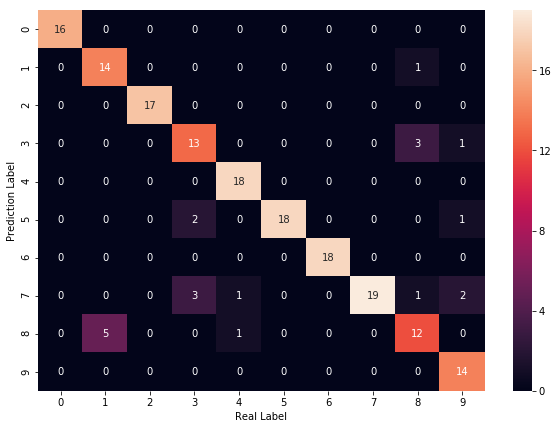

In [20]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [21]:
plt.hist(list_P)

(array([16., 15., 17., 17., 18., 21., 18., 26., 18., 14.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [22]:
plt.hist(digits.target[1617:])

(array([16., 19., 17., 18., 20., 18., 18., 19., 17., 18.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

In [23]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))


#0 min_error:123 index:[5] real:5
#1 min_error:150 index:[2] real:2
#2 min_error:146 index:[8] real:8
#3 min_error:30 index:[0] real:0
#4 min_error:118 index:[1] real:1
#5 min_error:88 index:[7] real:7
#6 min_error:73 index:[6] real:6
#7 min_error:100 index:[3] real:3
#8 min_error:62 index:[2] real:2
#9 min_error:118 index:[1] real:1
#10 min_error:160 index:[7] real:7
#11 min_error:153 index:[7] real:4
#12 min_error:84 index:[6] real:6
#13 min_error:106 index:[3] real:3
#14 min_error:112 index:[1] real:1
#15 min_error:146 index:[3] real:3
#16 min_error:161 index:[7] real:9
#17 min_error:110 index:[1] real:1
#18 min_error:129 index:[7] real:7
#19 min_error:44 index:[6] real:6
#20 min_error:145 index:[8] real:8
#21 min_error:60 index:[4] real:4
#22 min_error:95 index:[3] real:3
#23 min_error:123 index:[1] real:1
#24 min_error:63 index:[4] real:4
#25 min_error:50 index:[0] real:0
#26 min_error:82 index:[5] real:5
#27 min_error:76 index:[3] real:3
#28 min_error:128 index:[6] real:6
#29 min

In [24]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:10044 Total connections::11362


In [25]:
necoc = 511
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.9233147804576376
Avg Base Learner:0.807967449566555


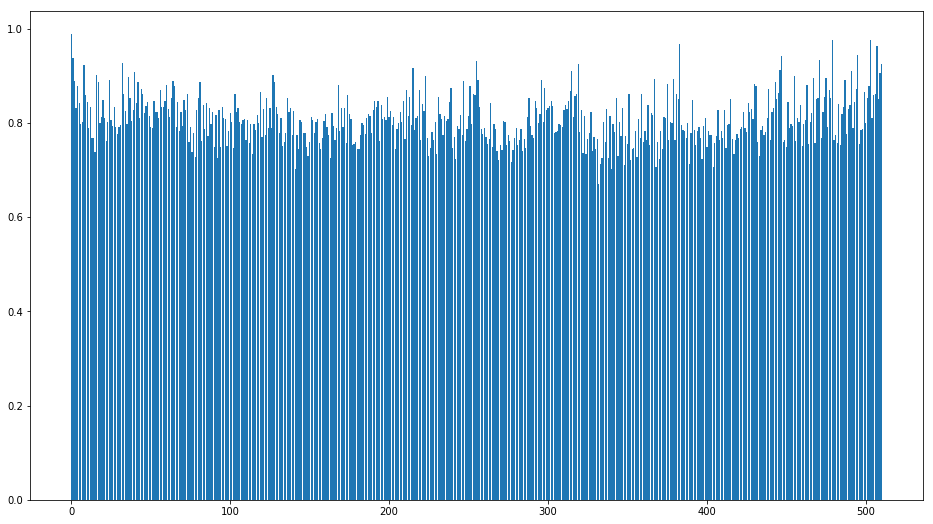

In [29]:
plt.figure(figsize = (16,9))
plt.bar(range(511),winner_fitness)
plt.show()

In [28]:
winner_fitness

[0.9894867037724181,
 0.9375386518243661,
 0.8899196042053185,
 0.8317872603586889,
 0.8787878787878788,
 0.8423005565862709,
 0.7990105132962276,
 0.8021026592455164,
 0.9233147804576376,
 0.860235003092146,
 0.8447742733457019,
 0.7891156462585034,
 0.83426097711812,
 0.769325912183055,
 0.7687074829931972,
 0.7390228818800247,
 0.9022881880024737,
 0.8874458874458875,
 0.7996289424860853,
 0.8132343846629561,
 0.849721706864564,
 0.8107606679035251,
 0.7625231910946196,
 0.8033395176252319,
 0.891156462585034,
 0.8058132343846629,
 0.7946815089672232,
 0.8348794063079777,
 0.7922077922077922,
 0.7773654916512059,
 0.7915893630179345,
 0.7959183673469388,
 0.9276437847866419,
 0.8608534322820037,
 0.826221397649969,
 0.7971552257266543,
 0.8979591836734694,
 0.8540507111935683,
 0.8045763760049475,
 0.8268398268398268,
 0.9084724799010513,
 0.8423005565862709,
 0.8880643166357453,
 0.8101422387136673,
 0.8719851576994434,
 0.8608534322820037,
 0.8206555349412492,
 0.8354978354978355,

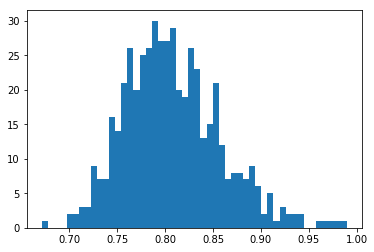

In [46]:
plt.hist(winner_fitness, bins= 50)
plt.show()

In [34]:
import random

te = []
cc = []
acc = []

necoc = 5

for iii in range(10000):
    while True:
        number_codes = []
        for i in range(2**(10-1), 2**10-1):
            for j in bin(i).split('b')[1]:
                number_codes.append(int(j))
        number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

        slice = random.sample(range(2**9-1), necoc)
        #slice = range(31)

        number_codes = number_codes[:,slice].tolist()

        classes = []
        for i in range(necoc):
            code_list = np.array(number_codes).T[i]
            classes.append(np.where(code_list==1)[0].tolist())

        matrix_errors = []

        for i in range(9):
            for j in range(i+1,10):
                matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
        min_error = np.min(matrix_errors)
        if min_error != 0:
            #print("min row distanse: {}".format(min_error))
            #print(number_codes)
            break
    #print("We choose classifers: {}".format(slice))
    #print("classes are: {}".format(classes))
    #np.array(number_codes)
    #print("accuracy of each classifier:{}".format([winner_fitness[i] for i in slice]))
    rou = min_error/necoc
    epsilon = np.mean([1 - winner_fitness[i] for i in slice])
    te.append(2*epsilon/rou)
    cc.append(classes)
    acc.append([winner_fitness[i] for i in slice])
    #print("p:{}, e:{}: training error:{}".format(rou, epsilon, 2*epsilon/rou))

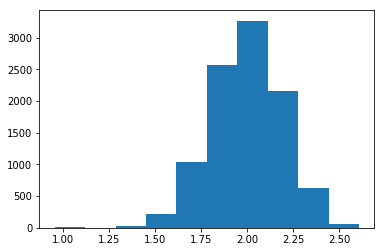

In [35]:
plt.hist(te)
plt.show()

In [48]:
print("minimum te: {}".format(min(te)))
print("class1 are:{}".format(cc[te.index(min(te))]))
print("acc of classifiers are:{}".format(acc[te.index(min(te))]))
print("mean of these classifiers are:{}".format(np.mean(acc[te.index(min(te))])))

minimum te: 0.9536178107606678
class1 are:[[0, 2, 3, 5, 7, 8], [0, 1, 3, 7, 8, 9], [0, 5, 6, 8, 9], [0, 2, 4, 5, 6, 7, 9], [0, 2, 3, 6]]
acc of classifiers are:[0.7965367965367965, 0.8243661100803958, 0.8348794063079777, 0.7779839208410637, 0.8126159554730983]
mean of these classifiers are:0.8092764378478664


In [49]:
print("maximum te: {}".format(max(te)))
print("class1 are:{}".format(cc[te.index(max(te))]))
print("acc of classifiers are:{}".format(acc[te.index(max(te))]))
print("mean of these classifiers are:{}".format(np.mean(acc[te.index(max(te))])))

maximum te: 2.6085343228200366
class1 are:[[0, 1, 3, 5, 6, 7, 8], [0, 1, 3, 6, 7], [0, 1, 2, 6, 7, 9], [0, 1, 3, 8], [0, 2, 3, 7]]
acc of classifiers are:[0.7551020408163265, 0.6716141001855288, 0.7235621521335807, 0.7365491651205937, 0.8089053803339518]
mean of these classifiers are:0.7391465677179963


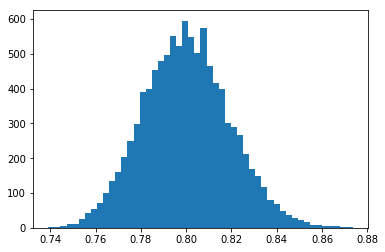

In [54]:
plt.hist(np.mean(acc, axis = 1),bins = 50)
plt.show()